In [1]:
import wandb
from tqdm import tqdm
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.optim.lr_scheduler import StepLR
import numpy as np
from datas.dataset import make_dataset
import torch.optim as optim
from datas.config import cfg
from models.apple_model import Efficientnet_AppleClassifier, Densenet_AppleClassifier, Resnet_AppleClassifier
from trains.train_model import run

In [2]:
!pip install wandb -qU

print("Installation is completed successfully.")

Installation is completed successfully.


In [3]:
# Log in to your W&B account
import wandb
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: tkdtn121 (sangsatan). Use `wandb login --relogin` to force relogin


True

## 데이터 로드

In [4]:
image_size=cfg['image_size']
batch_size = cfg['batch_size']
image_dir_train = './datas/train/'
csv_dir_train = './datas/train/'

image_dir_val = './datas/validation/'
csv_dir_val = './datas/validation/'

image_dir_test = './datas/test/'
csv_dir_test = './datas/test/'

# 데이터셋 생성
train_set = make_dataset(
    image_dir=image_dir_train,
    csv_dir=csv_dir_train,
    image_size=image_size
)

val_set = make_dataset(
    image_dir=image_dir_val,
    csv_dir=csv_dir_val,
    image_size=image_size
)

test_set = make_dataset(
    image_dir=image_dir_test,
    csv_dir=csv_dir_test,
    image_size=image_size
)

# DataLoader 생성
train_loader = DataLoader(
    train_set, 
    batch_size=batch_size,
    shuffle=True,
    pin_memory=True,
    num_workers=0
)

val_loader = DataLoader(
    val_set, 
    batch_size=batch_size,
    shuffle=False,
    pin_memory=True,
    num_workers=0
)

test_loader = DataLoader(
    test_set, 
    batch_size=batch_size,
    shuffle=True,
)

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Efficientnet_AppleClassifier(cfg).to(device)
optimizer = optim.Adam(model.parameters(), lr=cfg['learning_rate'], weight_decay=cfg['weight_decay'])  # L2 정규화 적용
# 스케줄러 설정
scheduler = StepLR(optimizer, step_size=cfg['step_size'], gamma=cfg['gamma'])
# 손실 함수 설정
criterion = nn.CrossEntropyLoss()

c:\Users\tkdtn\anaconda3\envs\torch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\tkdtn\anaconda3\envs\torch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
# 최고 성능 추적
best_accuracy = 0.0

Validating: 100%|██████████| 9/9 [00:13<00:00,  1.50s/it]


Epoch 1, Train Loss: 0.6510, Train Accuracy: 0.8230, Val Loss: 6.0959, Val Accuracy: 0.6667
Saved best model with accuracy: 0.6667


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.52s/it]


Epoch 2, Train Loss: 0.1584, Train Accuracy: 0.9529, Val Loss: 3.5378, Val Accuracy: 0.7361
Saved best model with accuracy: 0.7361


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.47s/it]


Epoch 3, Train Loss: 0.2182, Train Accuracy: 0.9397, Val Loss: 7.0851, Val Accuracy: 0.6806


Validating: 100%|██████████| 9/9 [00:14<00:00,  1.60s/it]


Epoch 4, Train Loss: 0.1919, Train Accuracy: 0.9473, Val Loss: 7.2740, Val Accuracy: 0.6667


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.50s/it]
c:\result\trains\Evaluation_Metrics.py:75: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Epoch 5, Train Loss: 0.2512, Train Accuracy: 0.9379, Val Loss: 3.6245, Val Accuracy: 0.8056
Saved best model with accuracy: 0.8056


Training: 100%|██████████| 67/67 [03:04<00:00,  2.76s/it]
c:\result\trains\Evaluation_Metrics.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure(figsize=(8, 8))
Validating: 100%|██████████| 9/9 [00:12<00:00,  1.44s/it]


Epoch 6, Train Loss: 0.0416, Train Accuracy: 0.9812, Val Loss: 7.2927, Val Accuracy: 0.6667


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.44s/it]


Epoch 7, Train Loss: 0.0116, Train Accuracy: 0.9944, Val Loss: 3.6567, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.53s/it]


Epoch 8, Train Loss: 0.0030, Train Accuracy: 1.0000, Val Loss: 5.4347, Val Accuracy: 0.7083


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.45s/it]


Epoch 9, Train Loss: 0.0051, Train Accuracy: 0.9981, Val Loss: 5.1364, Val Accuracy: 0.7917


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.45s/it]


Epoch 10, Train Loss: 0.0050, Train Accuracy: 1.0000, Val Loss: 3.5997, Val Accuracy: 0.7917


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.44s/it]


Epoch 11, Train Loss: 0.0064, Train Accuracy: 0.9962, Val Loss: 6.7561, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.45s/it]


Epoch 12, Train Loss: 0.0226, Train Accuracy: 0.9887, Val Loss: 4.8667, Val Accuracy: 0.8194


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.43s/it]


Epoch 13, Train Loss: 0.0125, Train Accuracy: 0.9944, Val Loss: 6.1568, Val Accuracy: 0.6806


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.43s/it]


Epoch 14, Train Loss: 0.0086, Train Accuracy: 0.9962, Val Loss: 5.1763, Val Accuracy: 0.6667


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.49s/it]


Epoch 15, Train Loss: 0.0092, Train Accuracy: 0.9962, Val Loss: 4.3917, Val Accuracy: 0.7639


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.43s/it]


Epoch 16, Train Loss: 0.0040, Train Accuracy: 0.9981, Val Loss: 4.9880, Val Accuracy: 0.7778


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.41s/it]


Epoch 17, Train Loss: 0.0683, Train Accuracy: 0.9906, Val Loss: 11.8409, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.44s/it]


Epoch 18, Train Loss: 0.0025, Train Accuracy: 1.0000, Val Loss: 5.4360, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.45s/it]


Epoch 19, Train Loss: 0.0121, Train Accuracy: 0.9981, Val Loss: 7.0526, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.45s/it]


Epoch 20, Train Loss: 0.0091, Train Accuracy: 0.9981, Val Loss: 7.2411, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.43s/it]


Epoch 21, Train Loss: 0.0209, Train Accuracy: 0.9944, Val Loss: 5.1503, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.43s/it]


Epoch 22, Train Loss: 0.0036, Train Accuracy: 0.9981, Val Loss: 4.1188, Val Accuracy: 0.6944


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.43s/it]


Epoch 23, Train Loss: 0.0076, Train Accuracy: 0.9962, Val Loss: 3.9313, Val Accuracy: 0.7778


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.44s/it]


Epoch 24, Train Loss: 0.0020, Train Accuracy: 1.0000, Val Loss: 3.3183, Val Accuracy: 0.6806


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.46s/it]


Epoch 25, Train Loss: 0.0033, Train Accuracy: 1.0000, Val Loss: 9.0840, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.46s/it]


Epoch 26, Train Loss: 0.0195, Train Accuracy: 0.9925, Val Loss: 3.8817, Val Accuracy: 0.7778


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.46s/it]


Epoch 27, Train Loss: 0.0040, Train Accuracy: 0.9981, Val Loss: 6.5245, Val Accuracy: 0.7222


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.44s/it]


Epoch 28, Train Loss: 0.0007, Train Accuracy: 1.0000, Val Loss: 4.1759, Val Accuracy: 0.8056


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.40s/it]


Epoch 29, Train Loss: 0.0165, Train Accuracy: 0.9925, Val Loss: 3.2208, Val Accuracy: 0.7500


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.39s/it]


Epoch 30, Train Loss: 0.0014, Train Accuracy: 1.0000, Val Loss: 5.2472, Val Accuracy: 0.7222


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.42s/it]


Epoch 31, Train Loss: 0.0200, Train Accuracy: 0.9944, Val Loss: 5.4550, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.44s/it]


Epoch 32, Train Loss: 0.0042, Train Accuracy: 1.0000, Val Loss: 3.9907, Val Accuracy: 0.7778


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.44s/it]


Epoch 33, Train Loss: 0.0030, Train Accuracy: 1.0000, Val Loss: 4.8527, Val Accuracy: 0.7917


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.46s/it]


Epoch 34, Train Loss: 0.0042, Train Accuracy: 0.9981, Val Loss: 3.6538, Val Accuracy: 0.6944


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.44s/it]


Epoch 35, Train Loss: 0.0023, Train Accuracy: 1.0000, Val Loss: 3.8958, Val Accuracy: 0.6944


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.44s/it]


Epoch 36, Train Loss: 0.0071, Train Accuracy: 0.9962, Val Loss: 3.6499, Val Accuracy: 0.7778


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.44s/it]


Epoch 37, Train Loss: 0.0224, Train Accuracy: 0.9962, Val Loss: 4.9033, Val Accuracy: 0.6806


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.45s/it]


Epoch 38, Train Loss: 0.0106, Train Accuracy: 0.9981, Val Loss: 5.5723, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.42s/it]


Epoch 39, Train Loss: 0.0035, Train Accuracy: 1.0000, Val Loss: 6.6372, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.48s/it]


Epoch 40, Train Loss: 0.1376, Train Accuracy: 0.9793, Val Loss: 5.3053, Val Accuracy: 0.8056


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.43s/it]


Epoch 41, Train Loss: 0.0068, Train Accuracy: 0.9981, Val Loss: 3.9034, Val Accuracy: 0.7778


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.47s/it]


Epoch 42, Train Loss: 0.0023, Train Accuracy: 1.0000, Val Loss: 4.9958, Val Accuracy: 0.8194


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.45s/it]


Epoch 43, Train Loss: 0.0035, Train Accuracy: 1.0000, Val Loss: 6.5731, Val Accuracy: 0.6944


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.43s/it]


Epoch 44, Train Loss: 0.0062, Train Accuracy: 0.9962, Val Loss: 4.9524, Val Accuracy: 0.6806


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.44s/it]


Epoch 45, Train Loss: 0.0375, Train Accuracy: 0.9887, Val Loss: 5.2889, Val Accuracy: 0.8333
Saved best model with accuracy: 0.8333


Validating: 100%|██████████| 9/9 [00:12<00:00,  1.42s/it]


Epoch 46, Train Loss: 0.0047, Train Accuracy: 0.9981, Val Loss: 3.6826, Val Accuracy: 0.6944


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.46s/it]


Epoch 47, Train Loss: 0.0215, Train Accuracy: 0.9944, Val Loss: 4.9277, Val Accuracy: 0.8194


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.46s/it]


Epoch 48, Train Loss: 0.0080, Train Accuracy: 0.9962, Val Loss: 5.1413, Val Accuracy: 0.6667


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.45s/it]


Epoch 49, Train Loss: 0.0117, Train Accuracy: 0.9944, Val Loss: 5.8675, Val Accuracy: 0.6806


Validating: 100%|██████████| 9/9 [00:13<00:00,  1.51s/it]


Epoch 50, Train Loss: 0.0172, Train Accuracy: 0.9925, Val Loss: 7.1604, Val Accuracy: 0.7778
Saved best model with accuracy: 0.8333


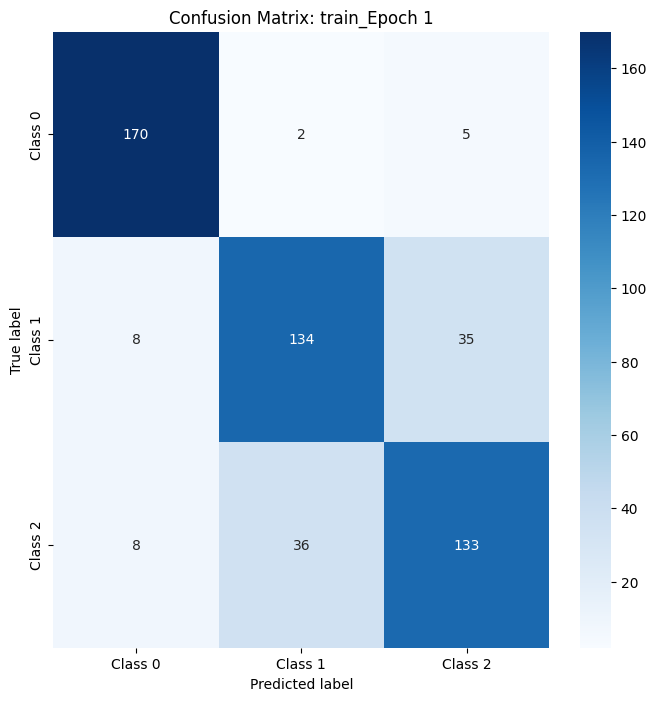

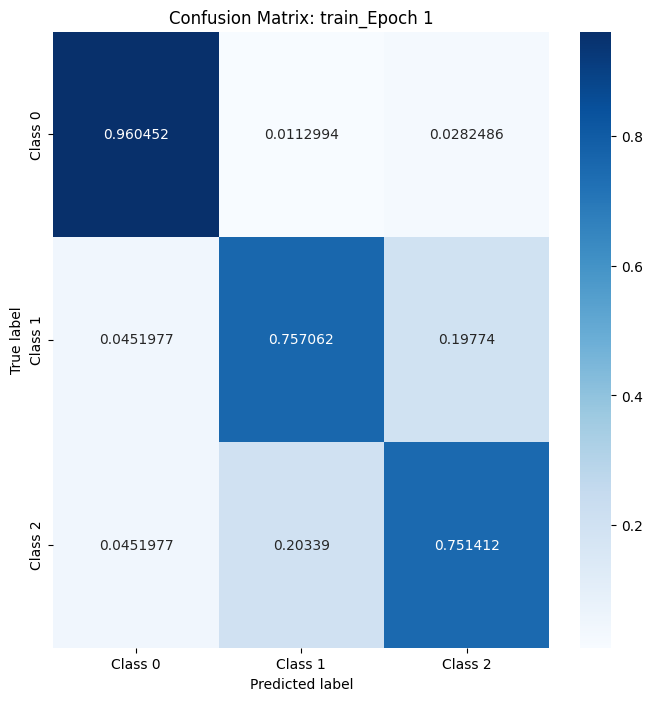

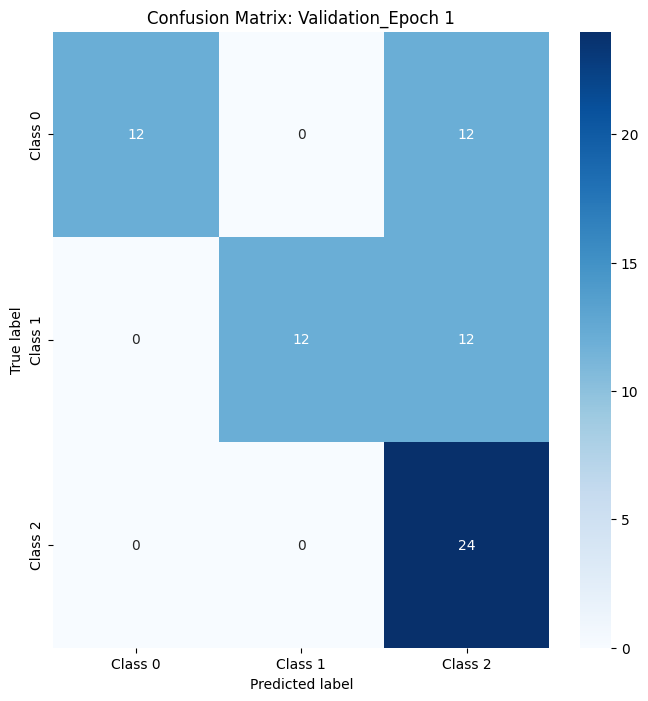

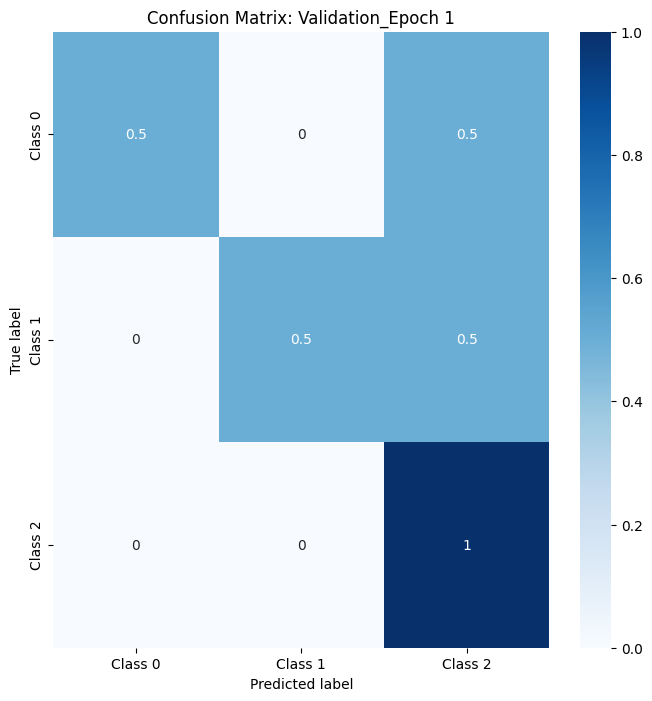

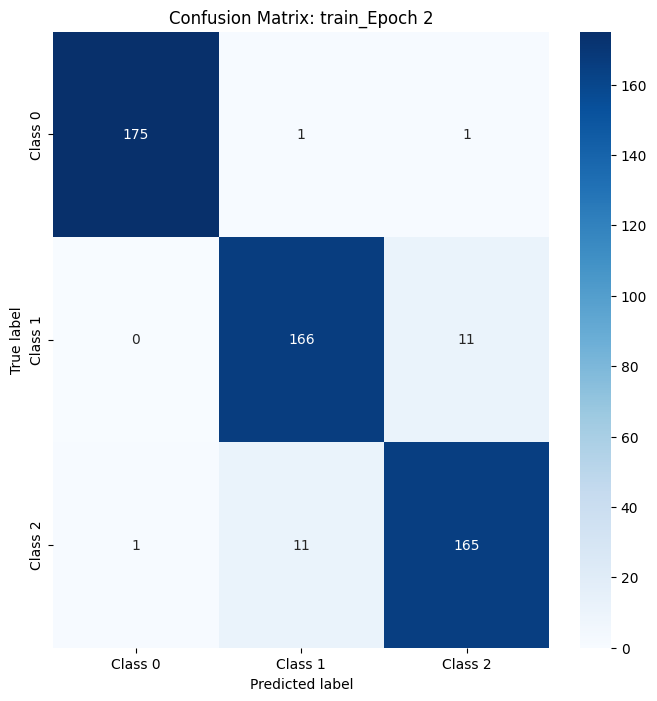

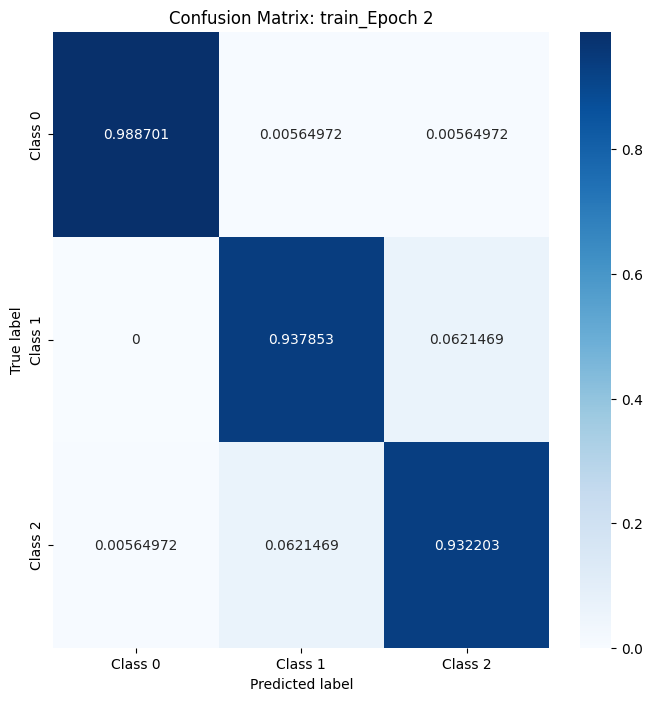

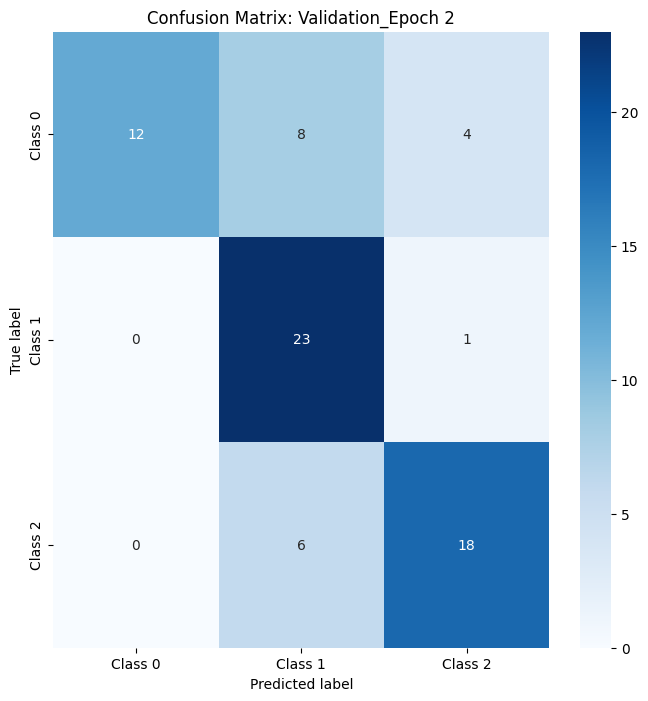

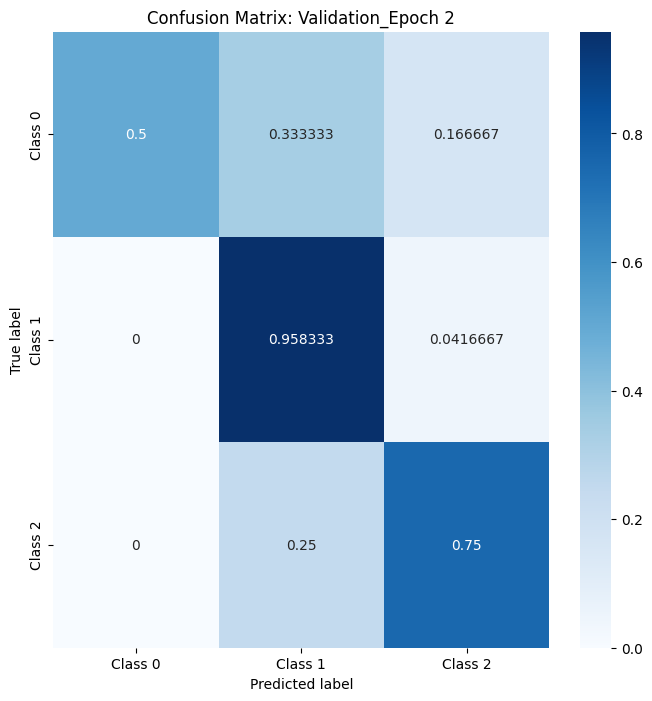

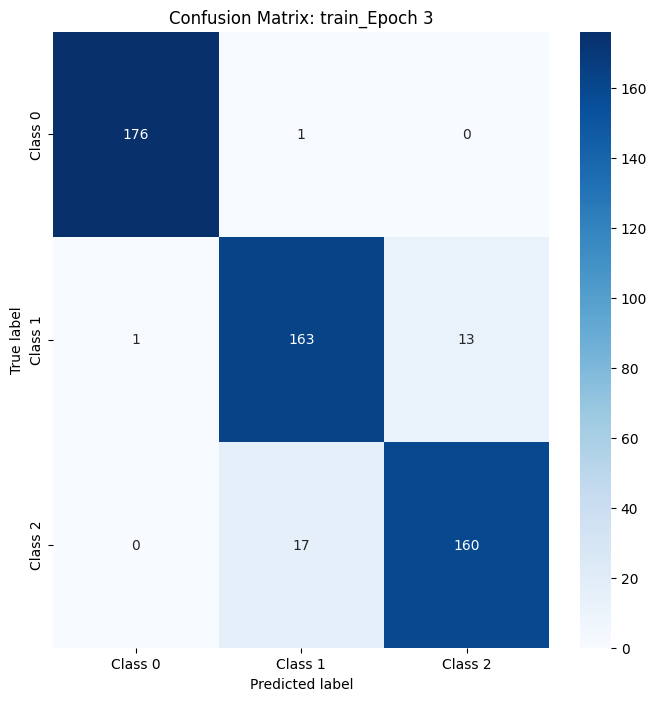

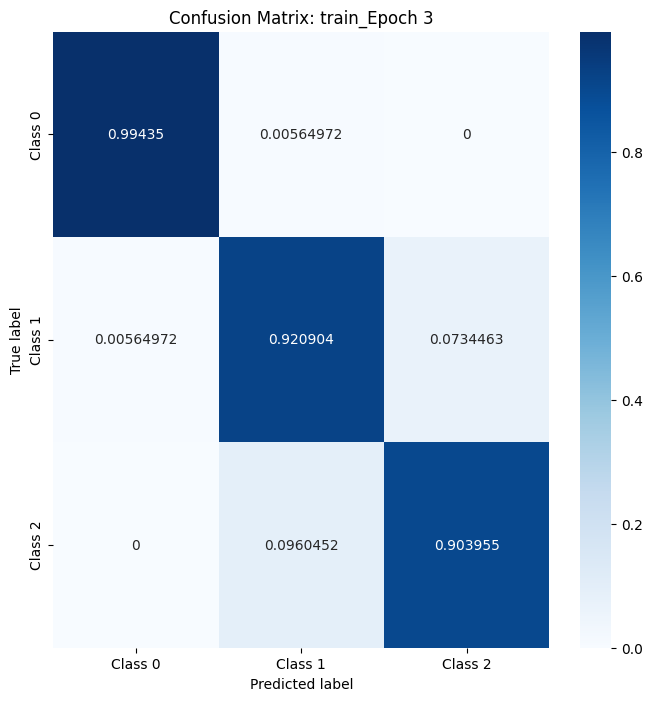

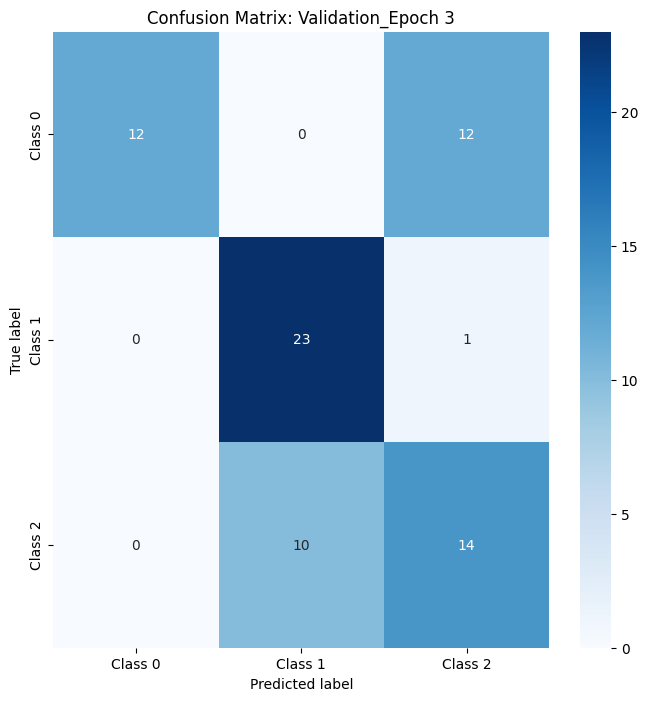

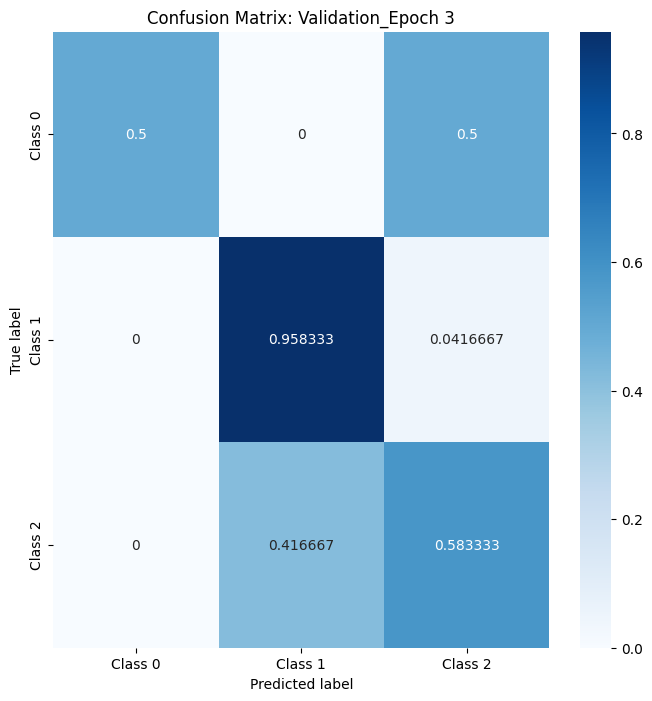

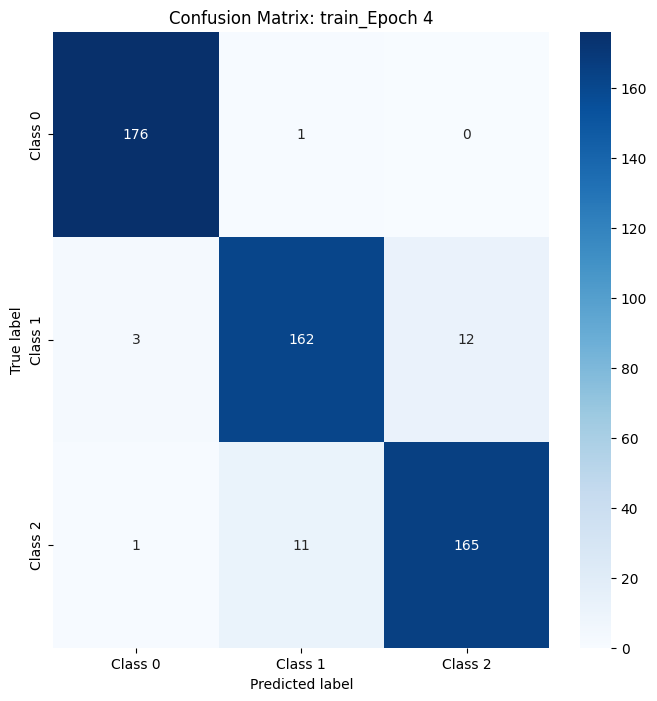

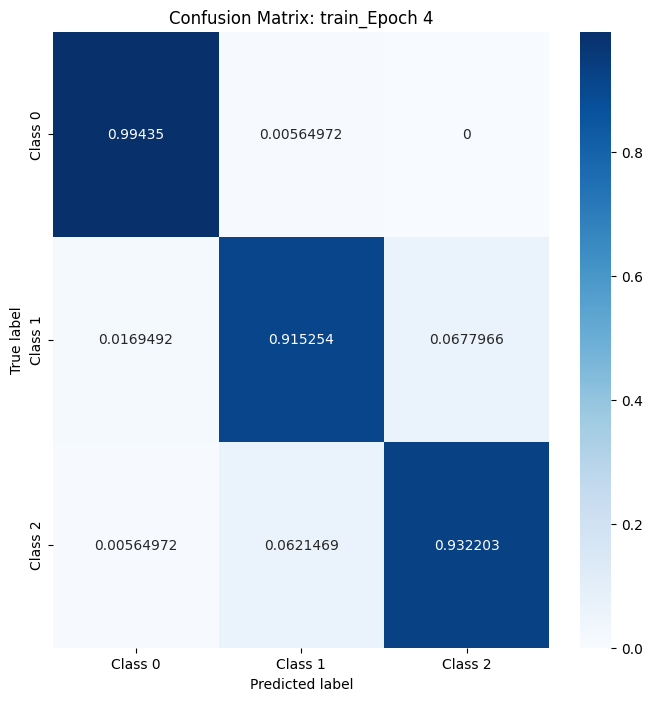

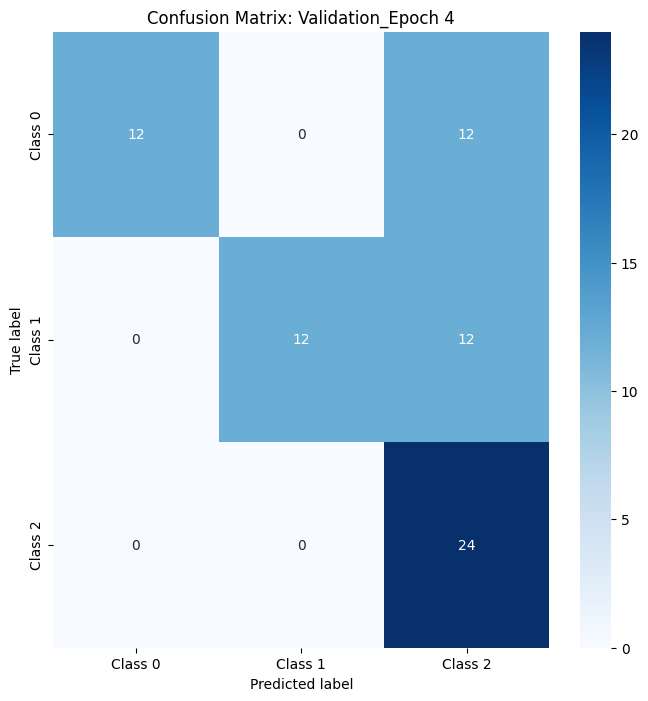

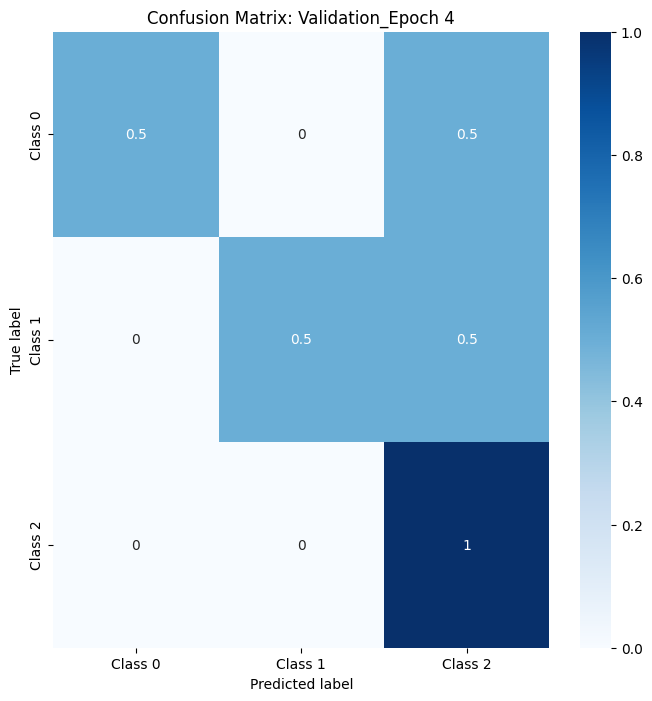

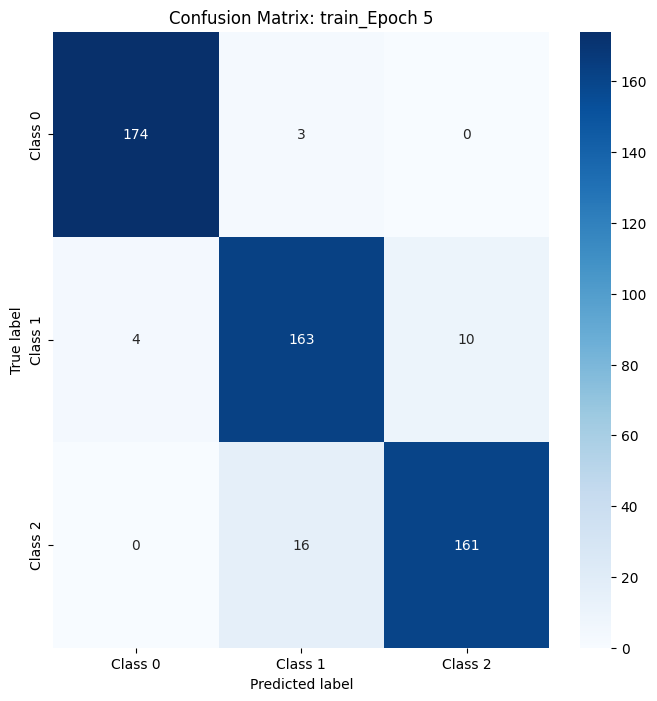

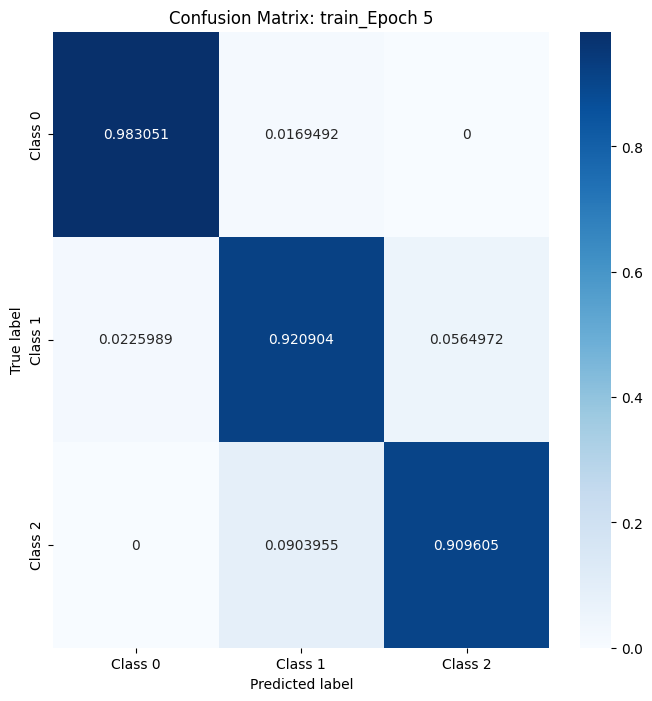

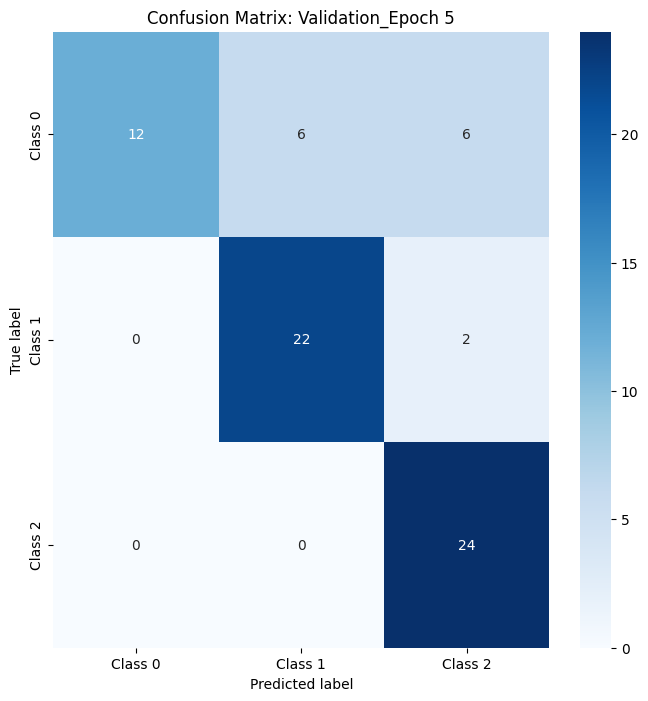

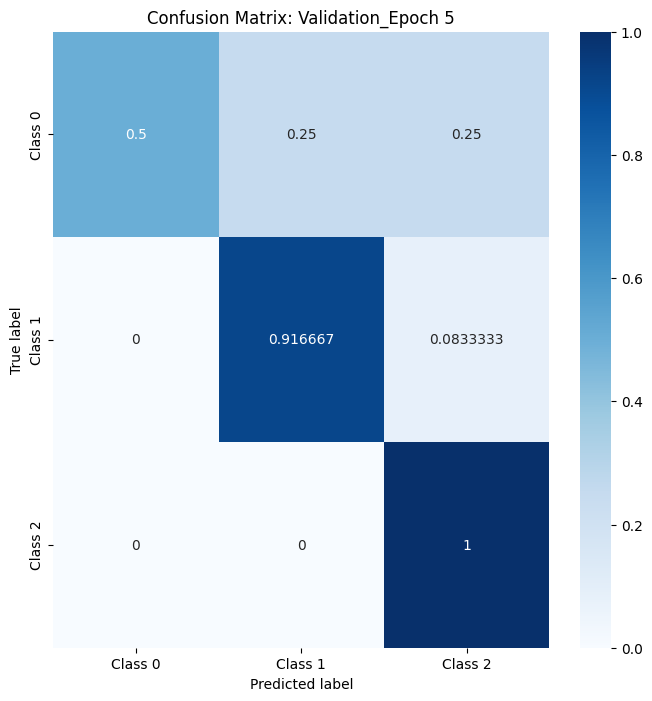

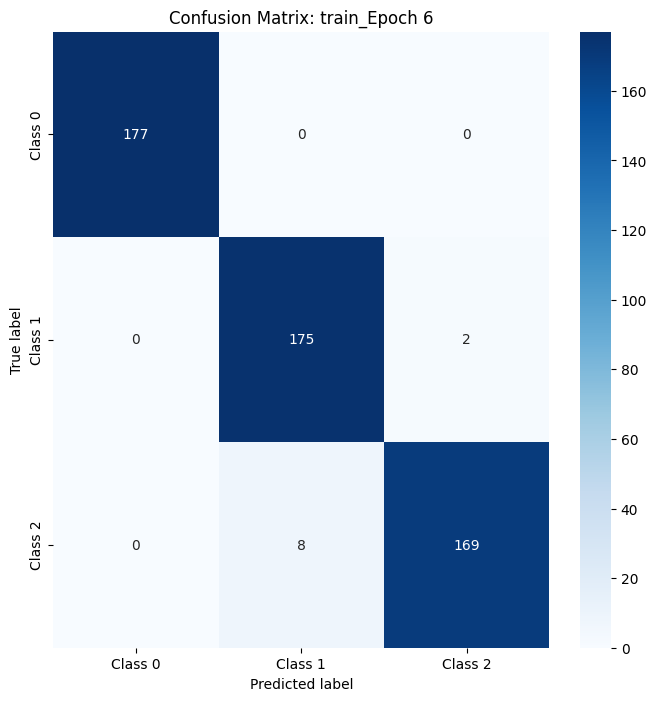

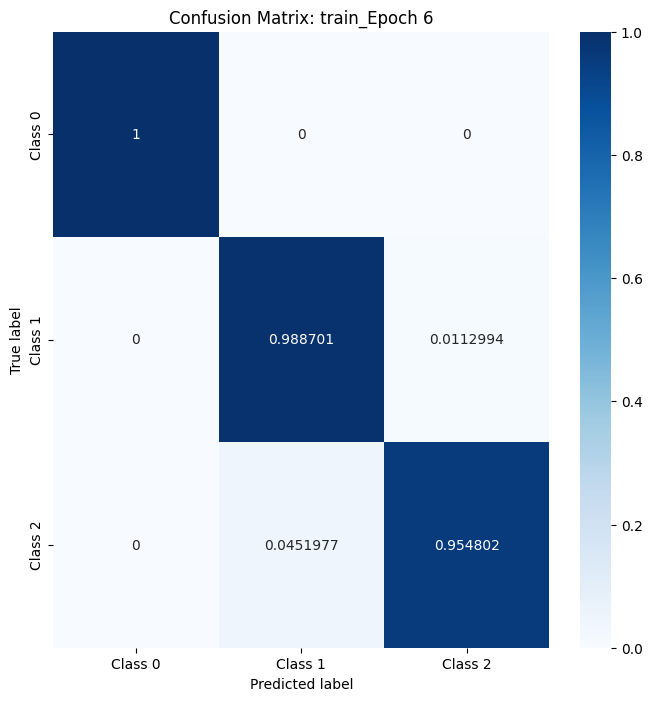

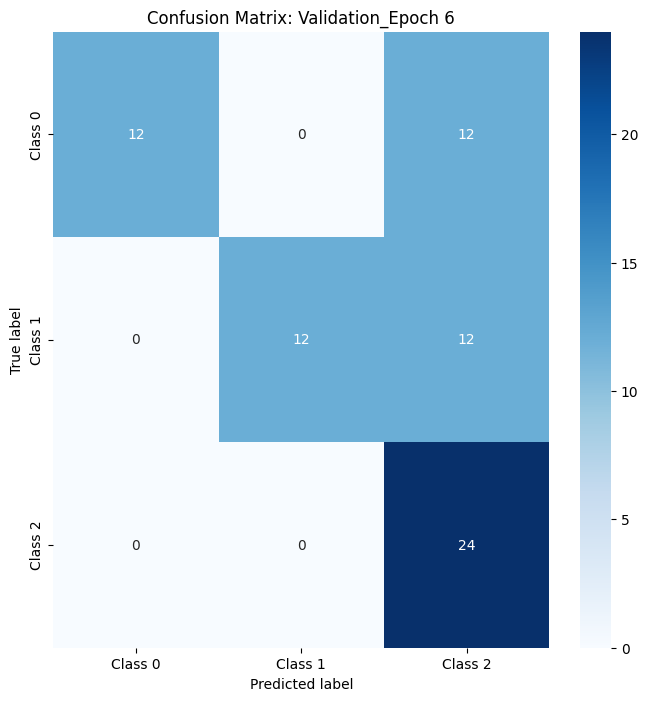

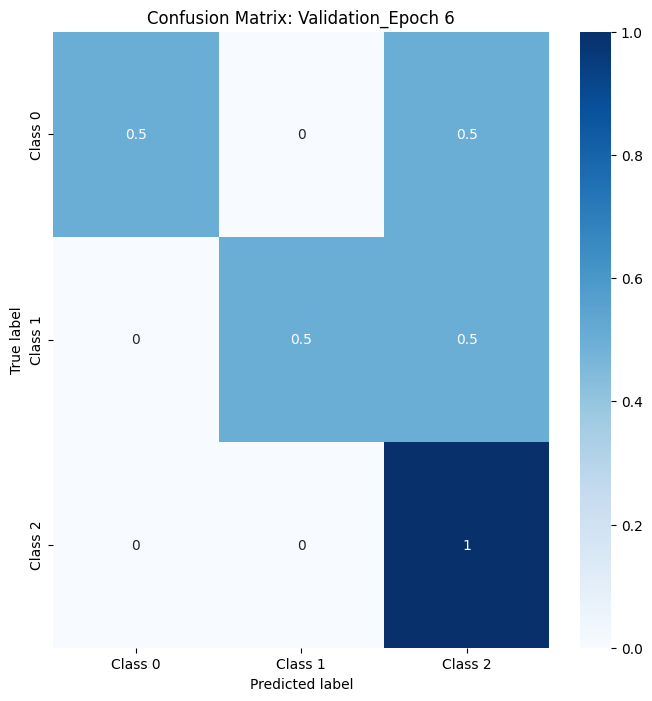

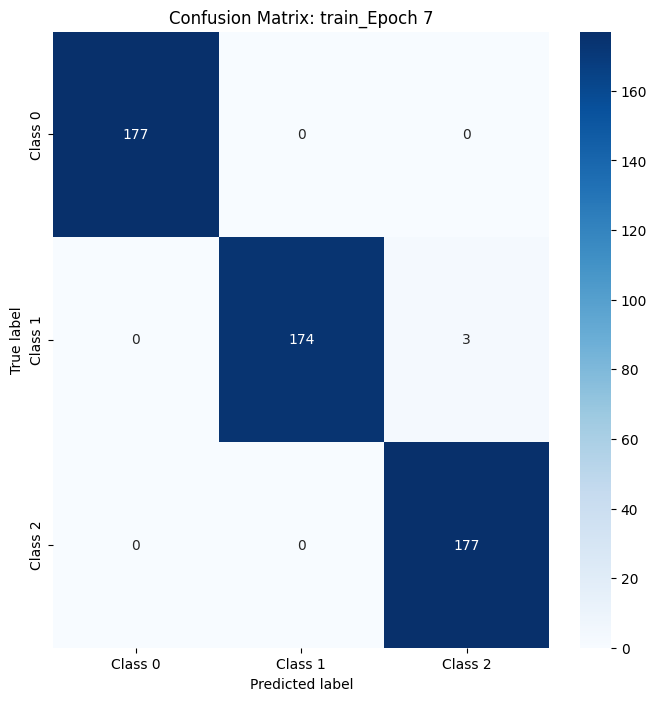

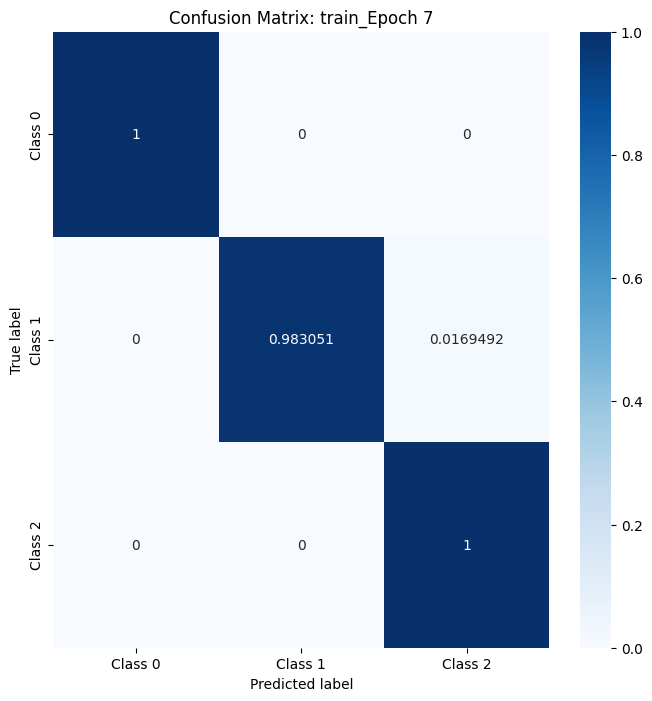

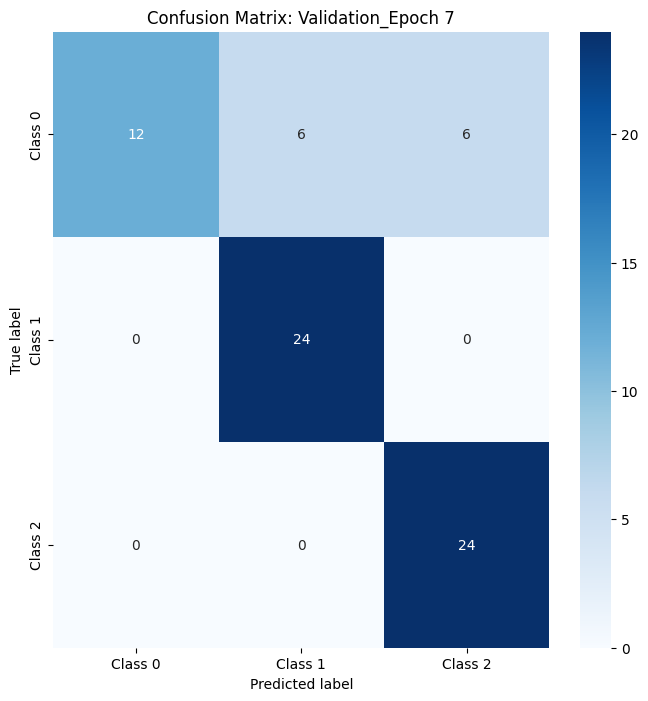

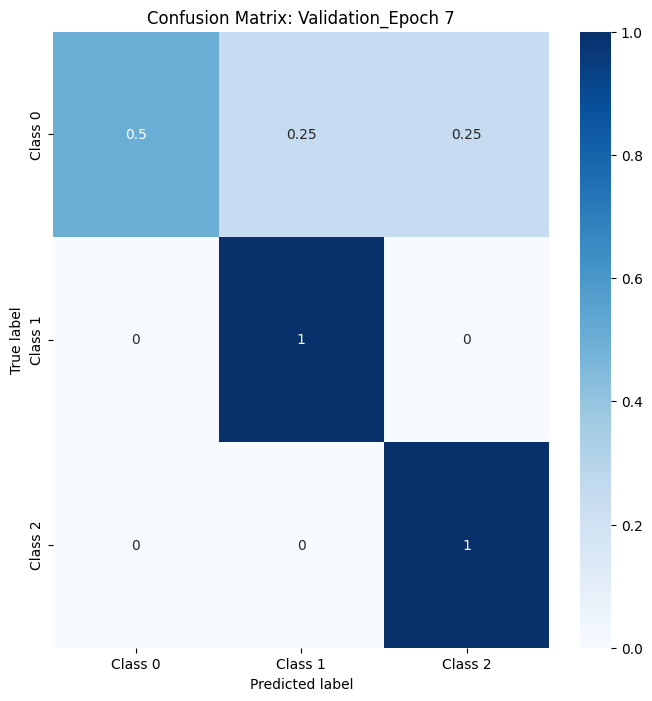

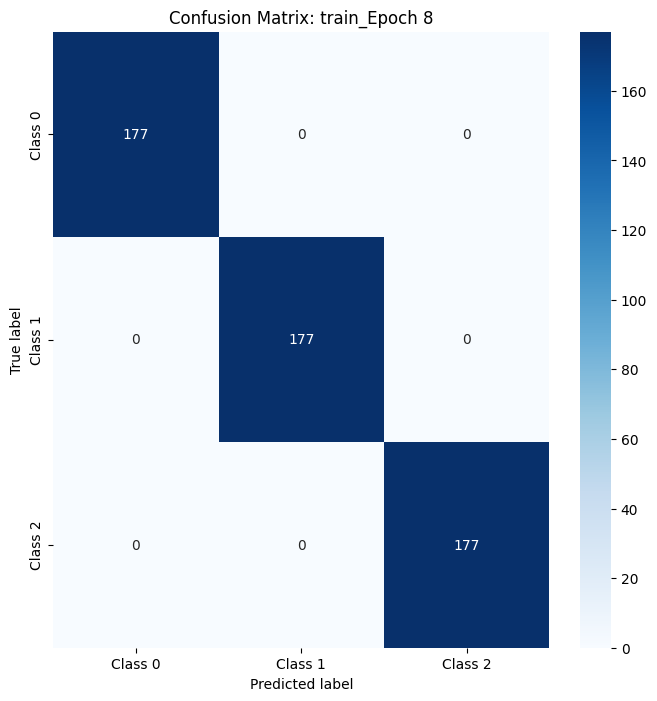

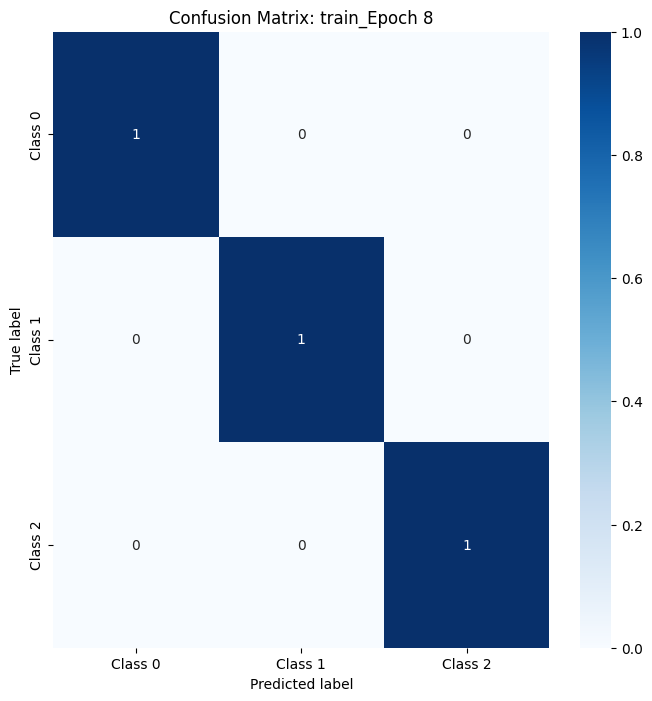

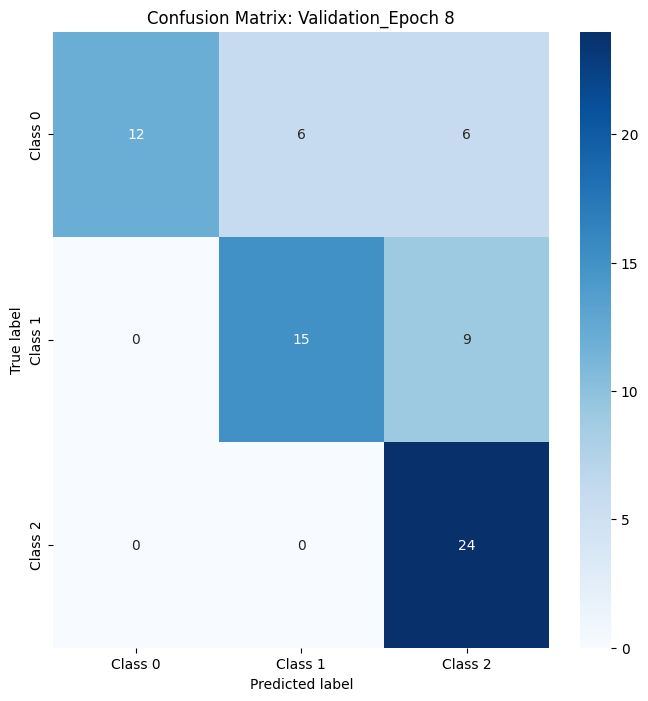

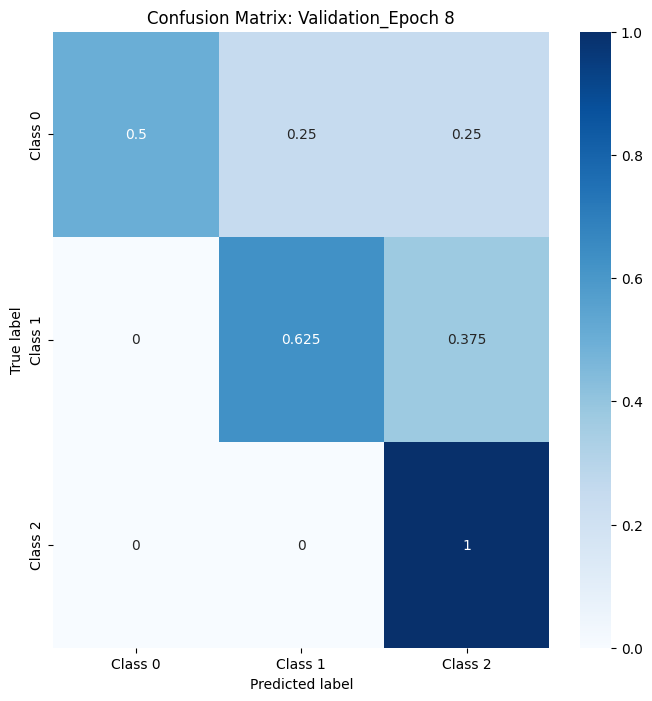

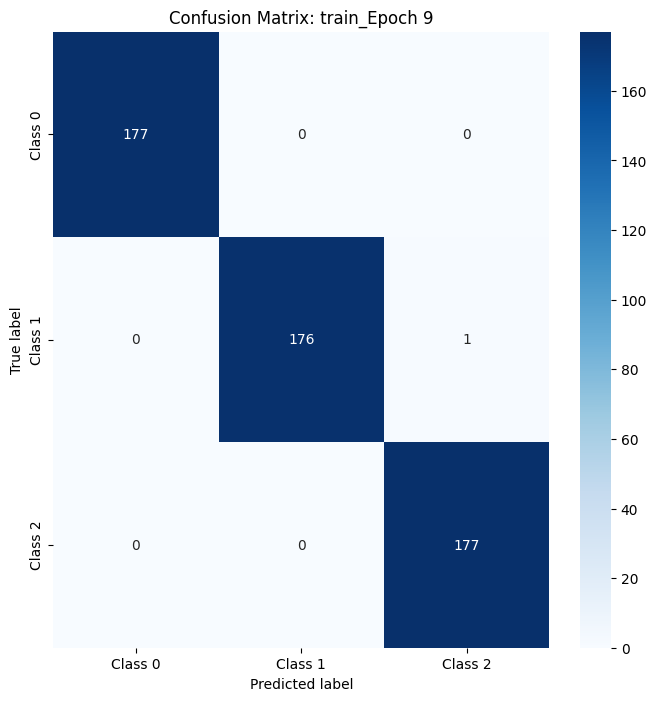

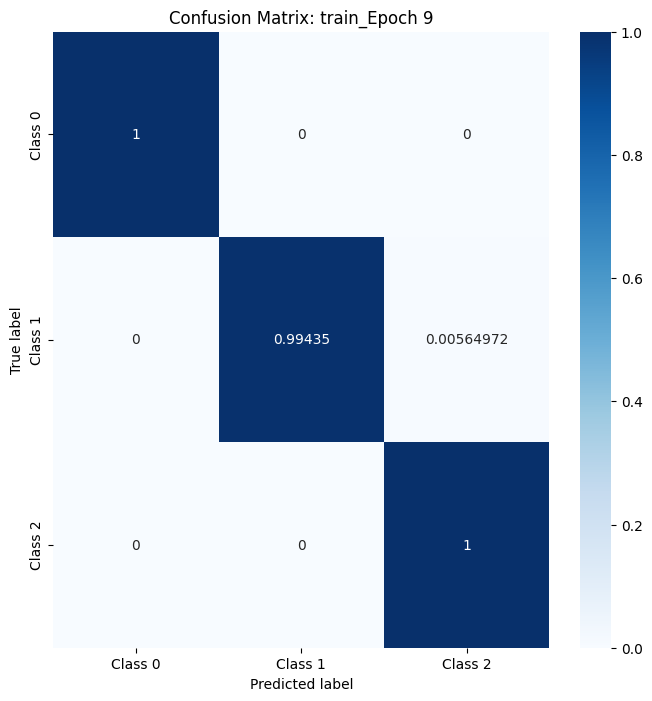

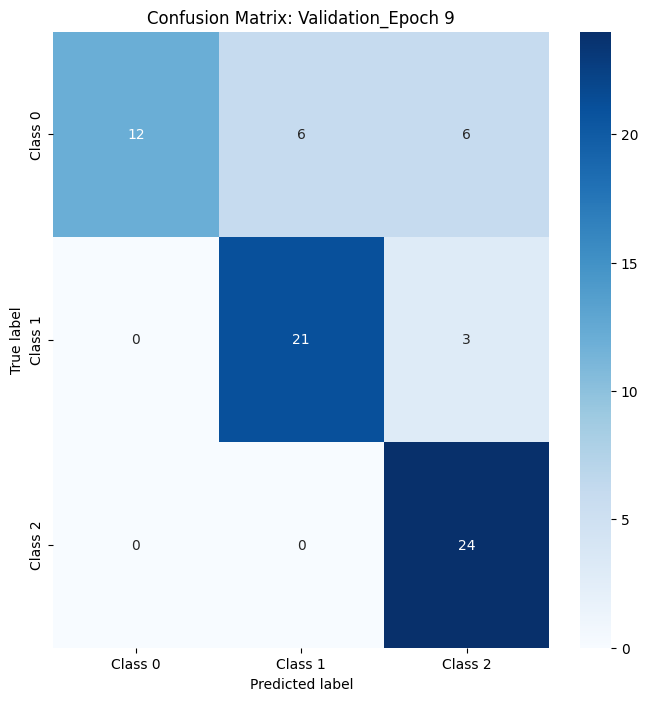

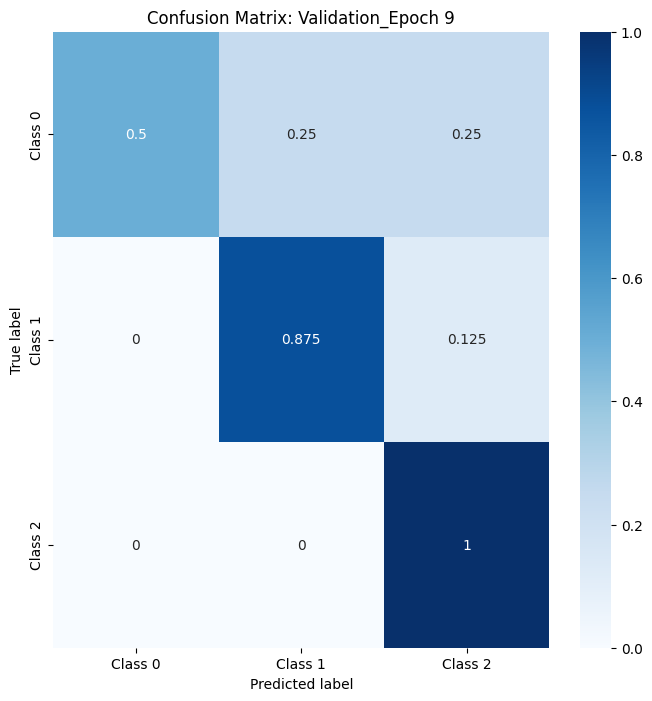

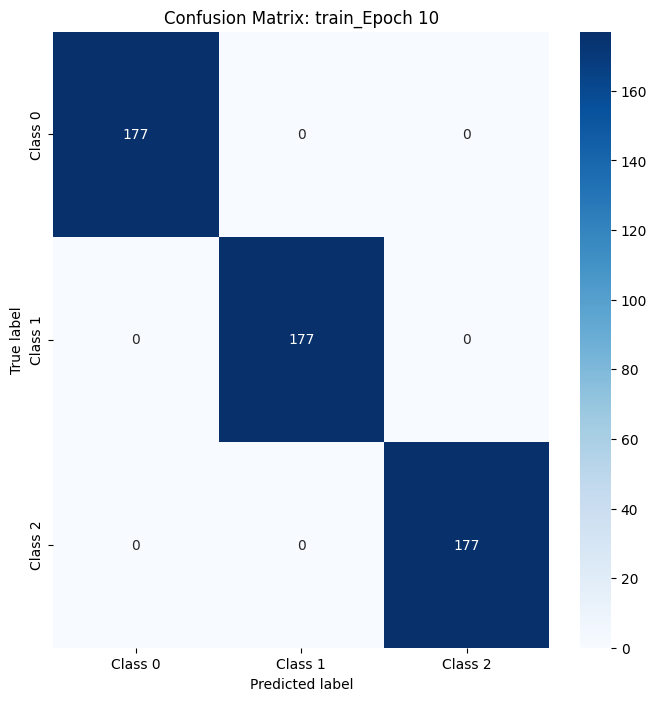

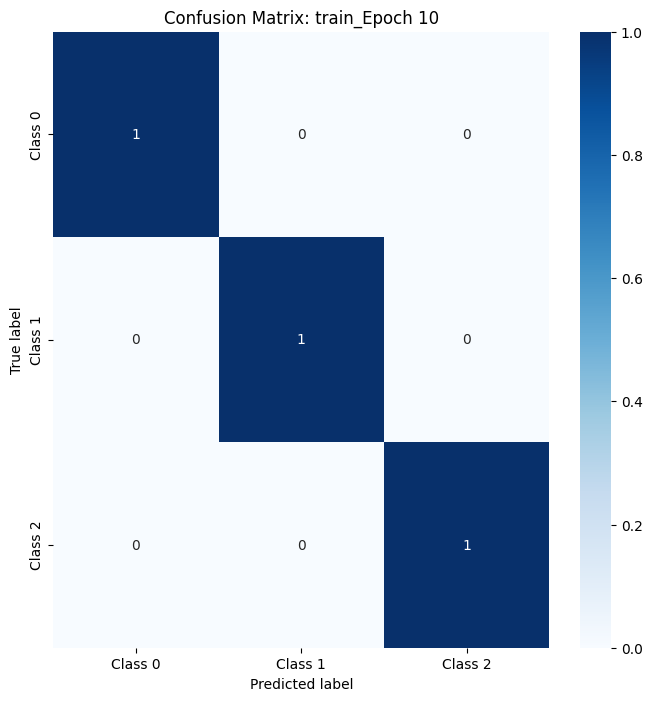

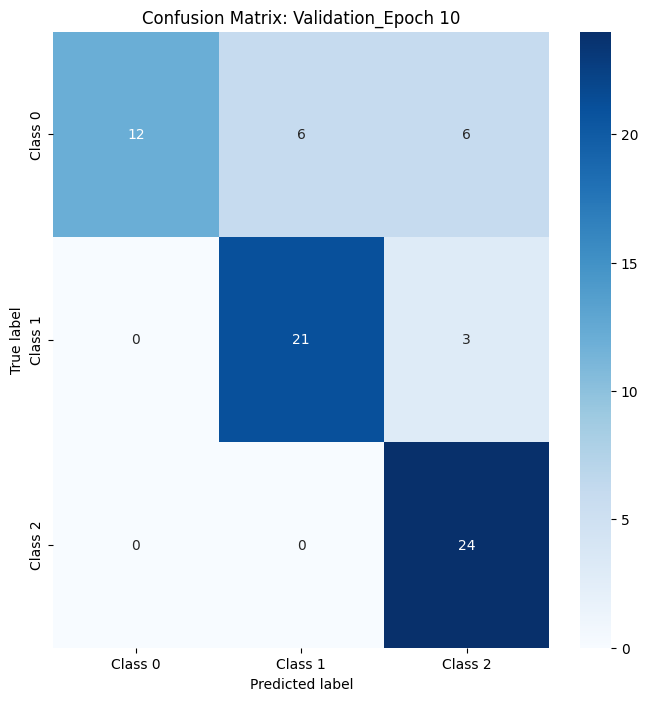

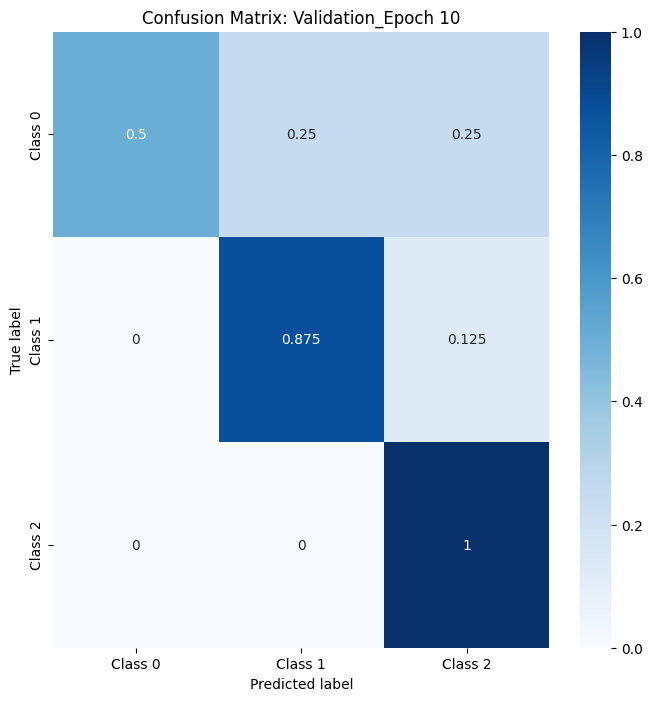

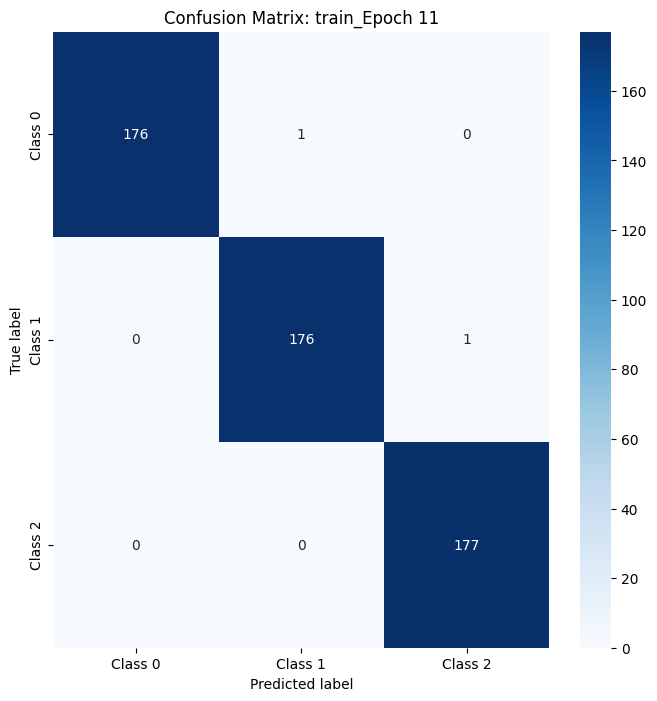

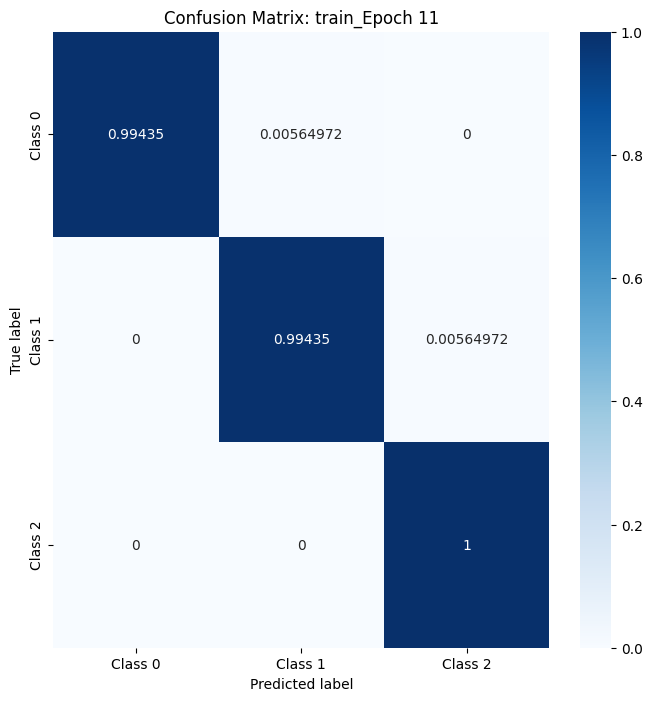

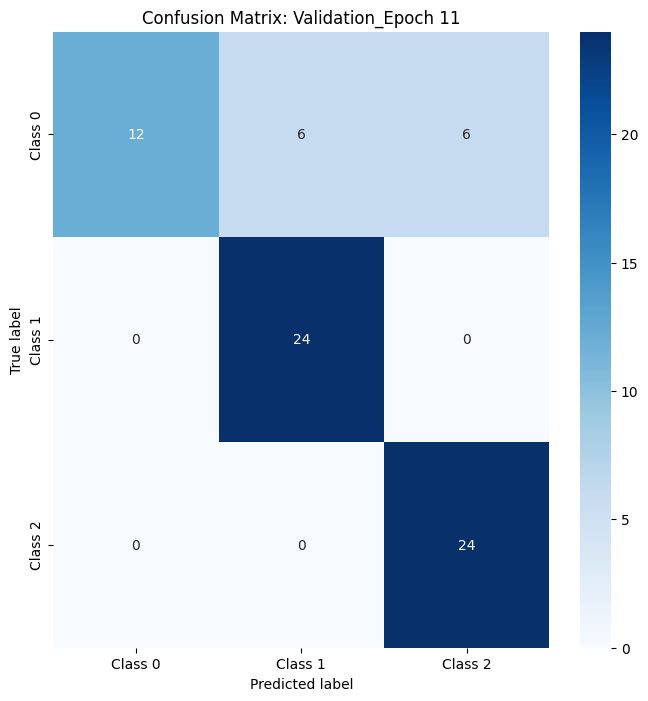

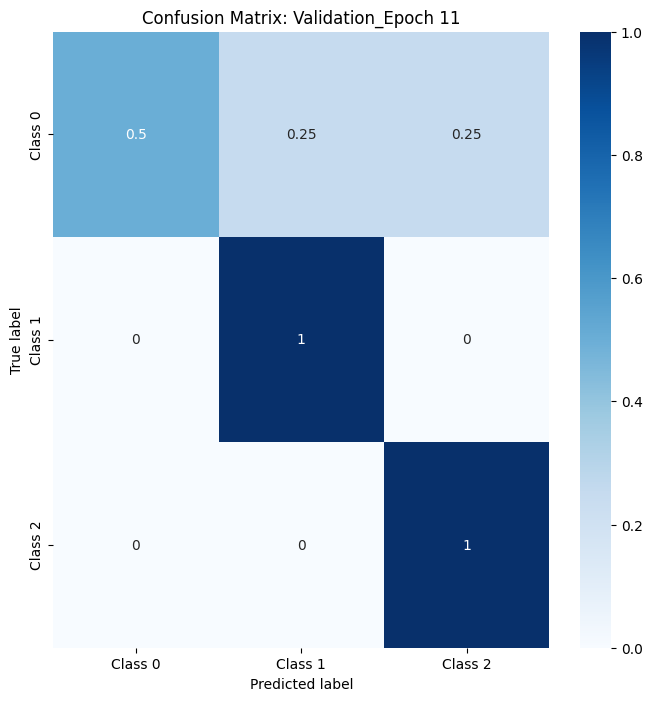

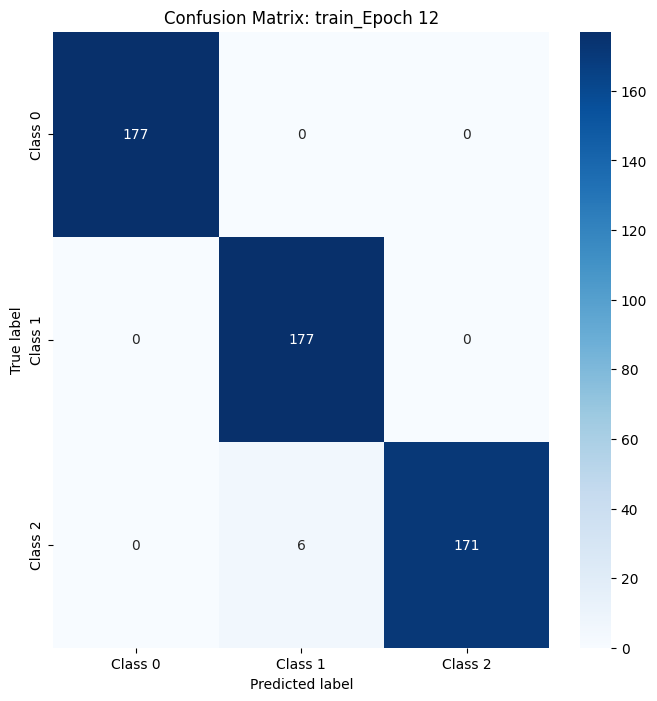

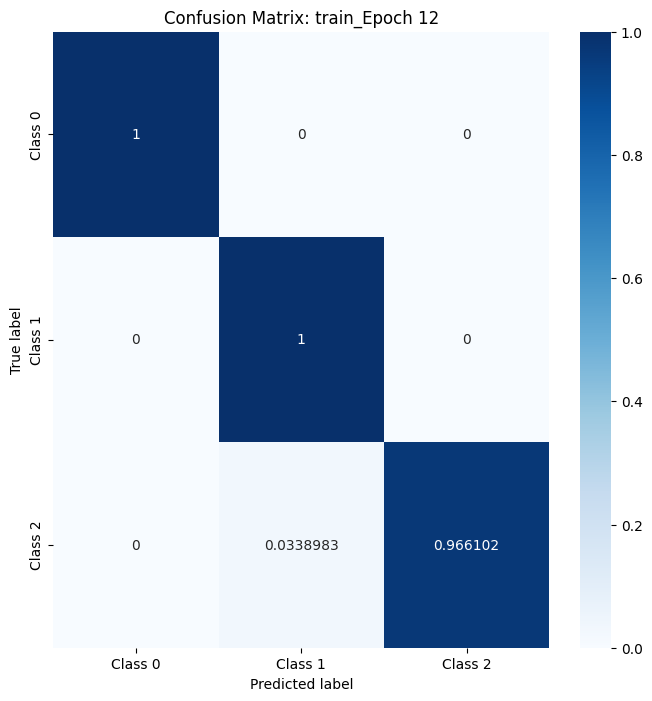

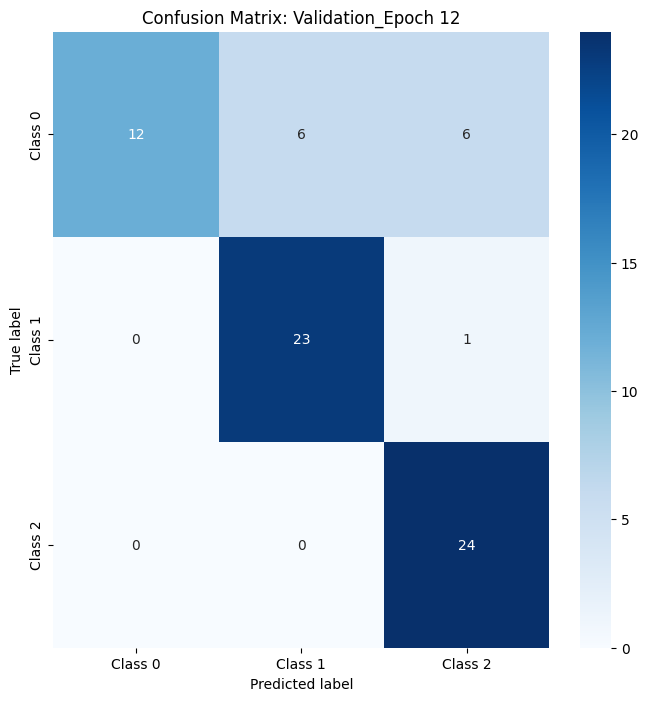

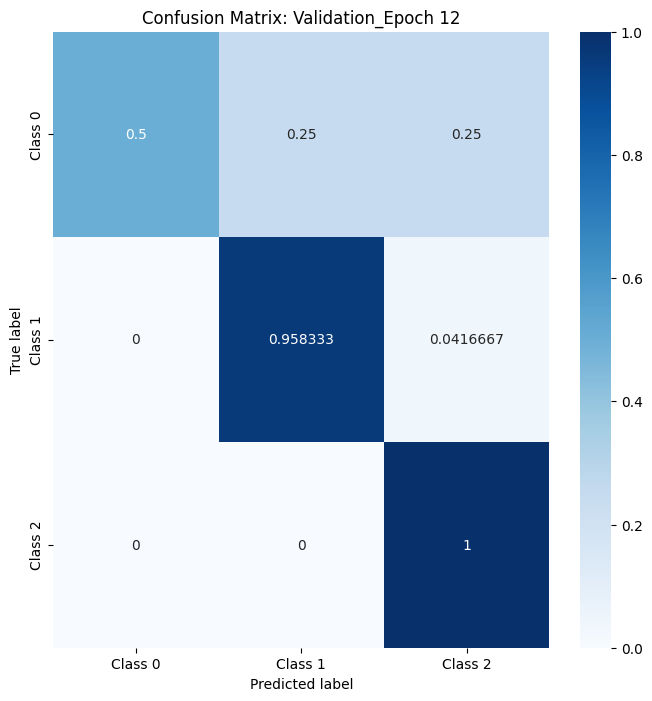

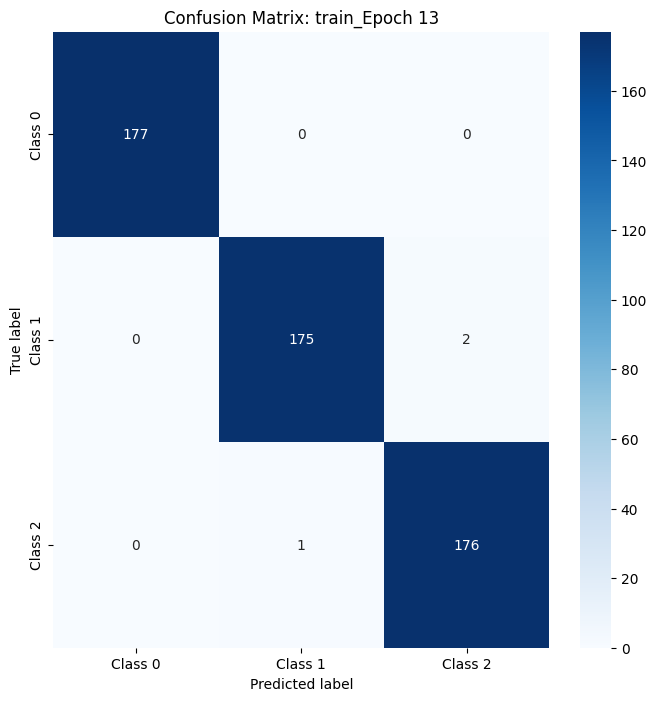

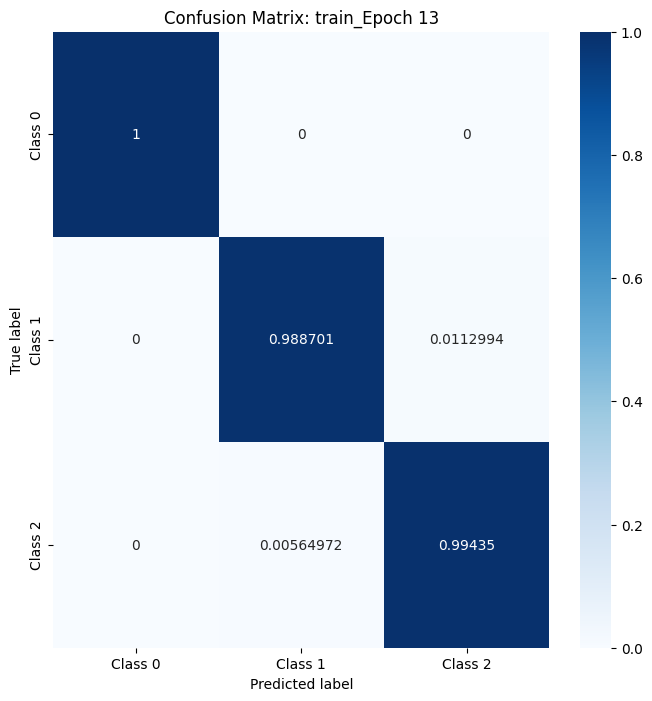

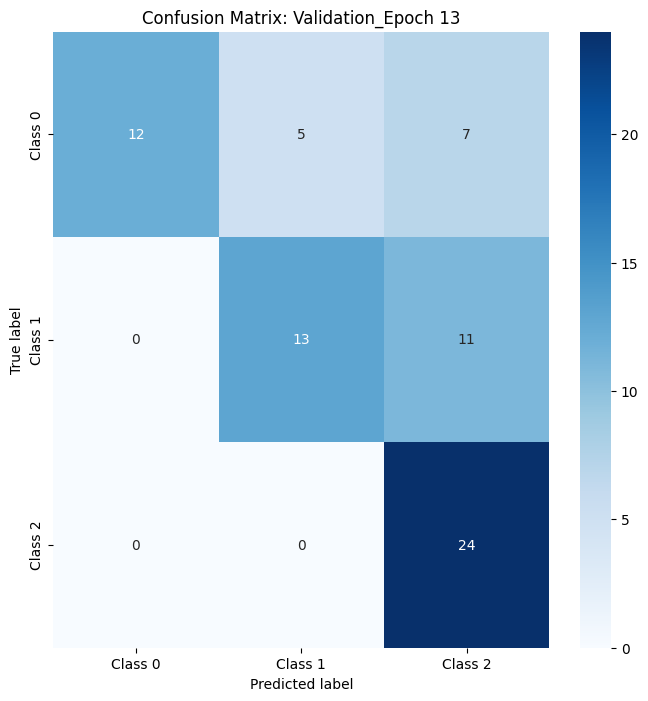

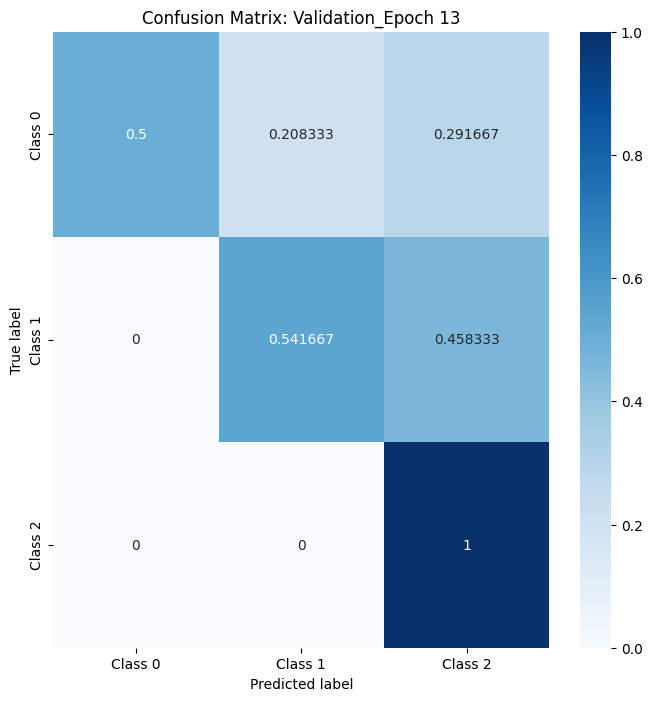

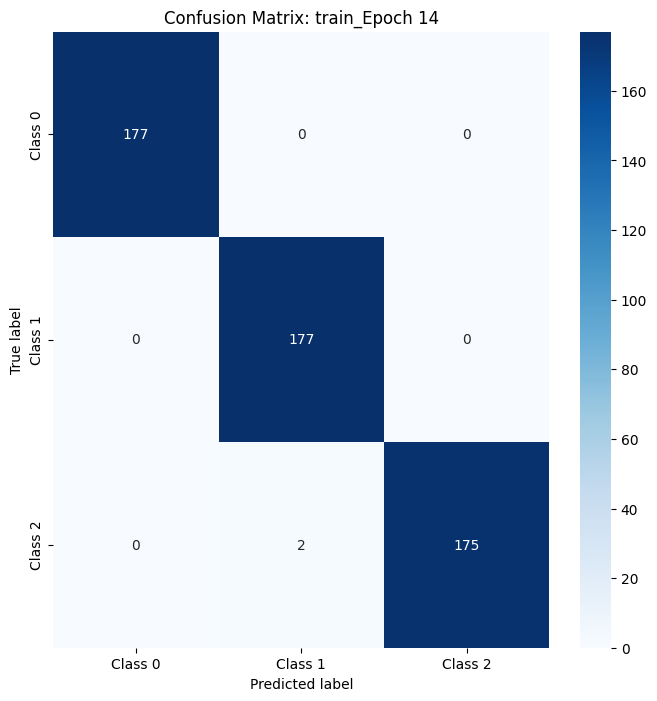

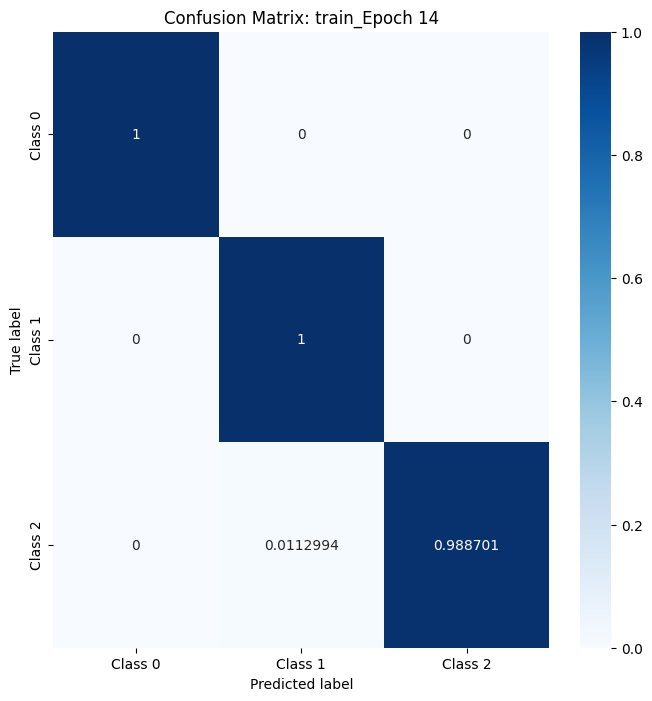

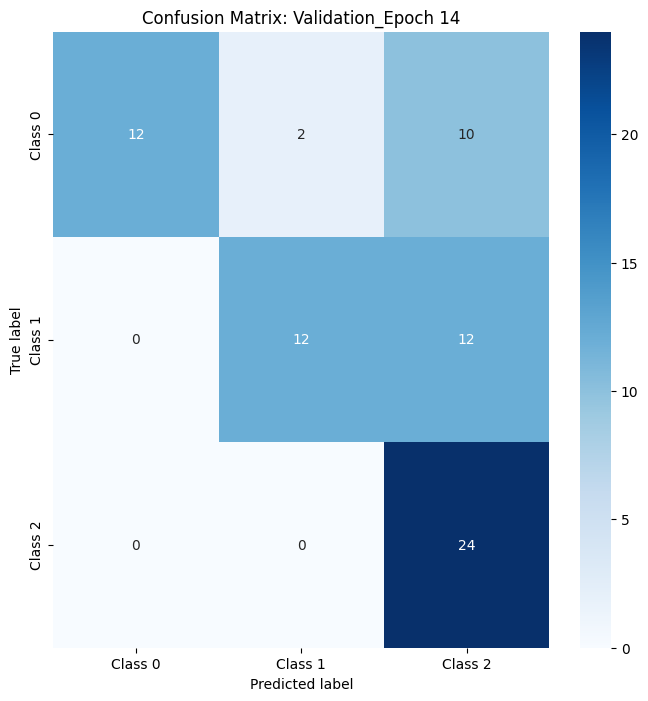

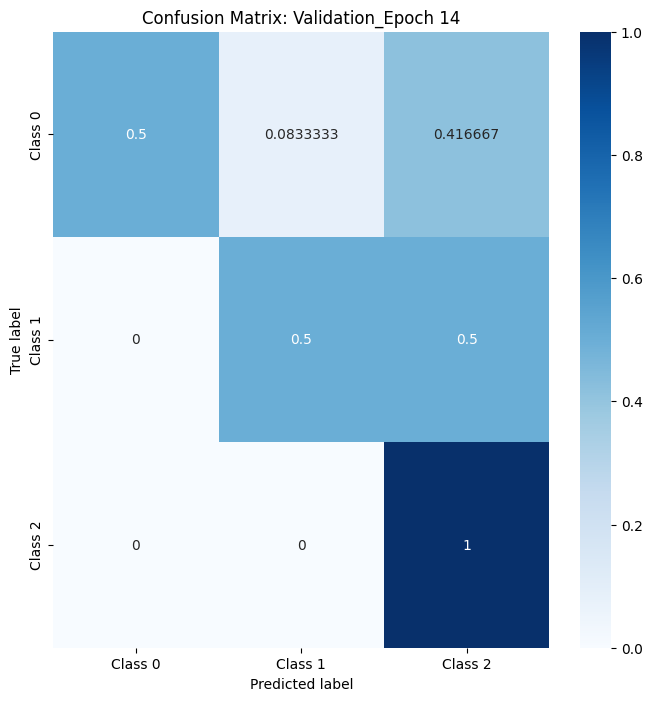

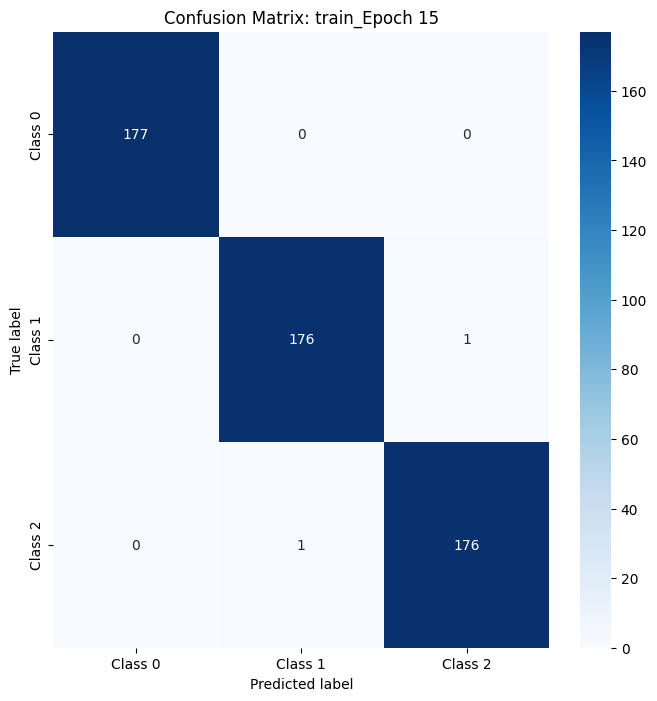

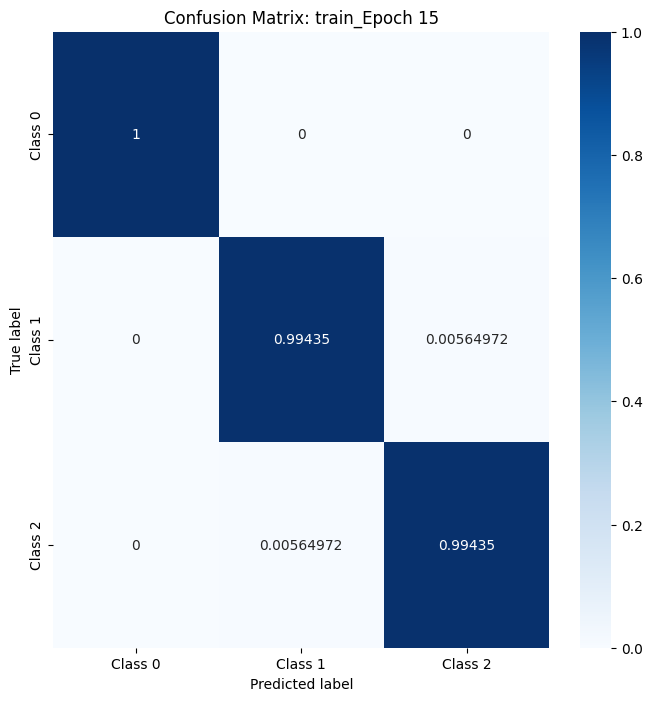

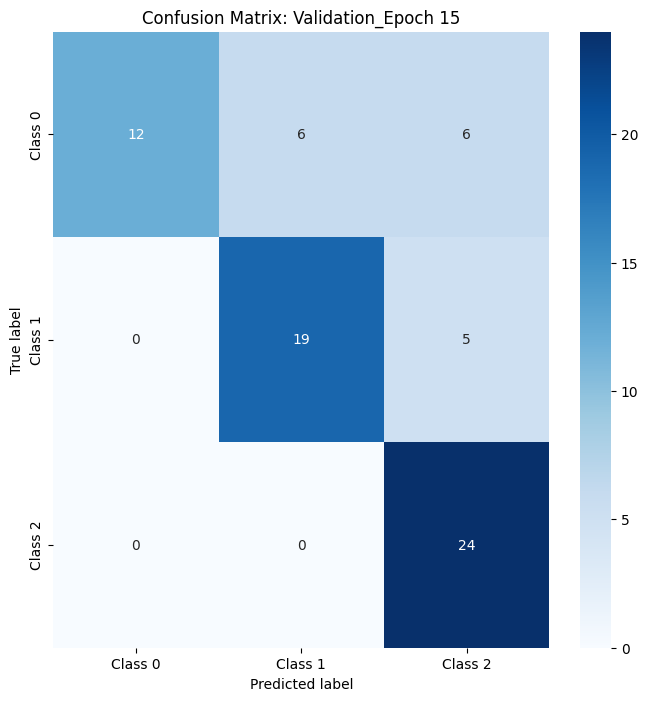

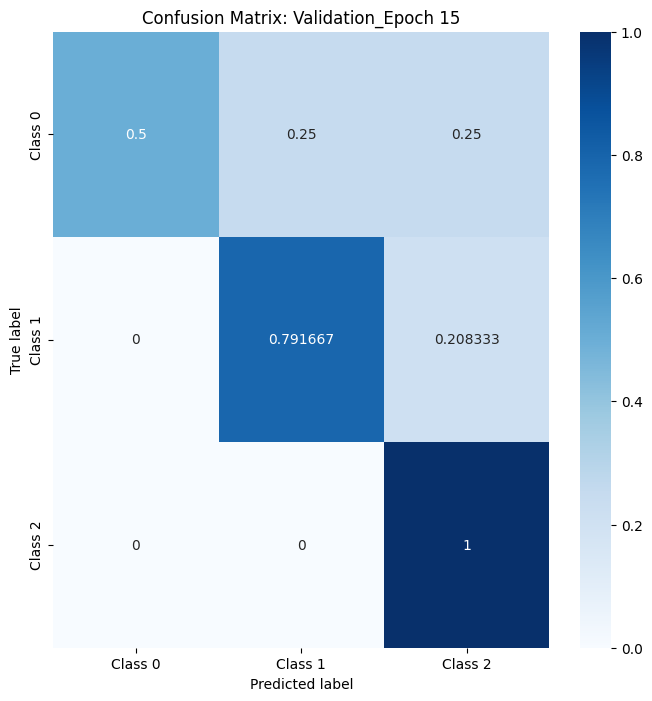

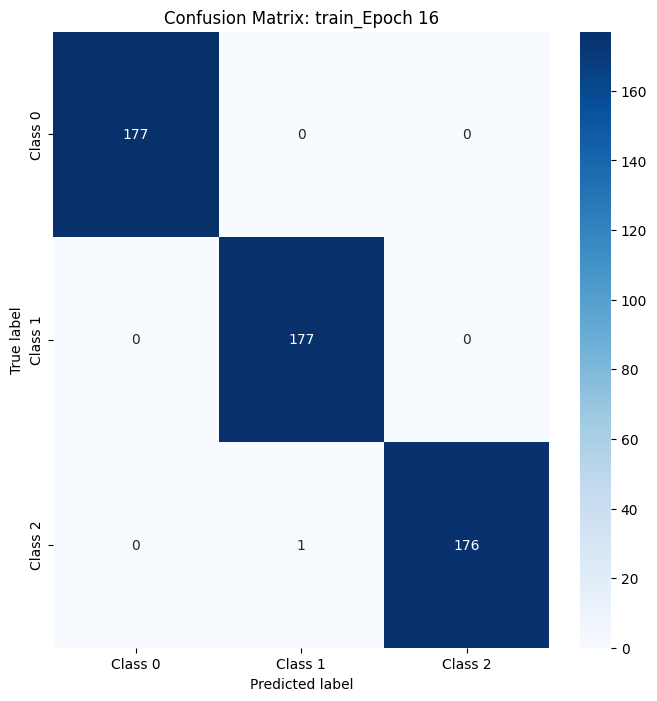

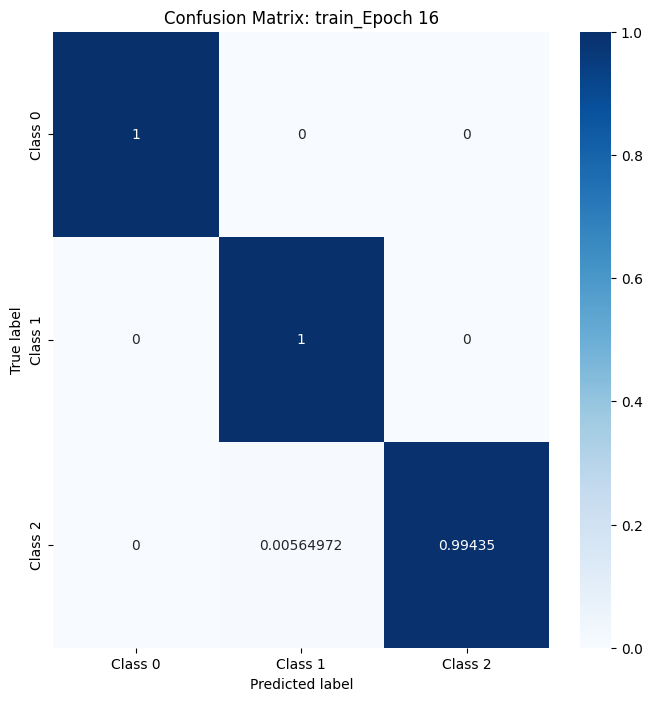

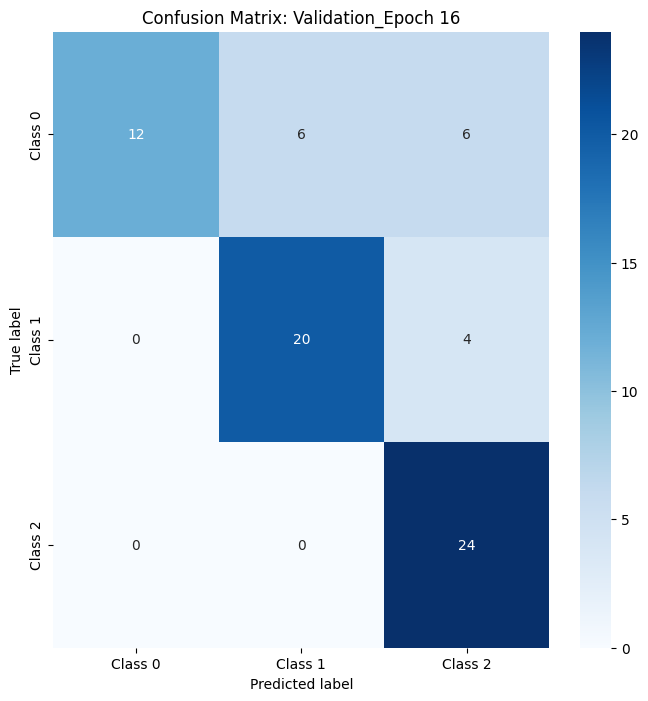

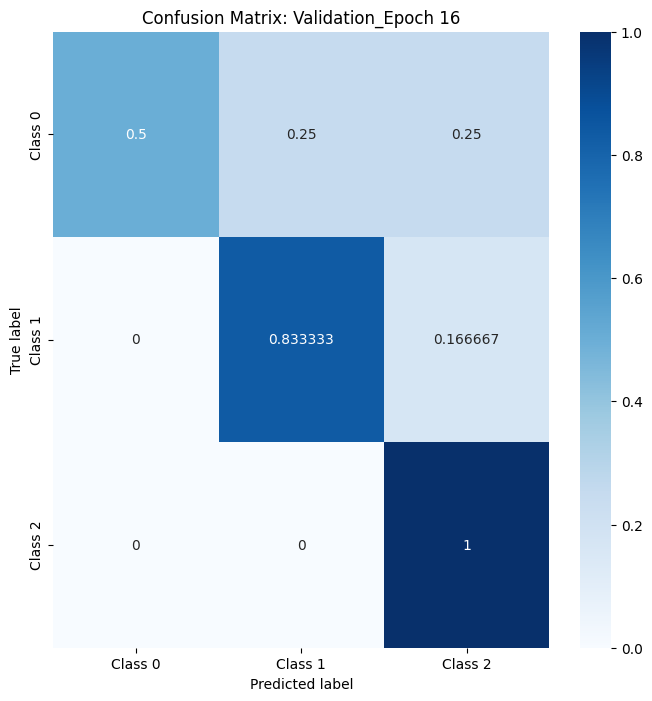

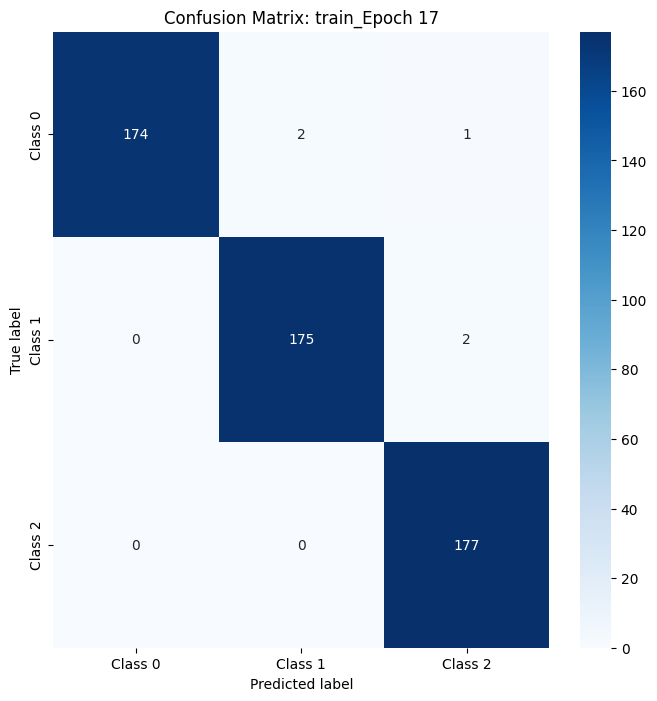

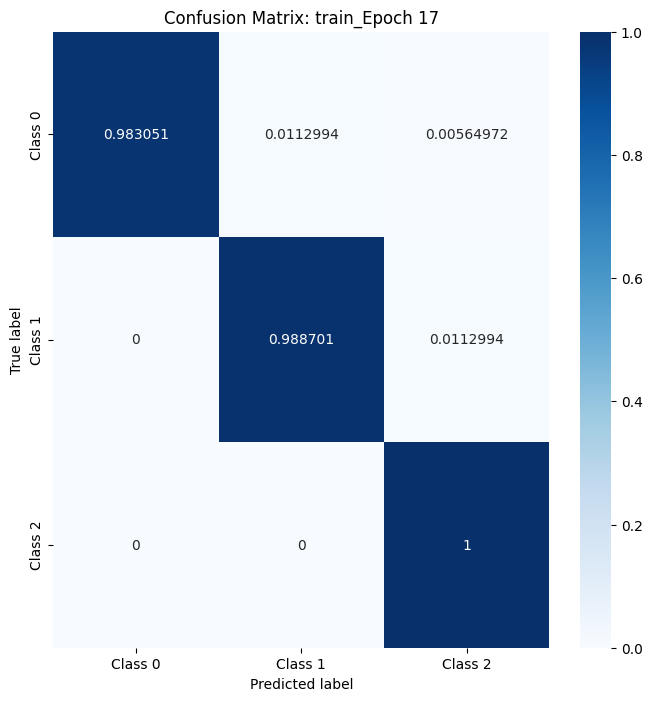

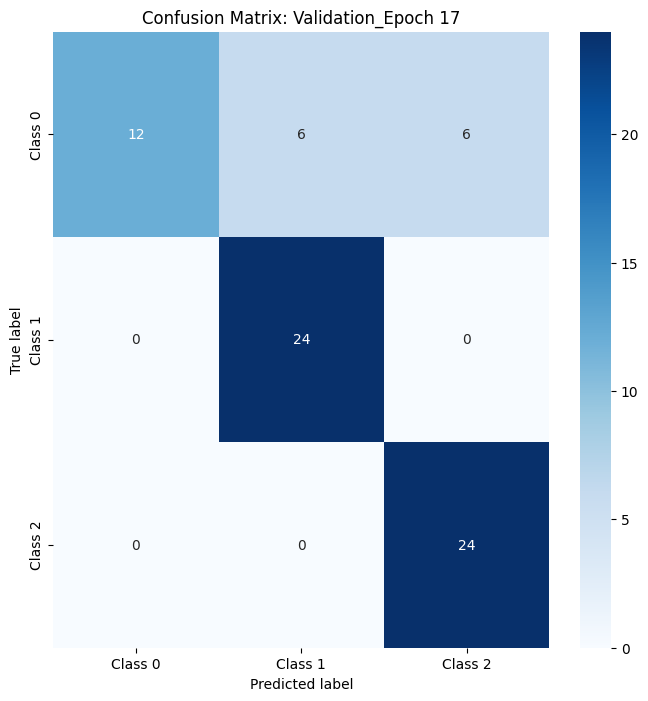

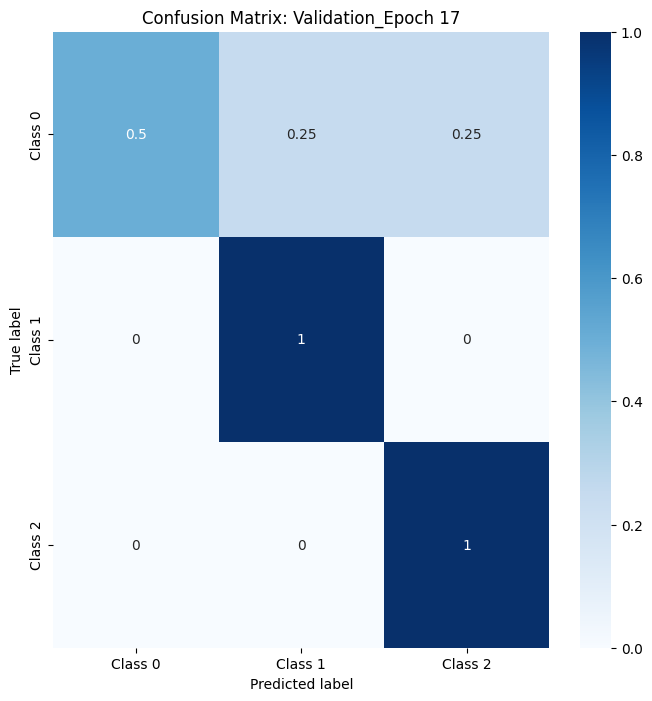

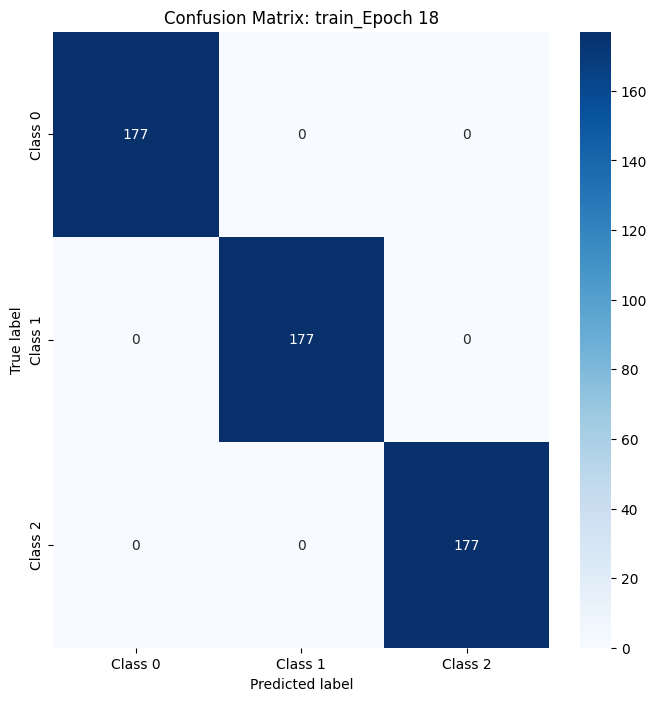

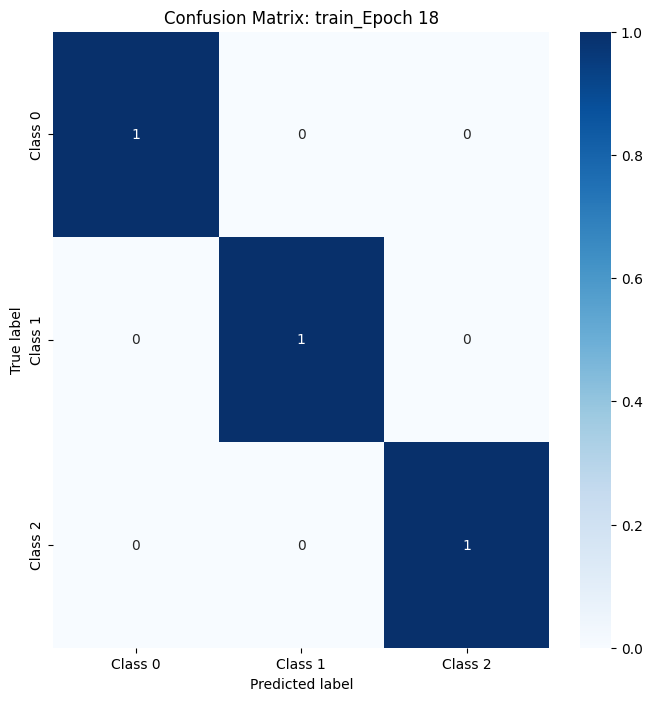

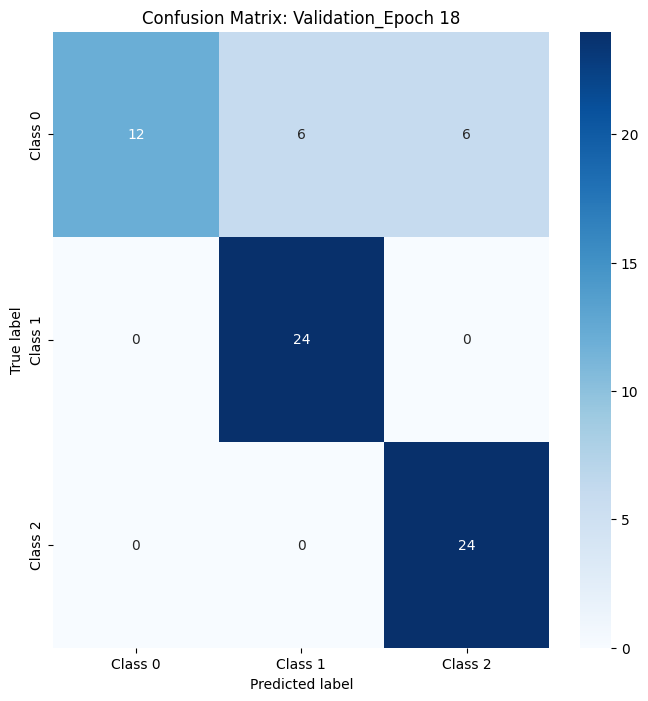

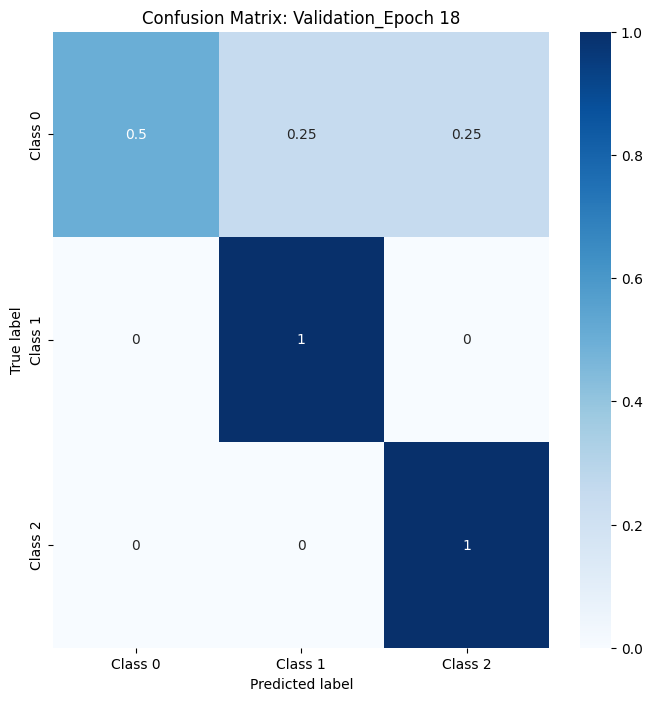

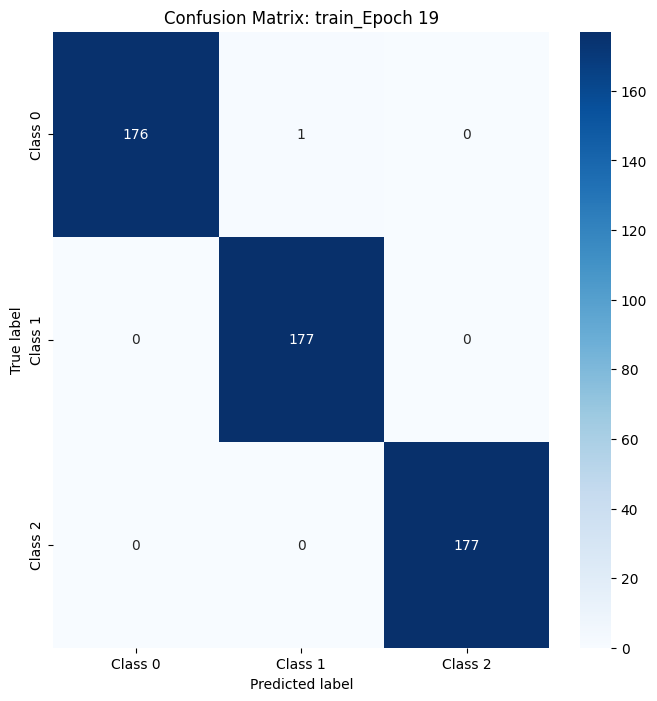

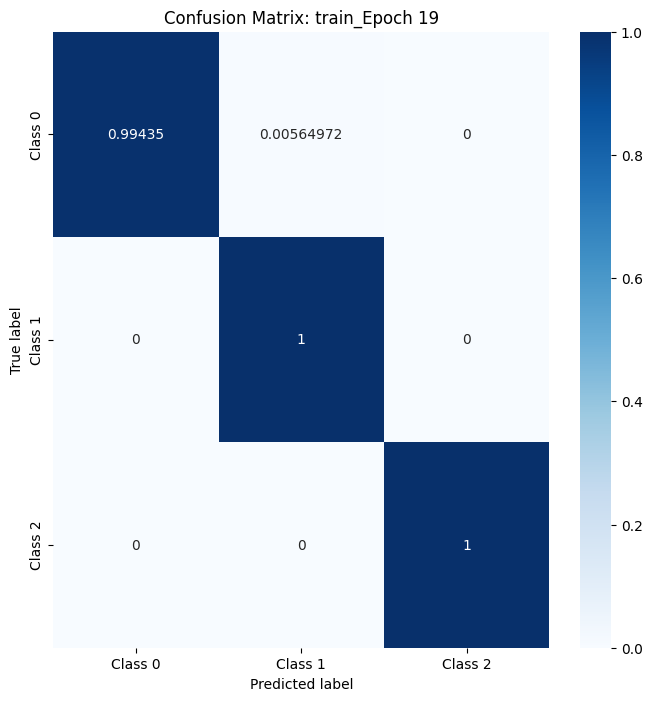

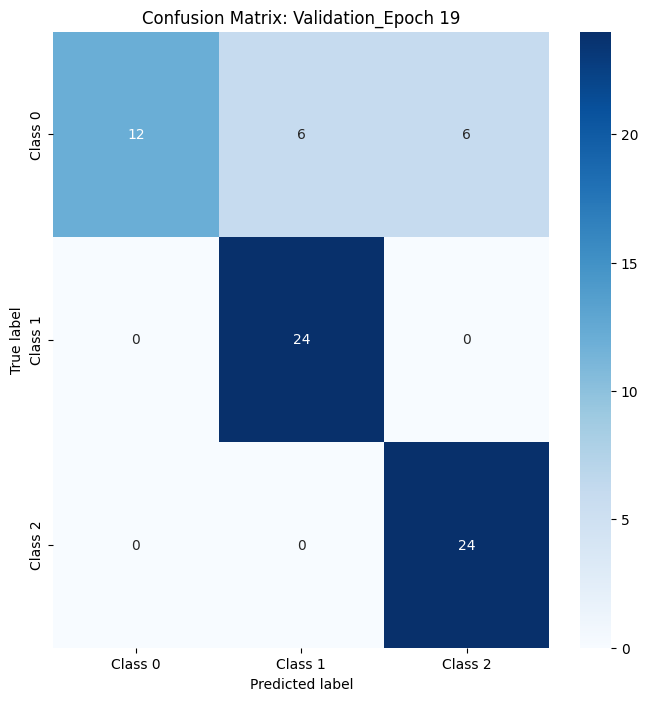

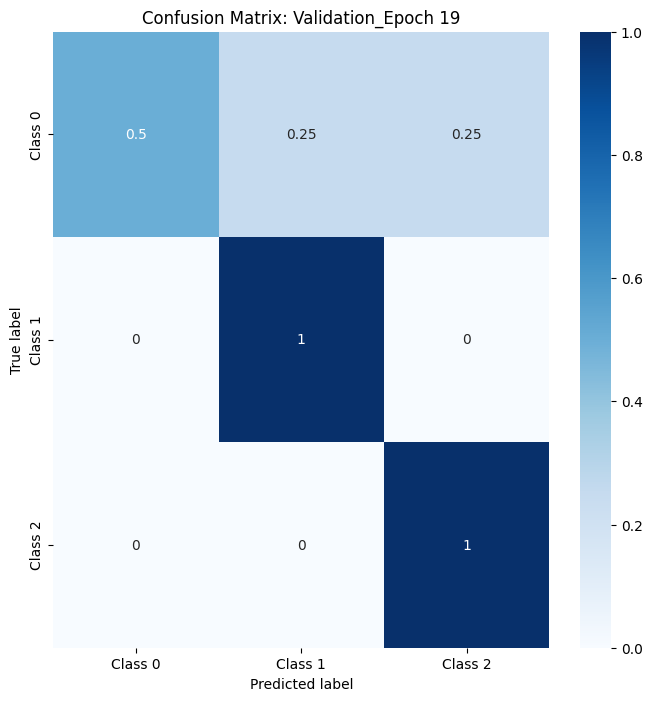

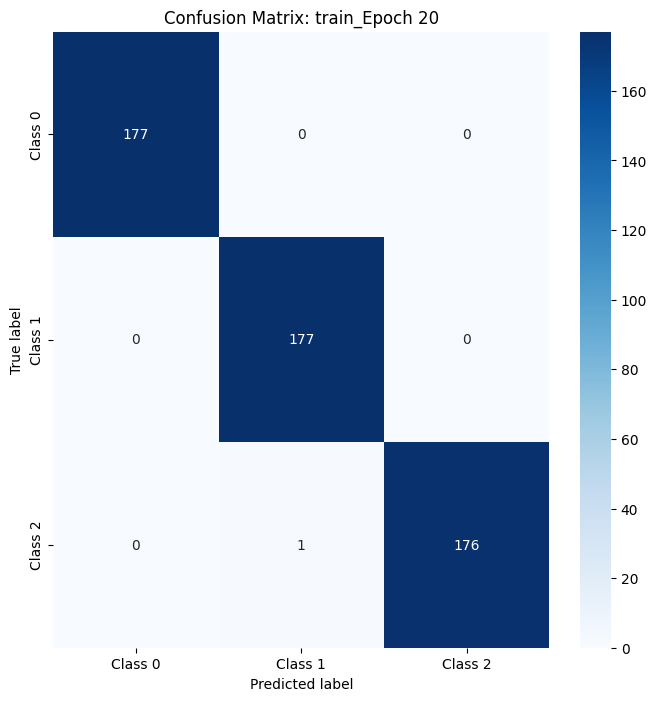

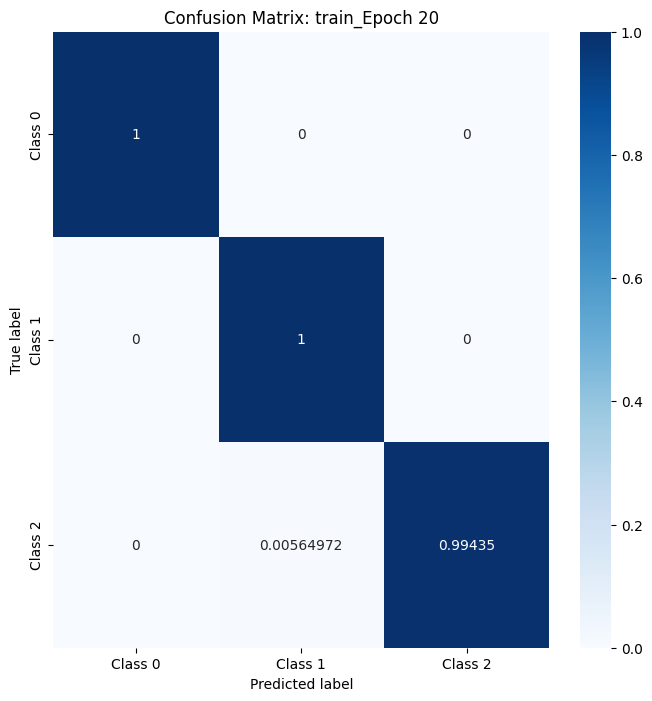

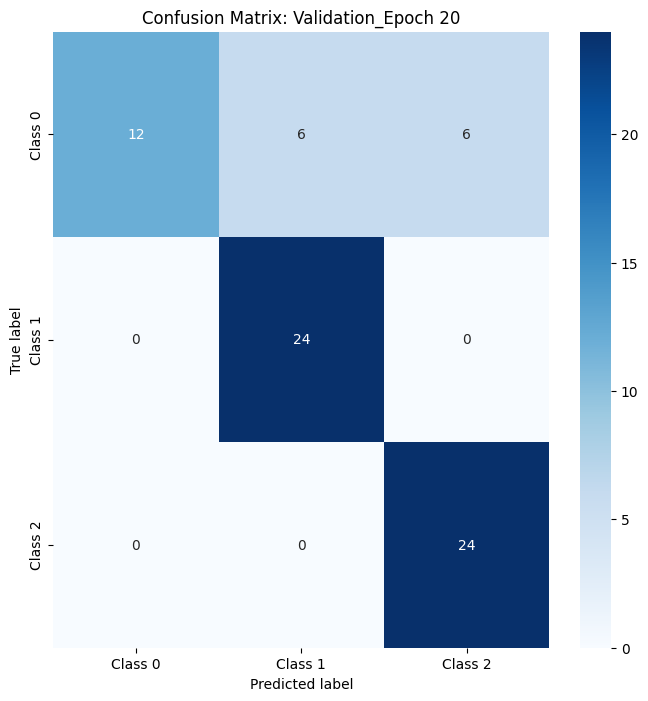

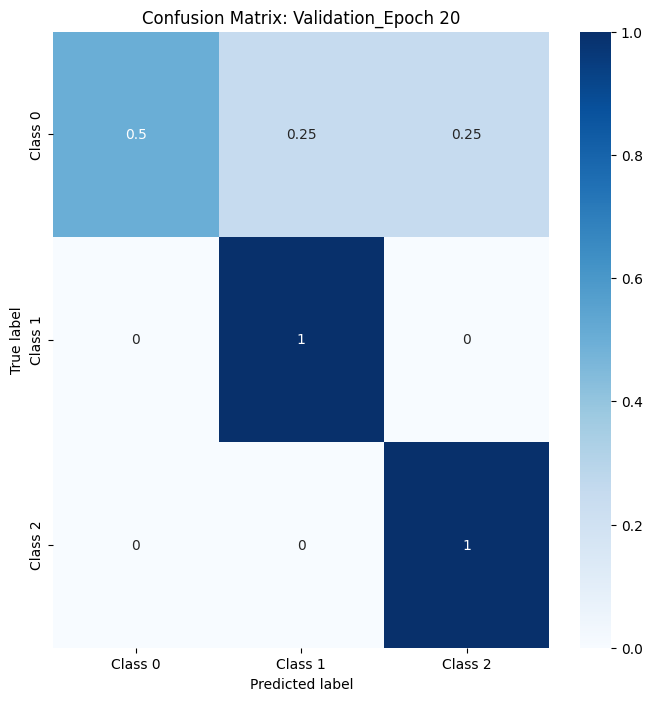

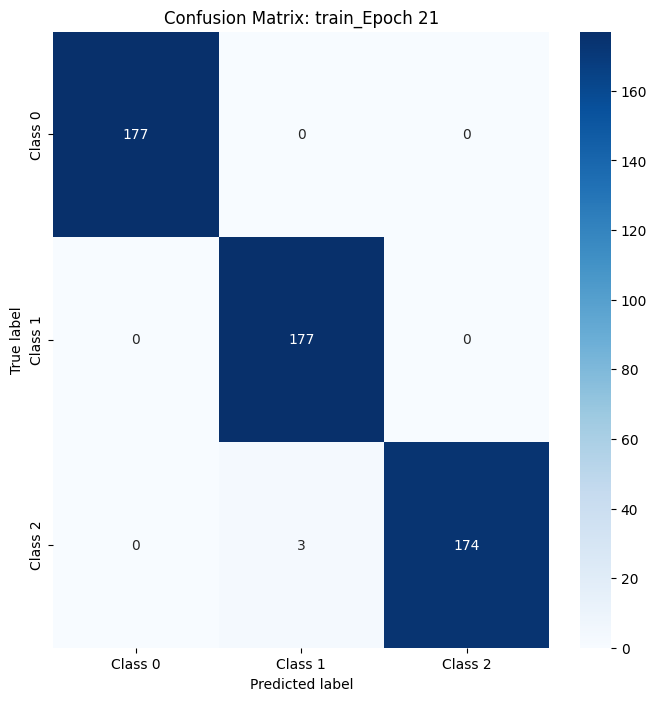

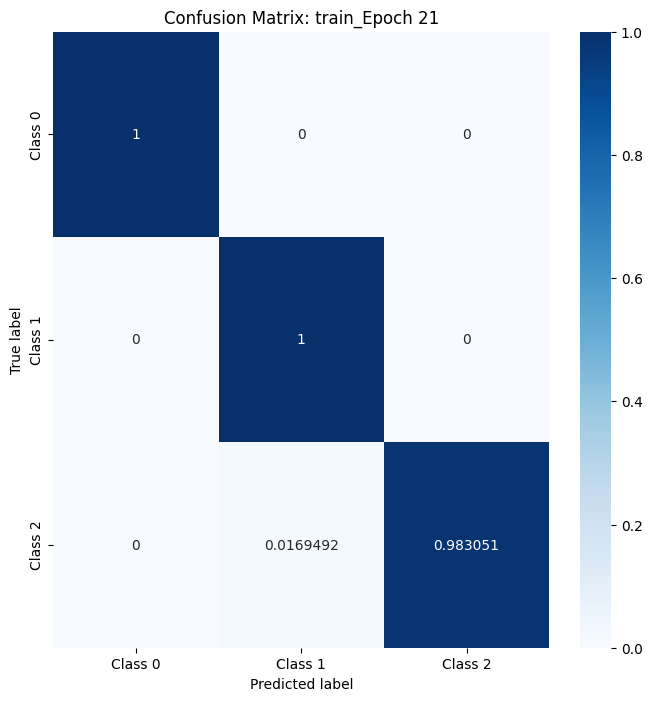

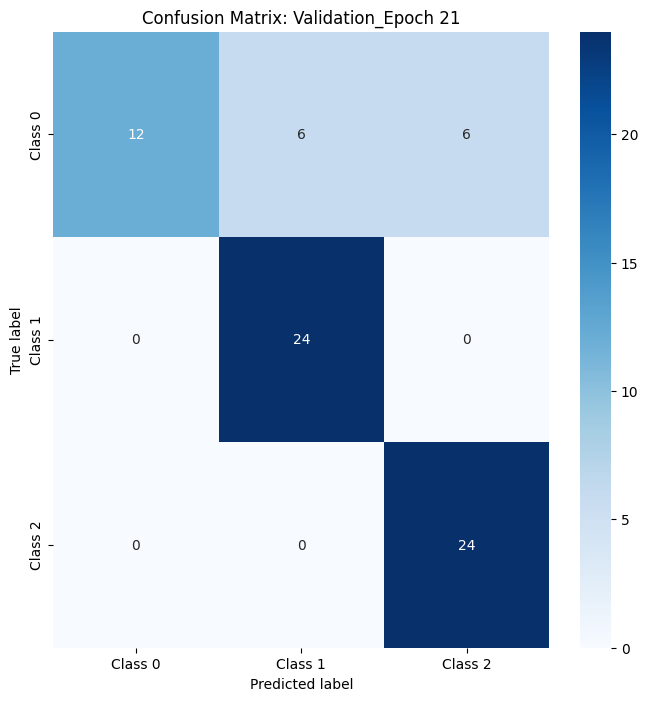

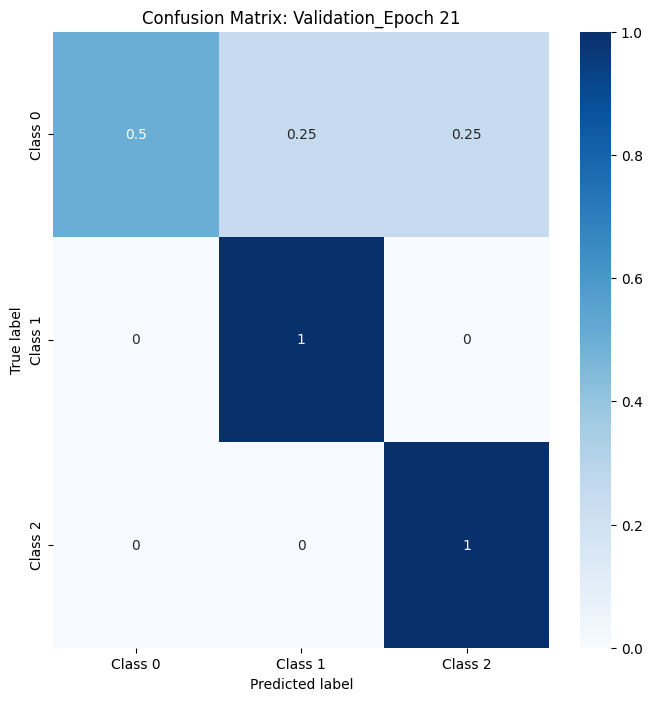

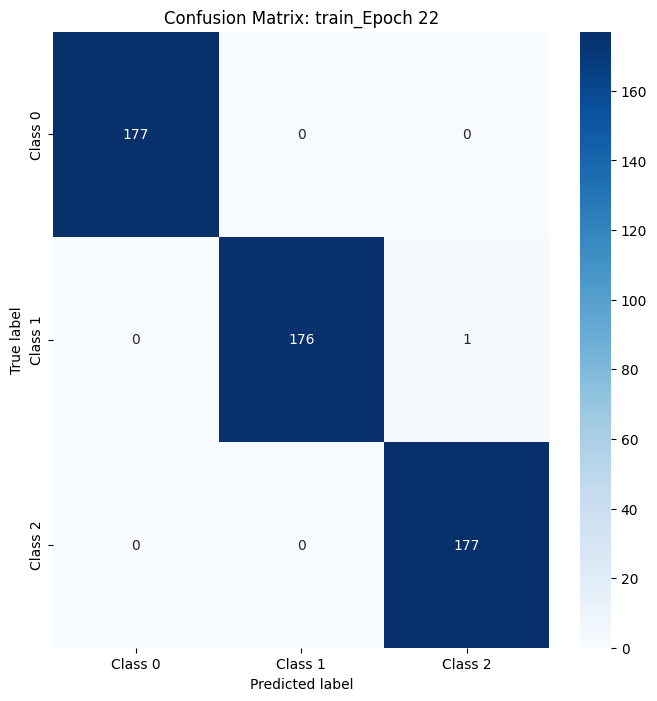

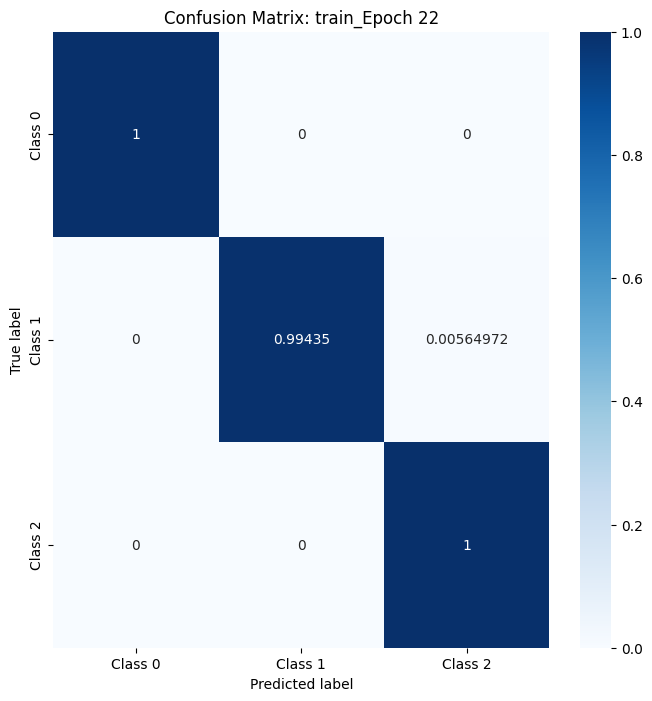

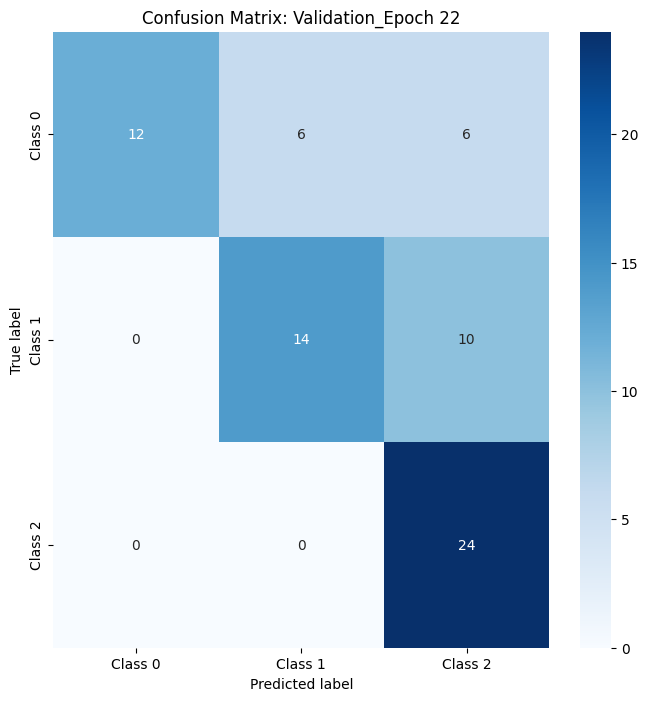

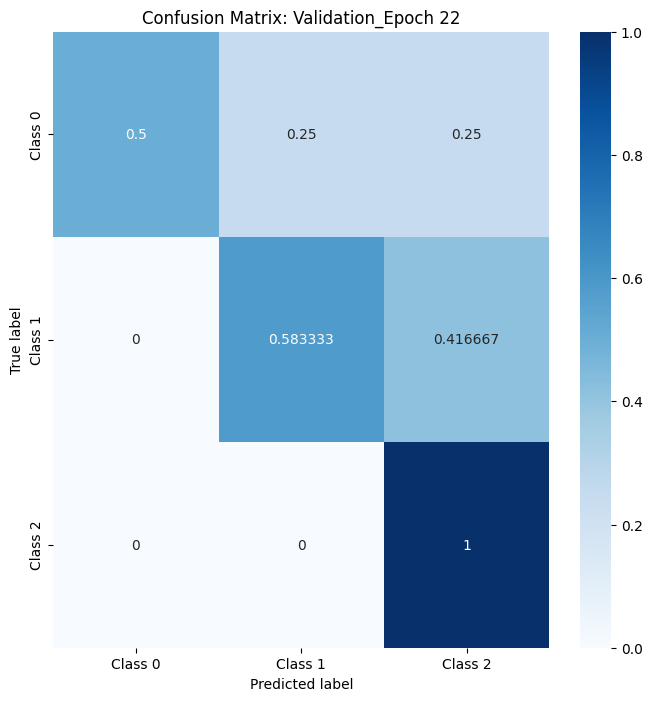

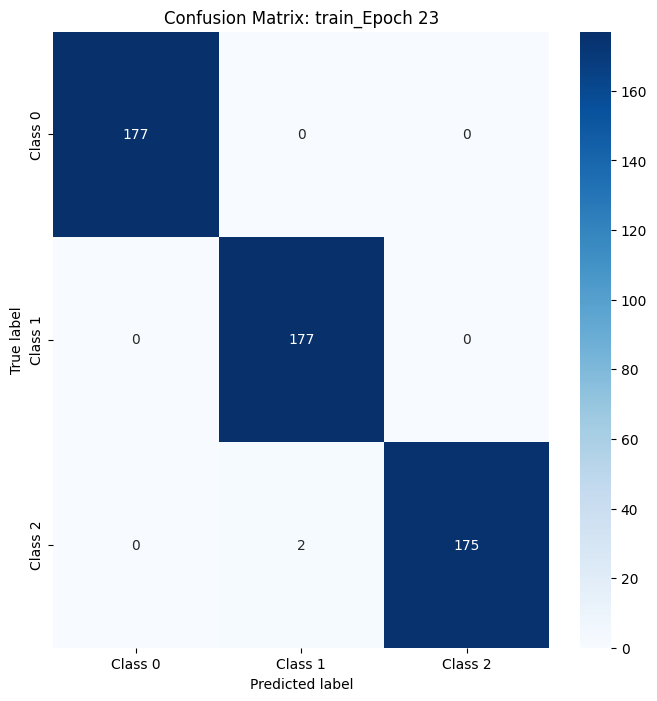

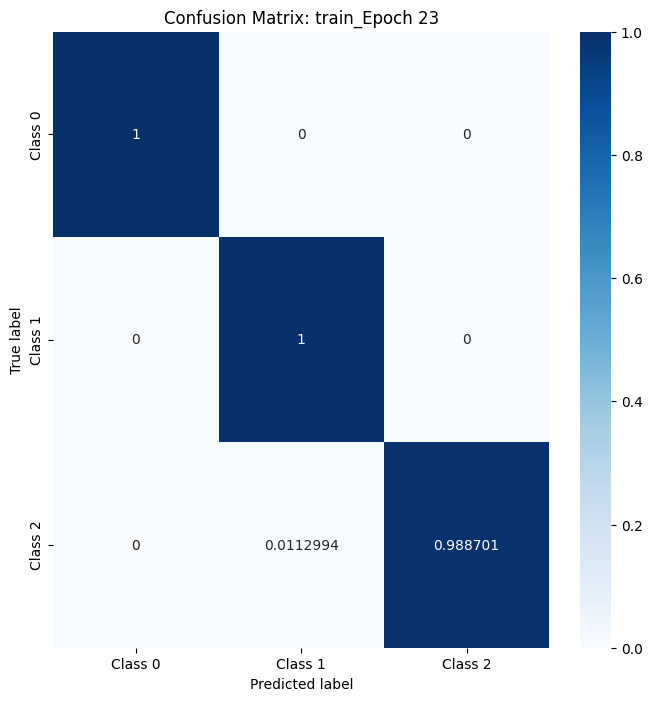

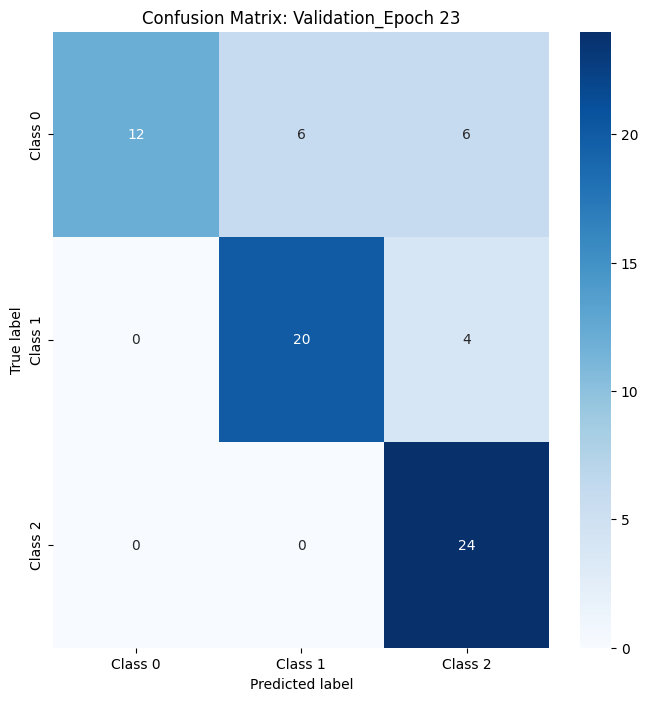

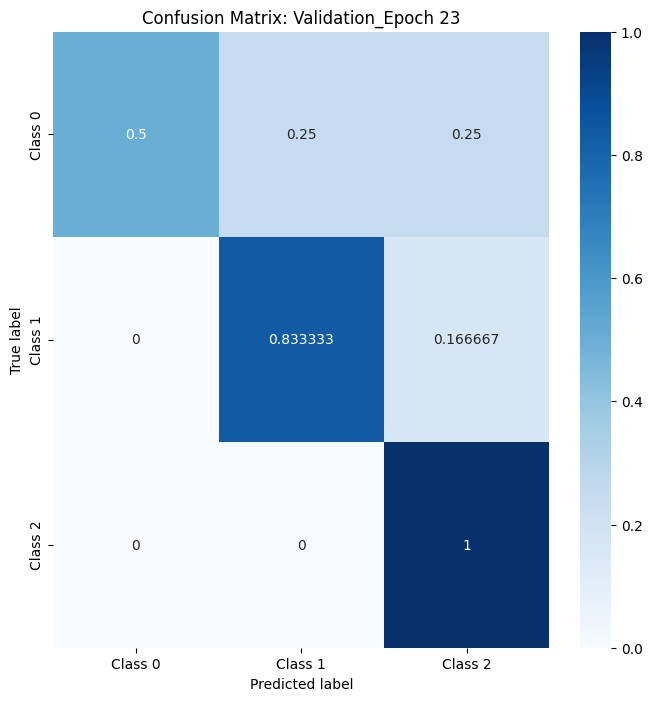

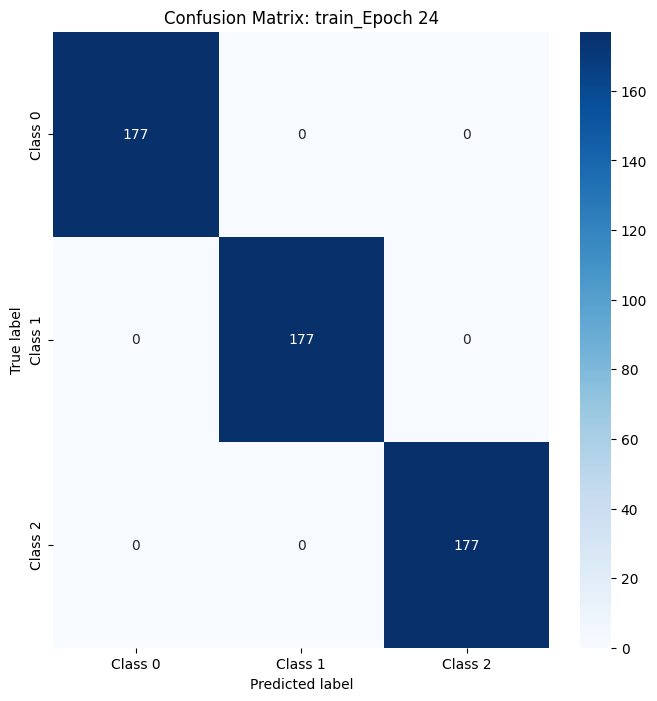

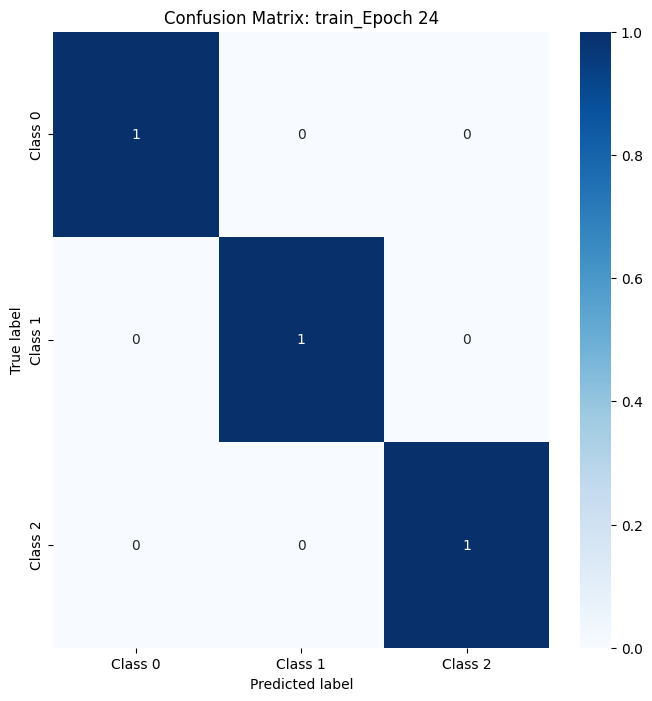

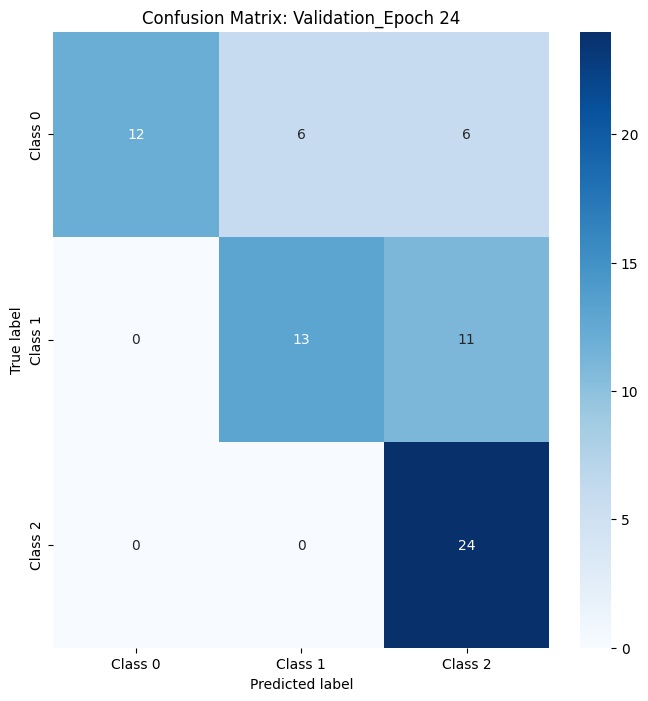

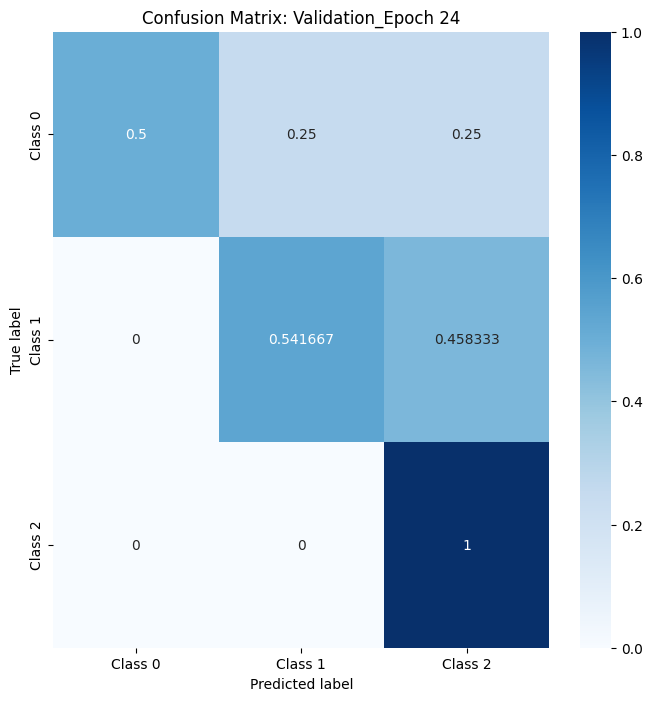

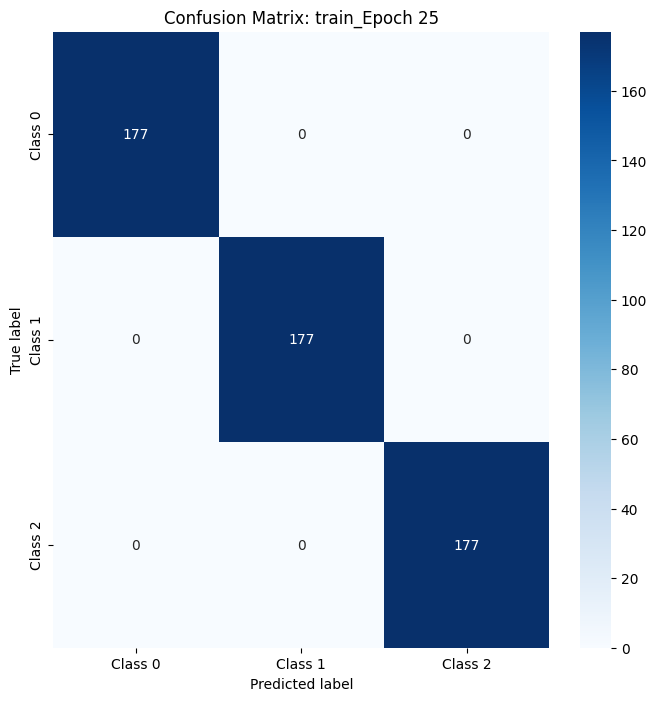

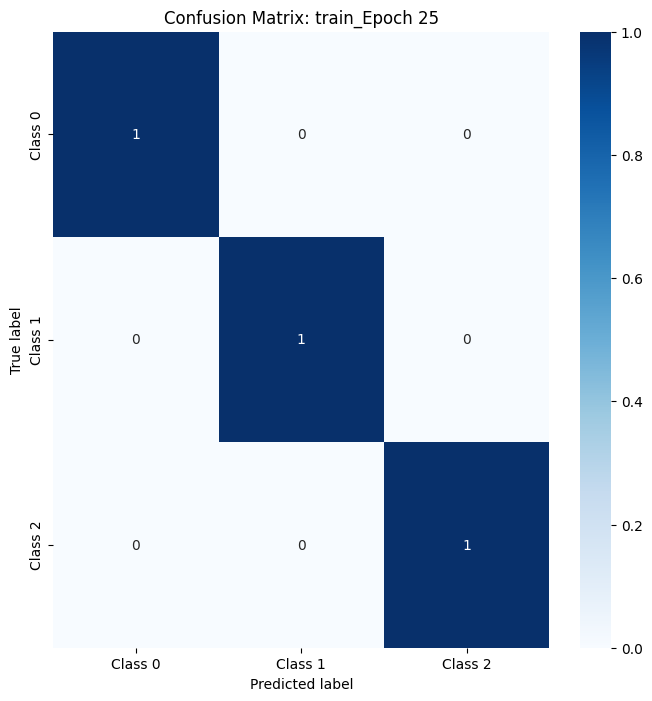

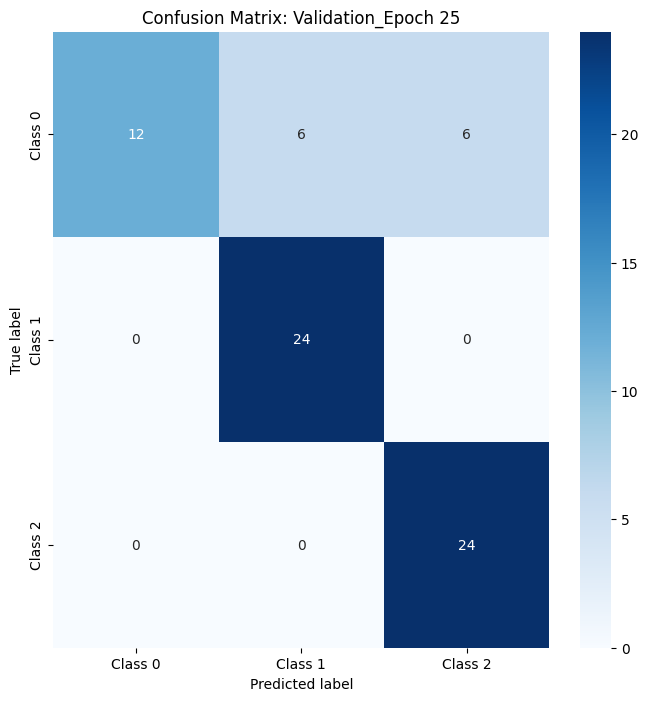

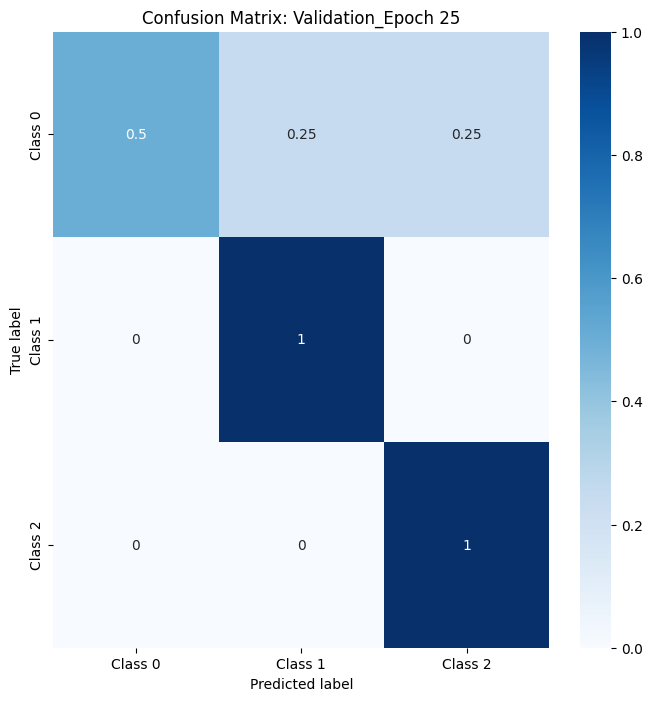

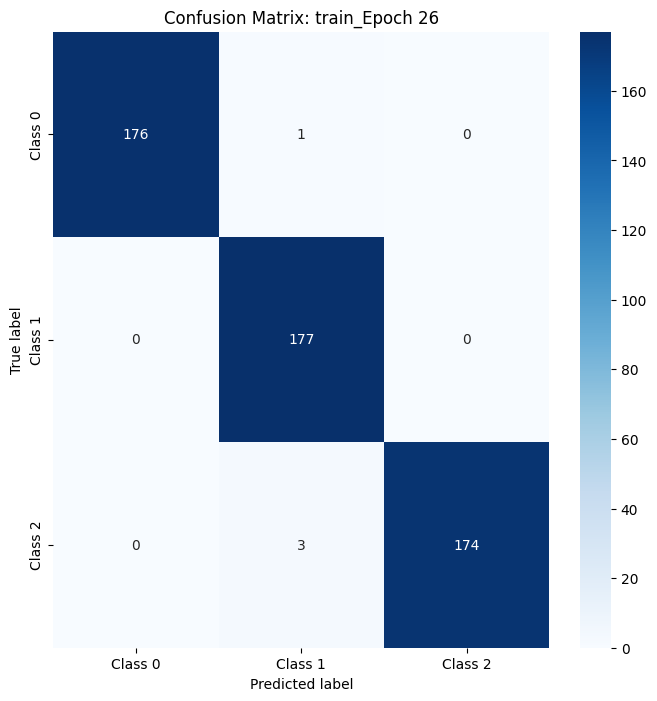

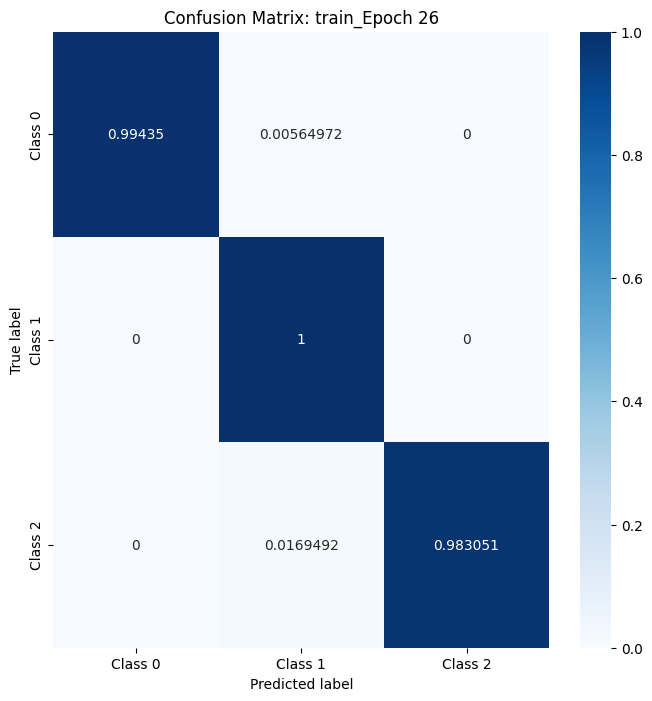

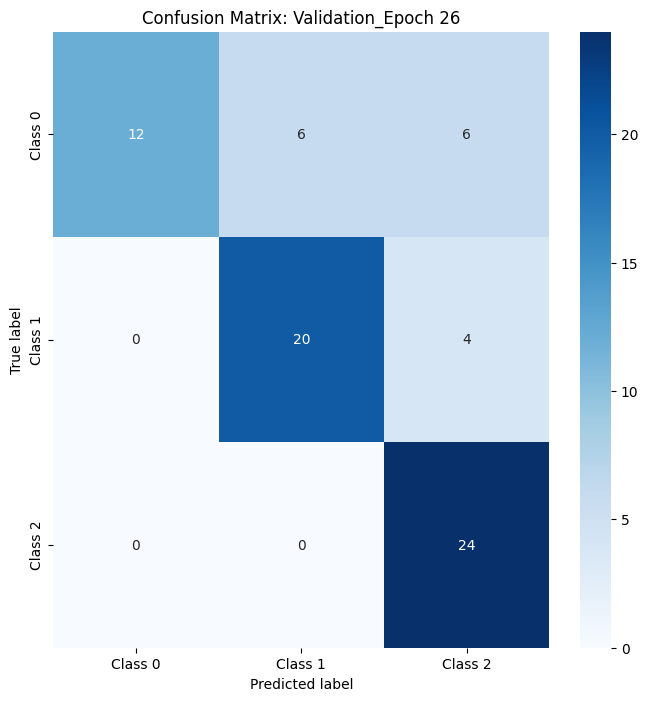

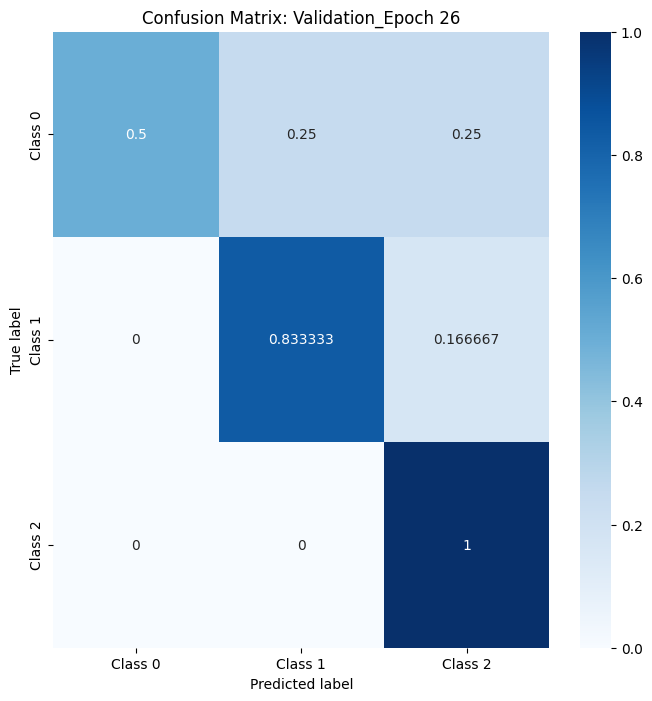

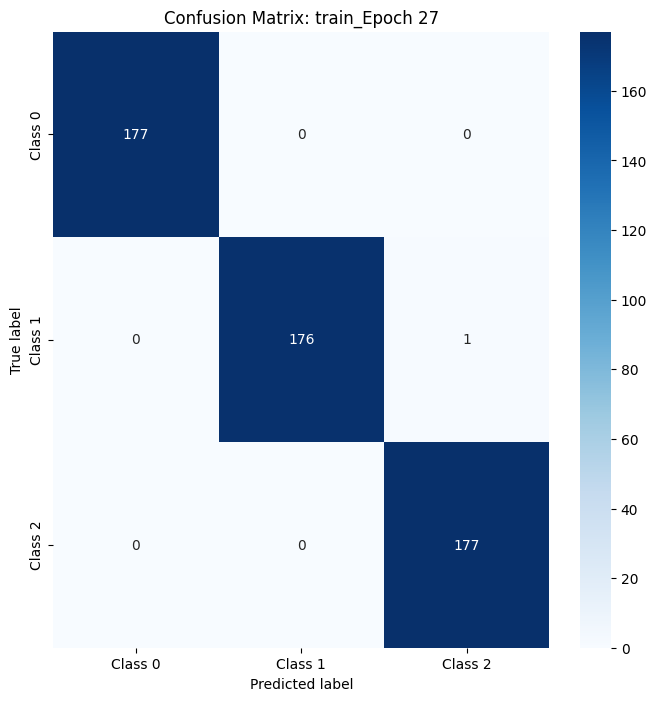

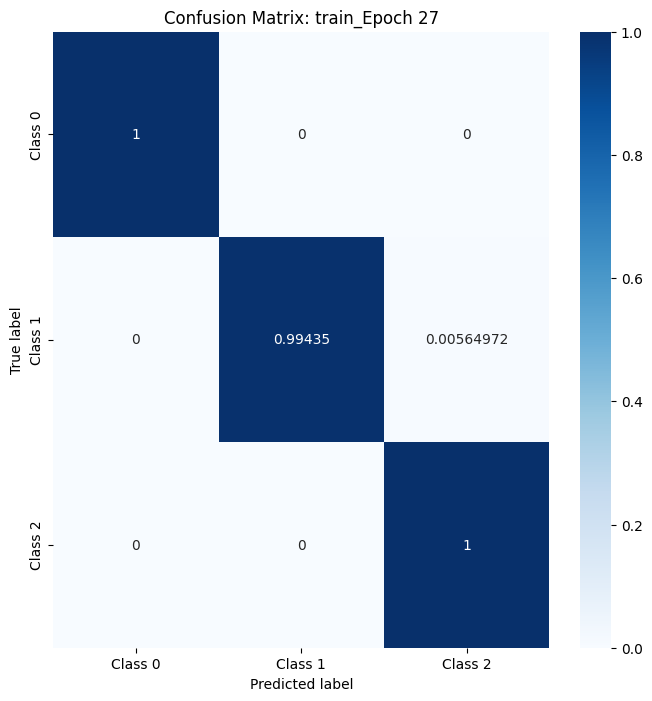

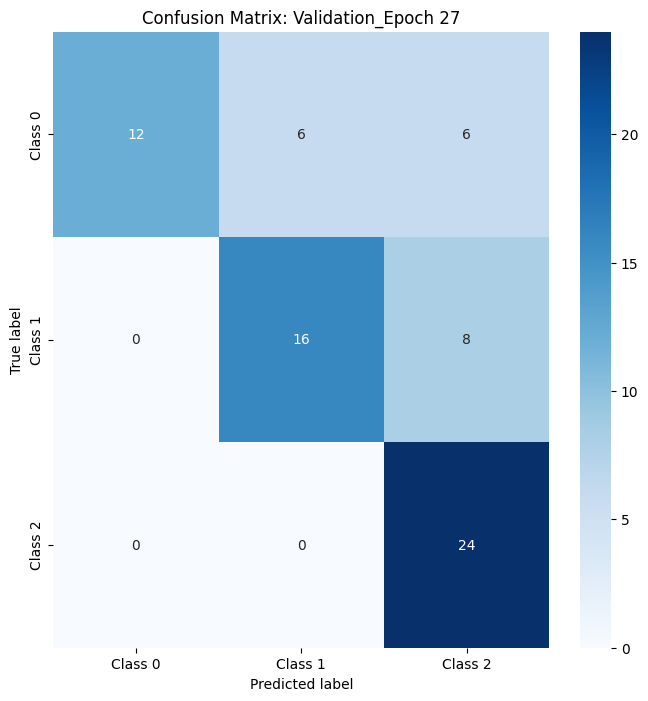

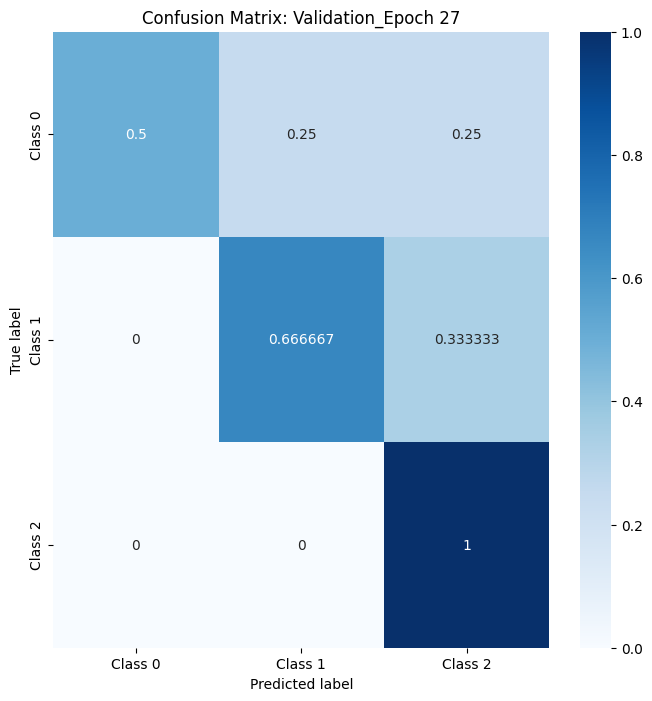

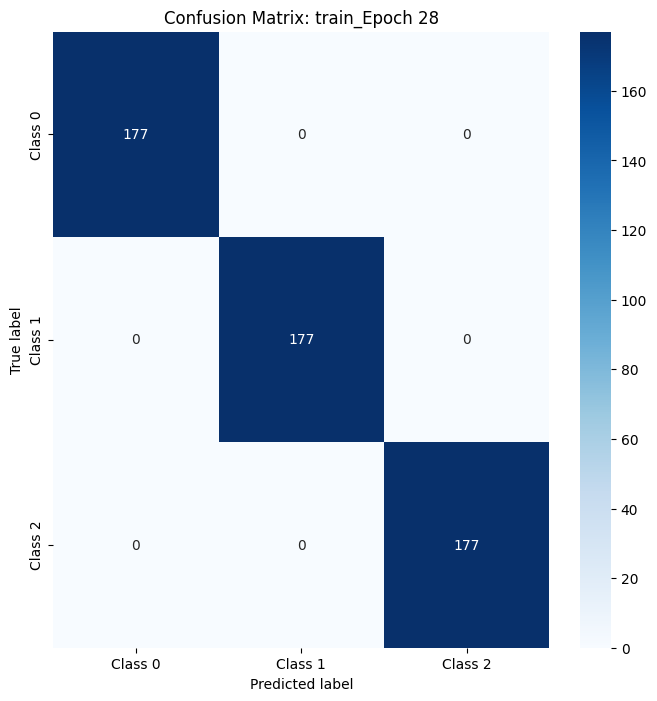

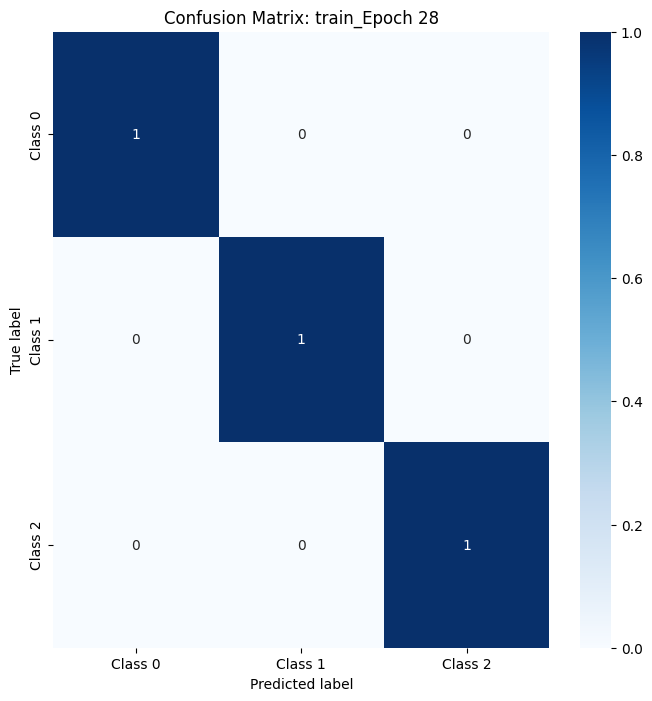

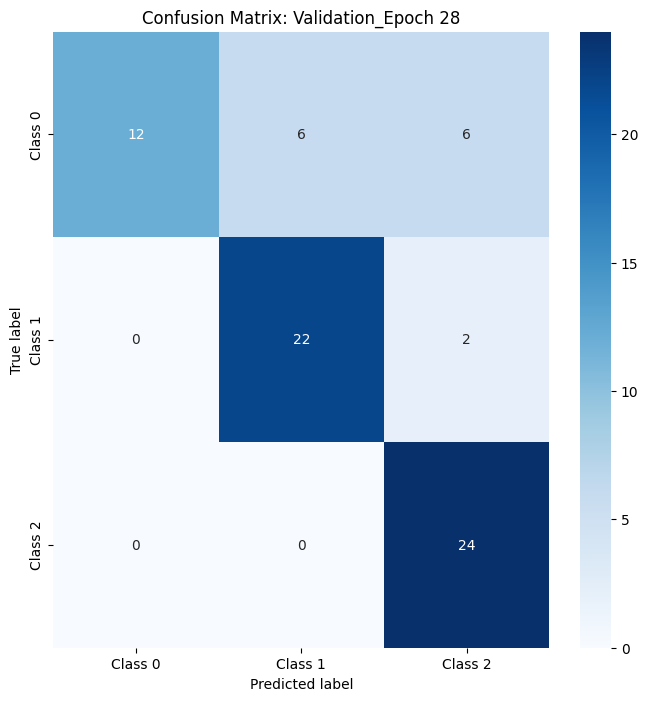

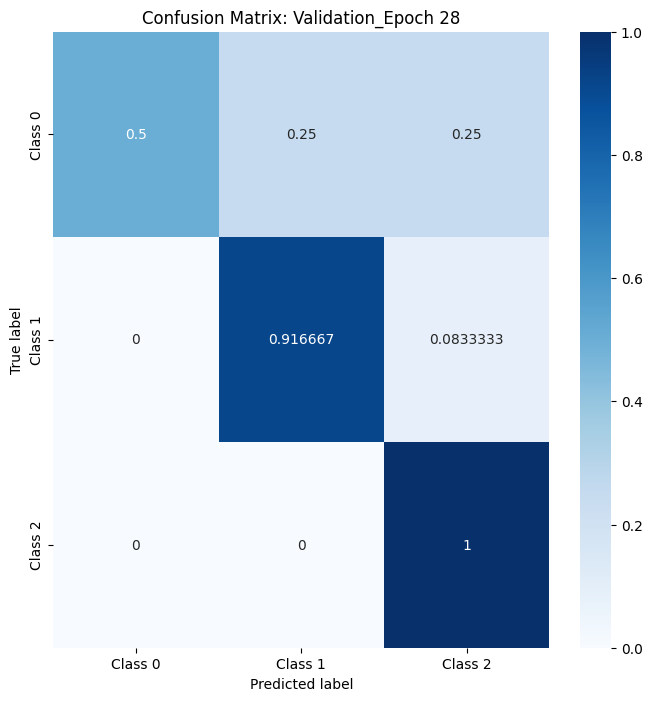

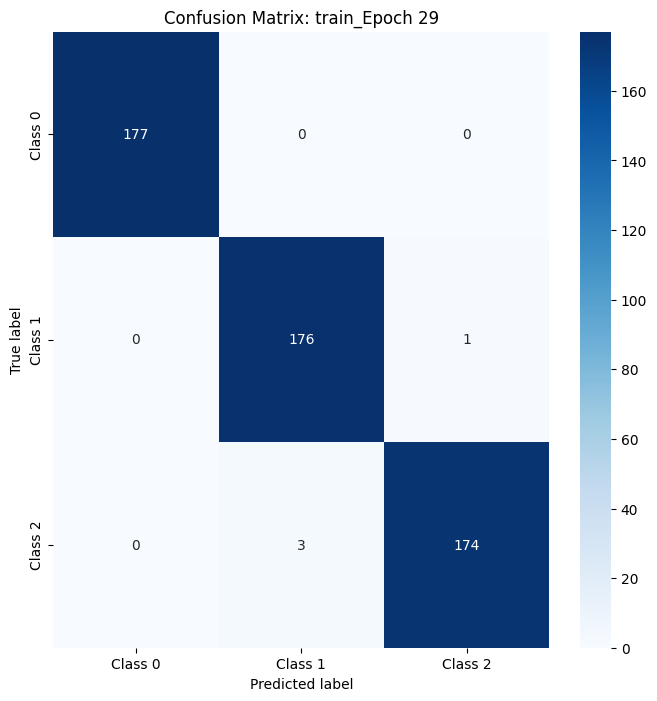

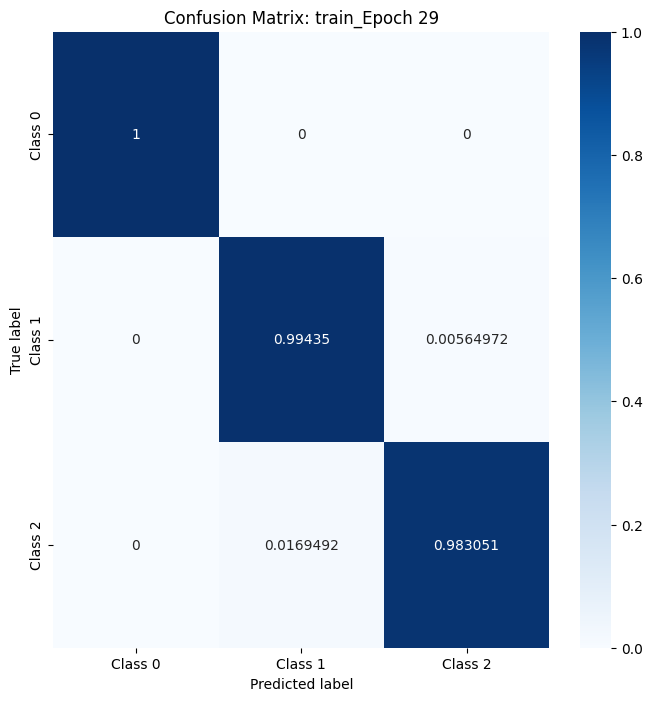

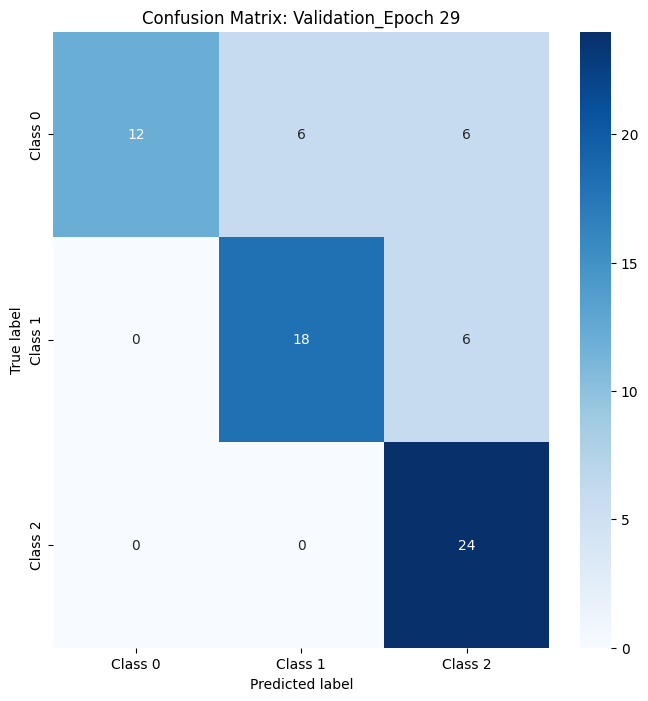

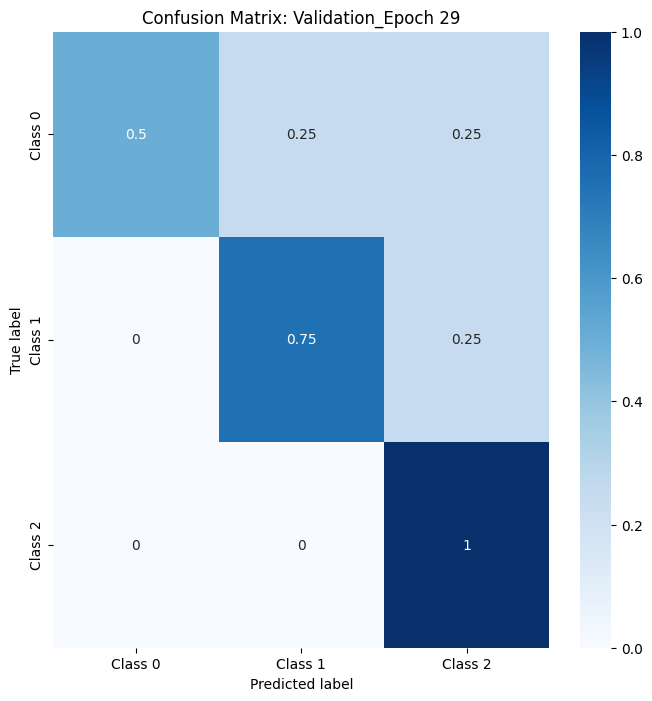

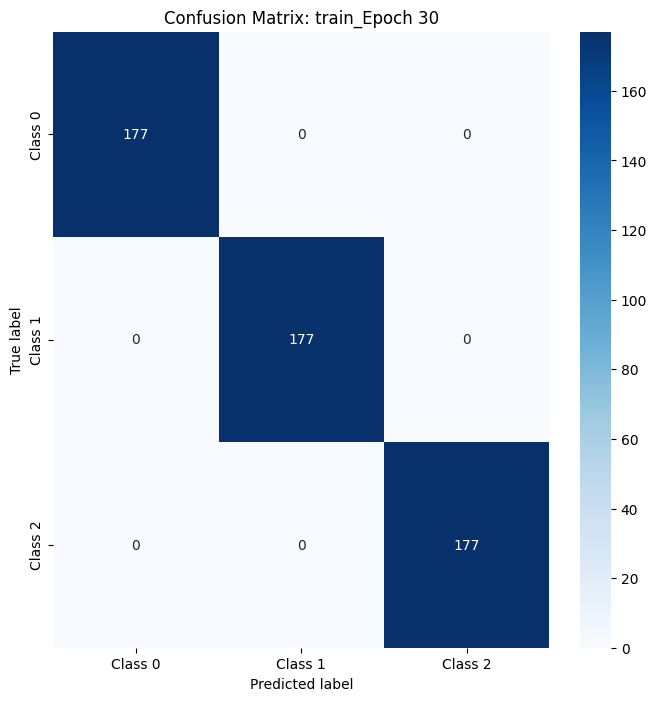

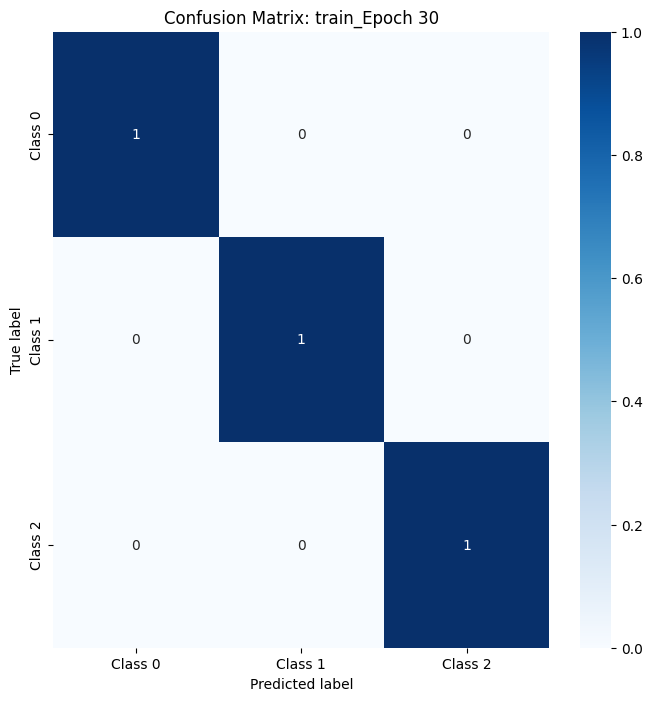

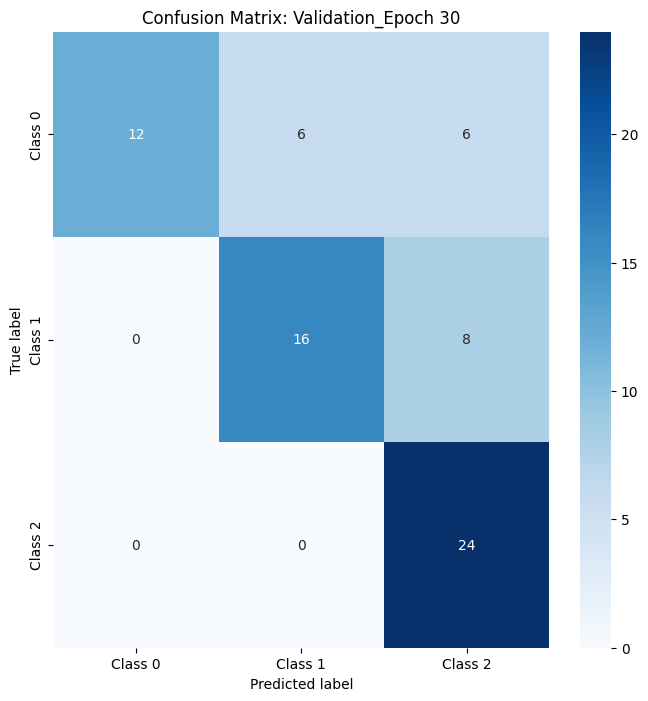

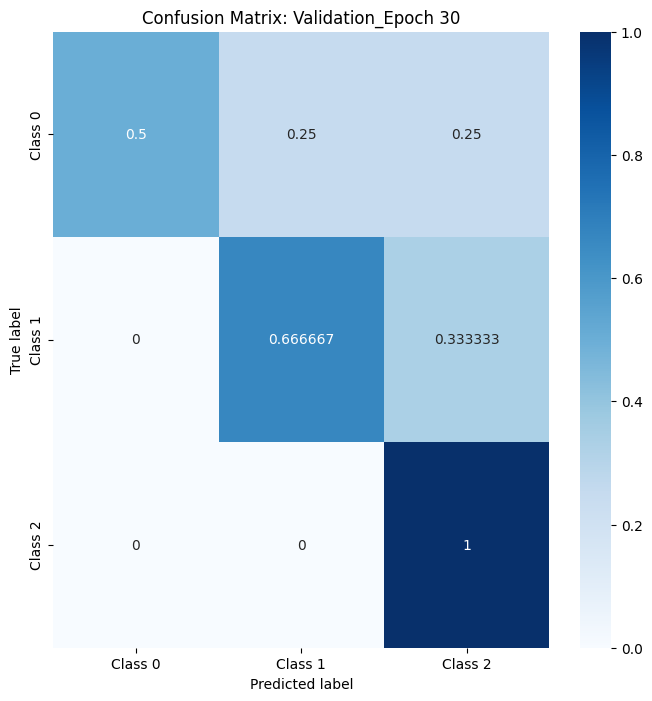

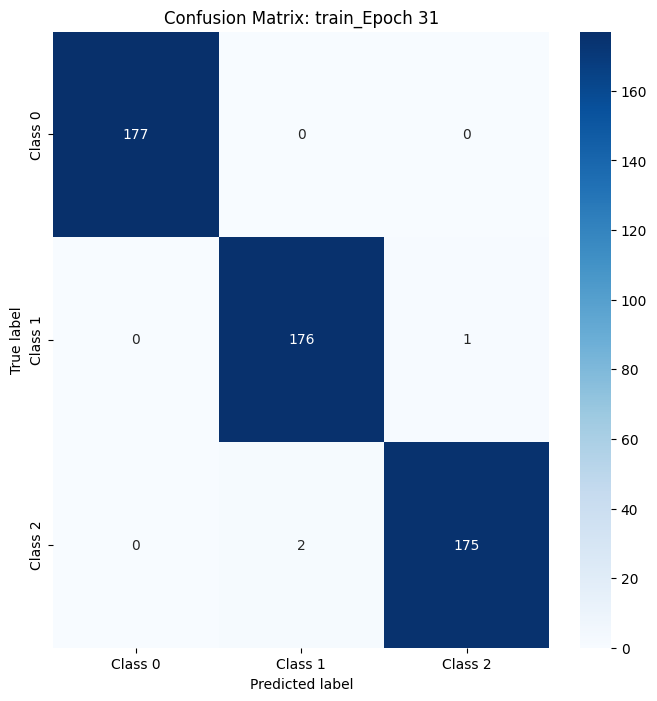

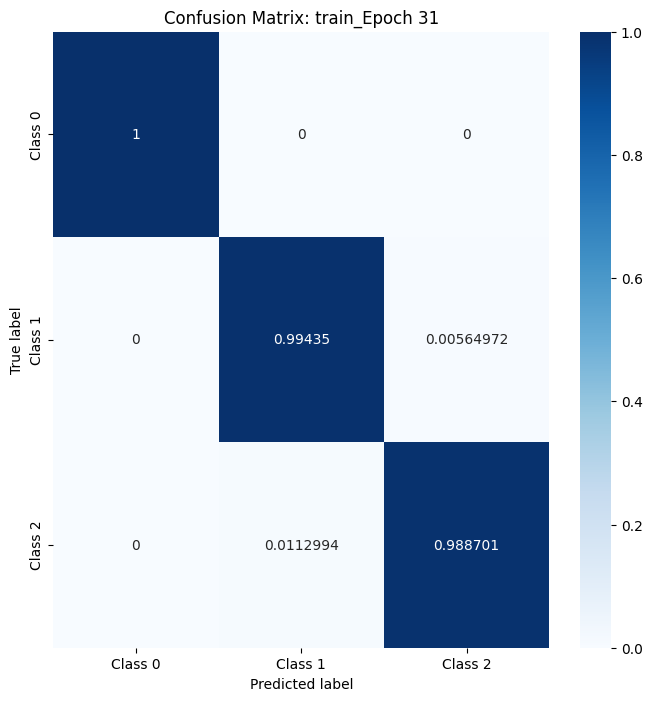

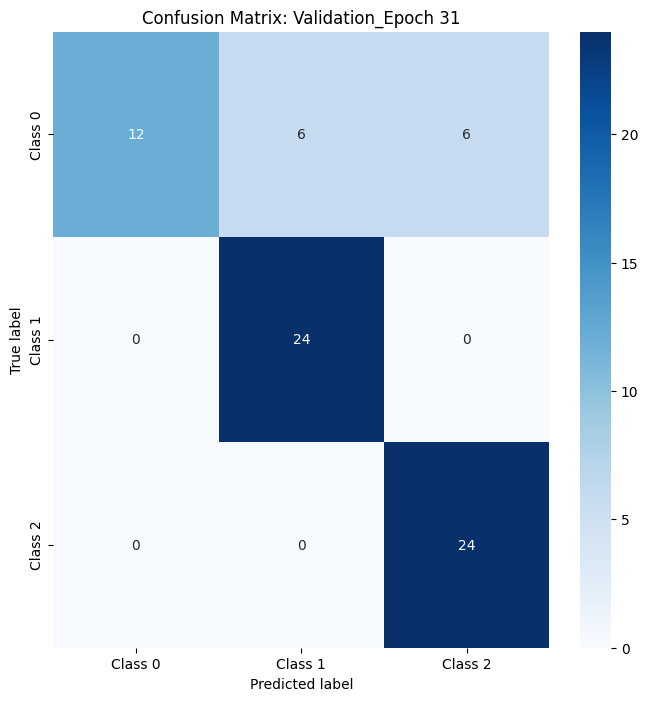

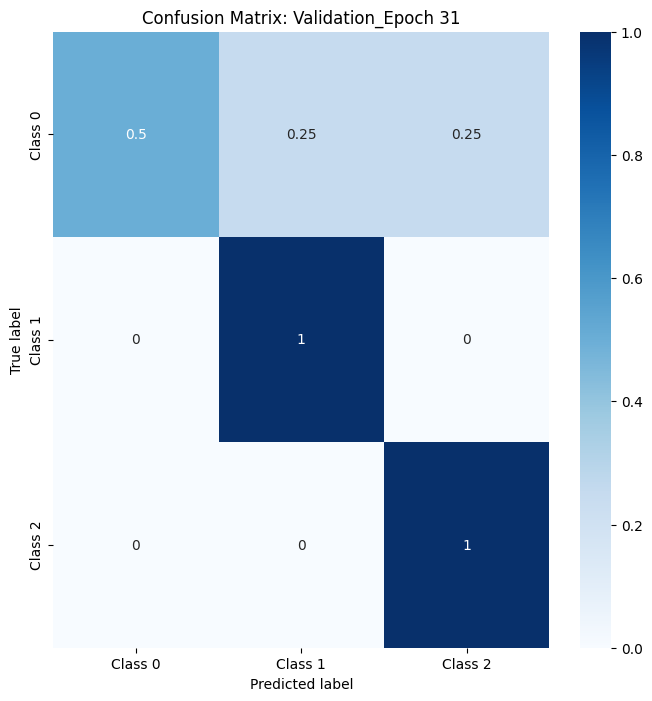

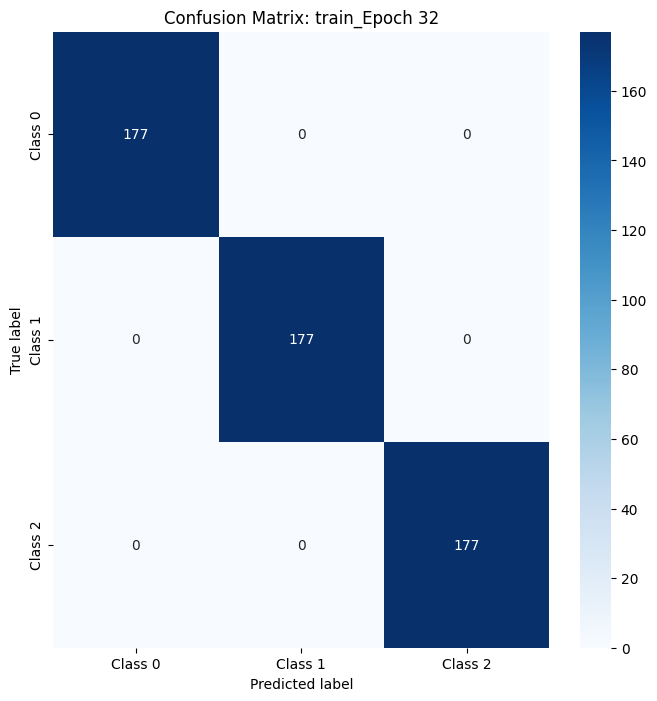

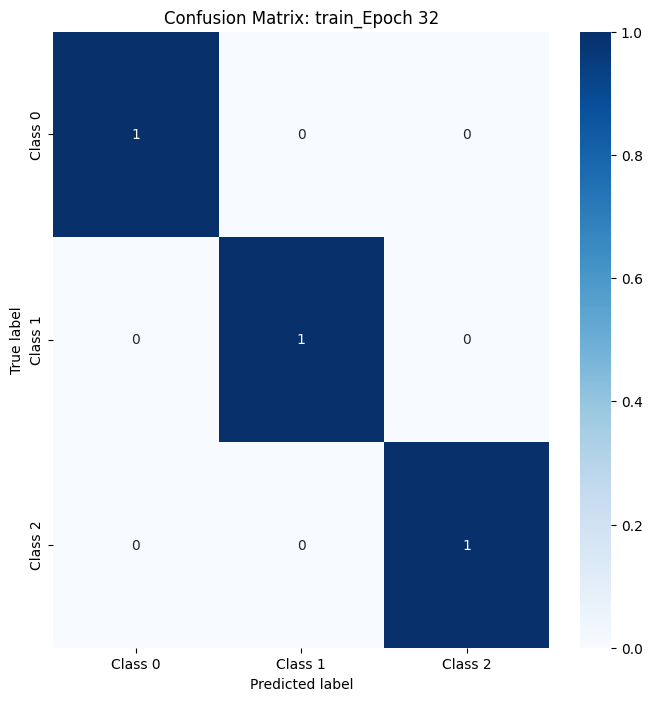

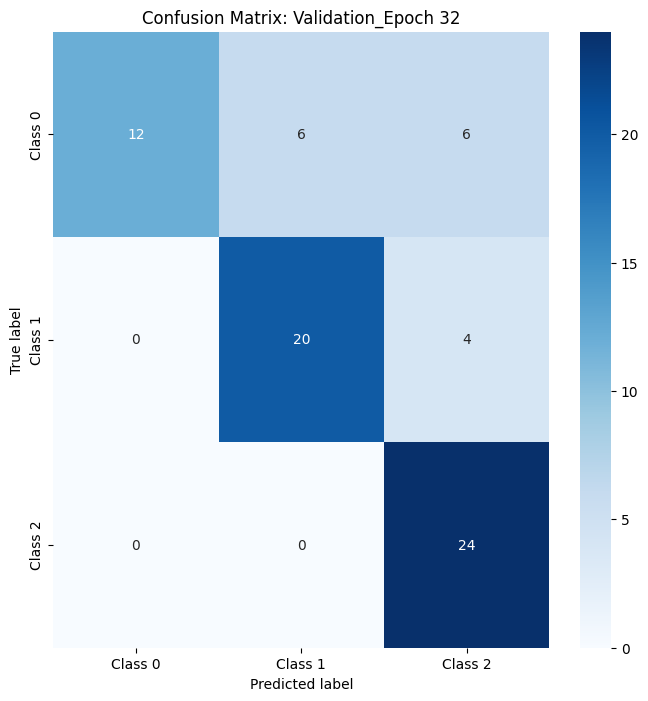

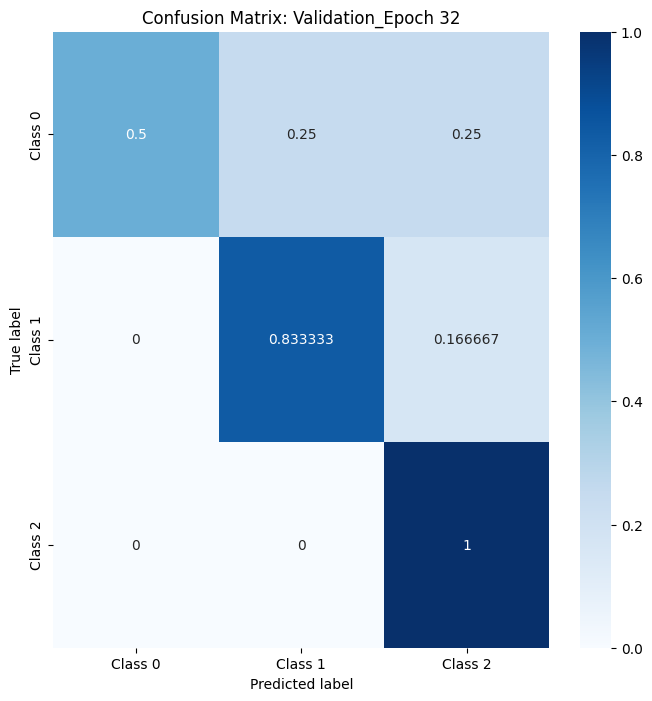

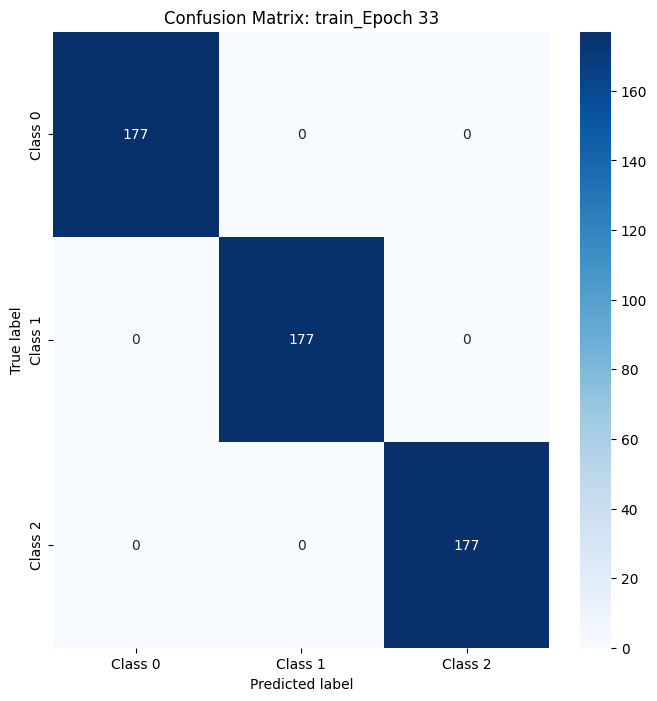

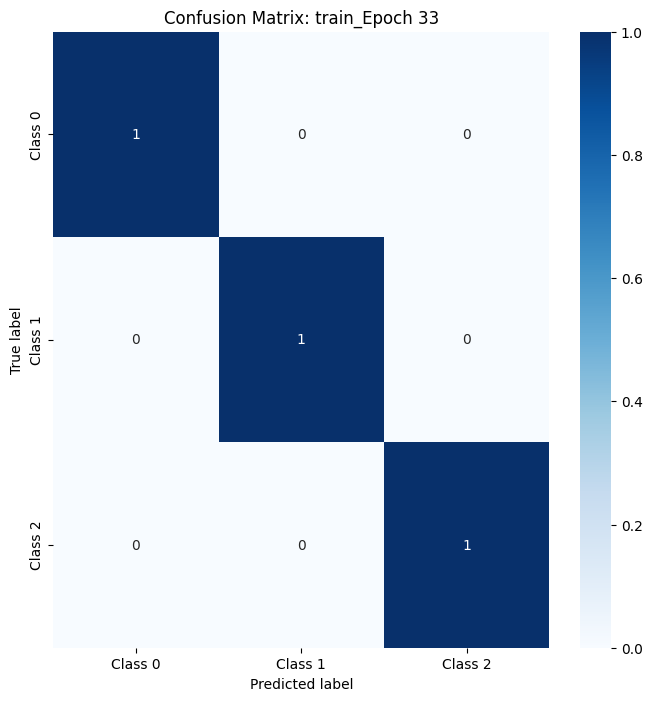

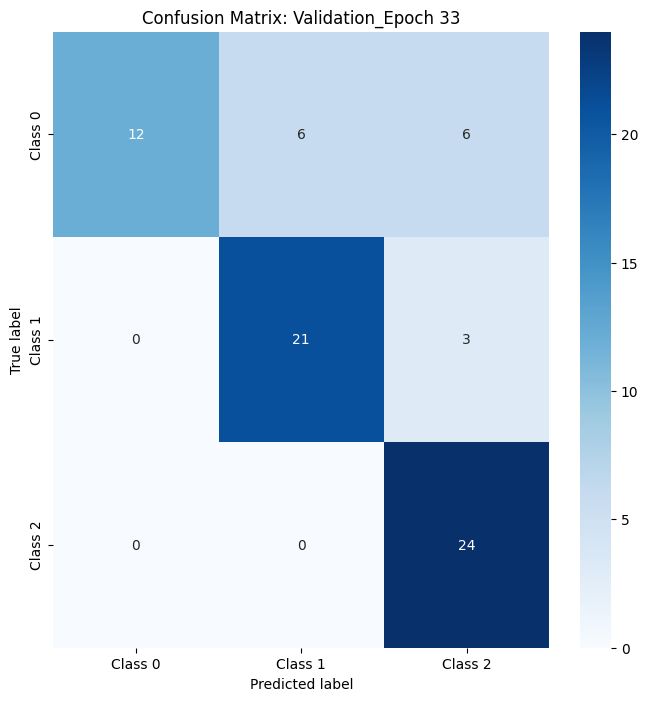

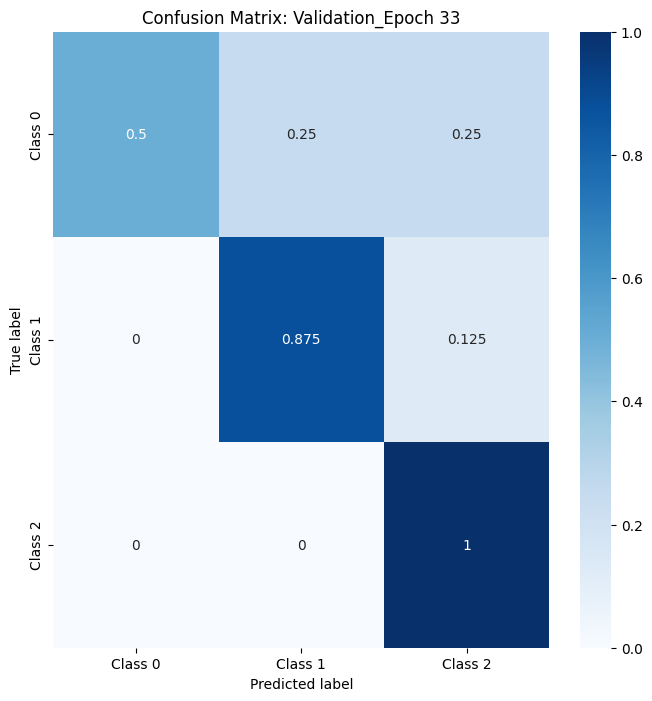

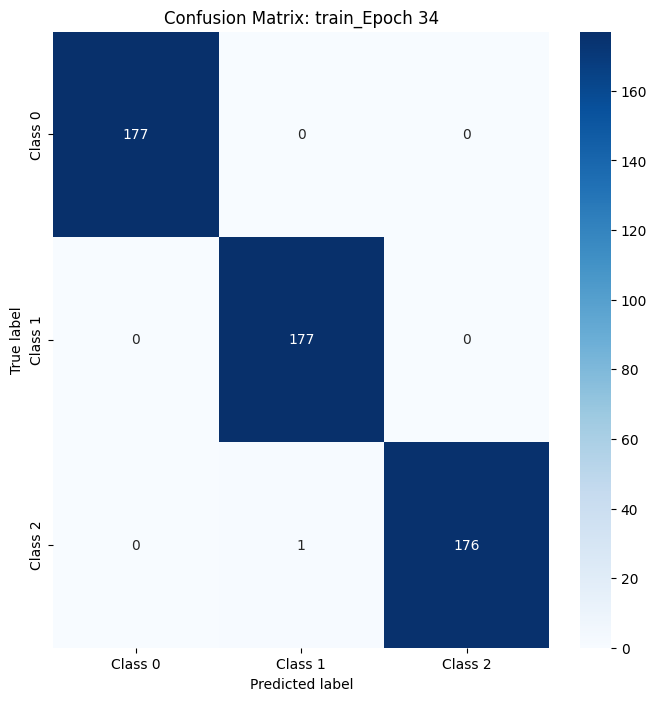

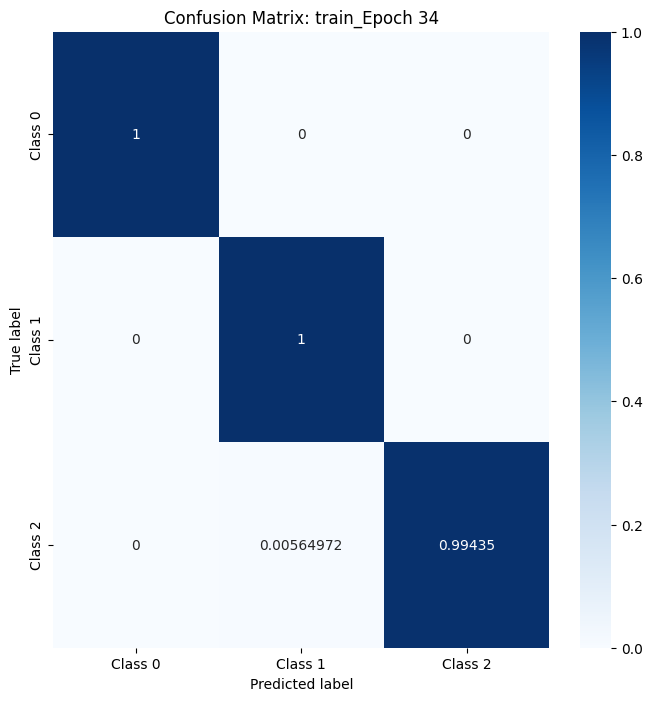

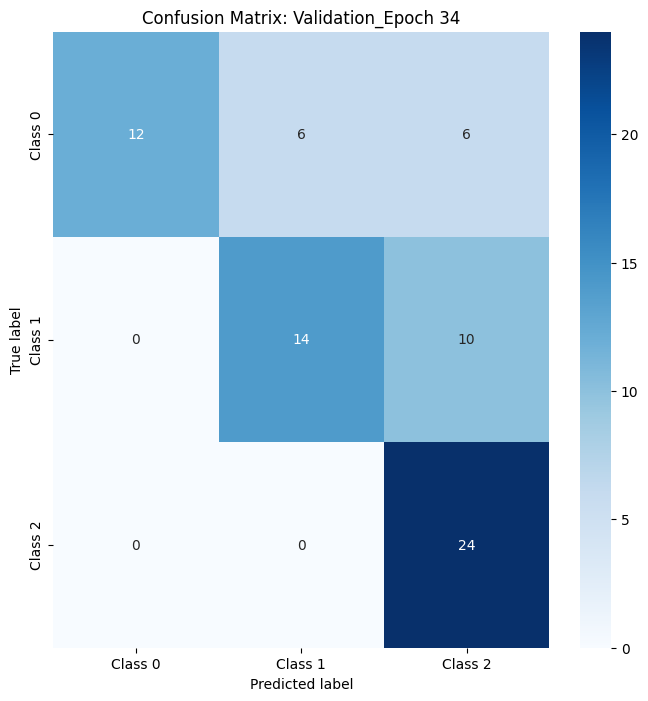

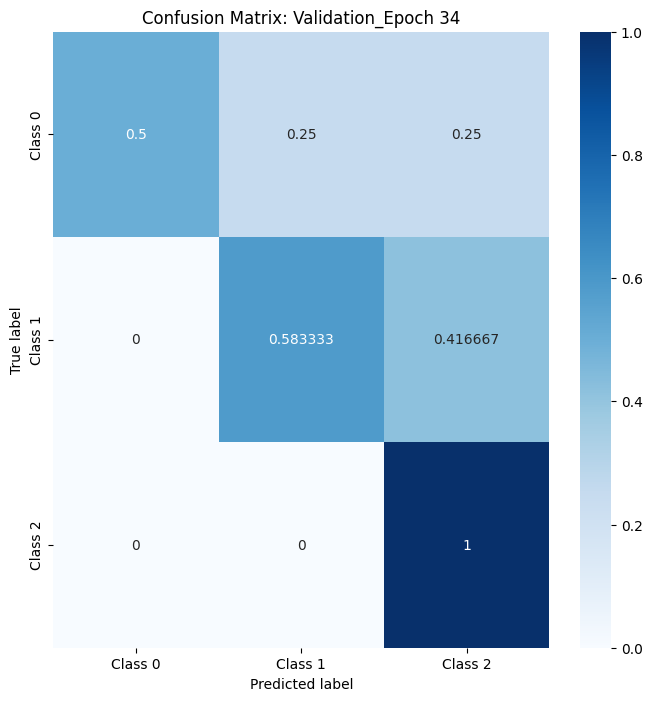

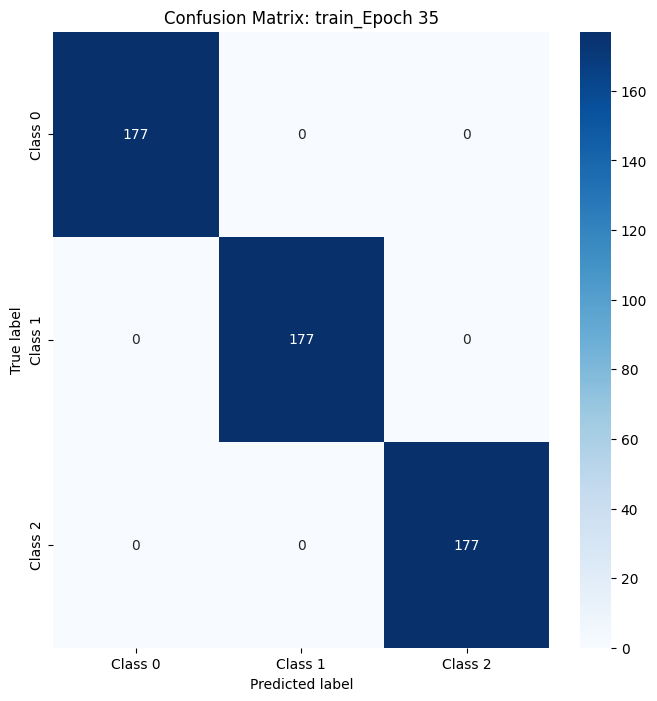

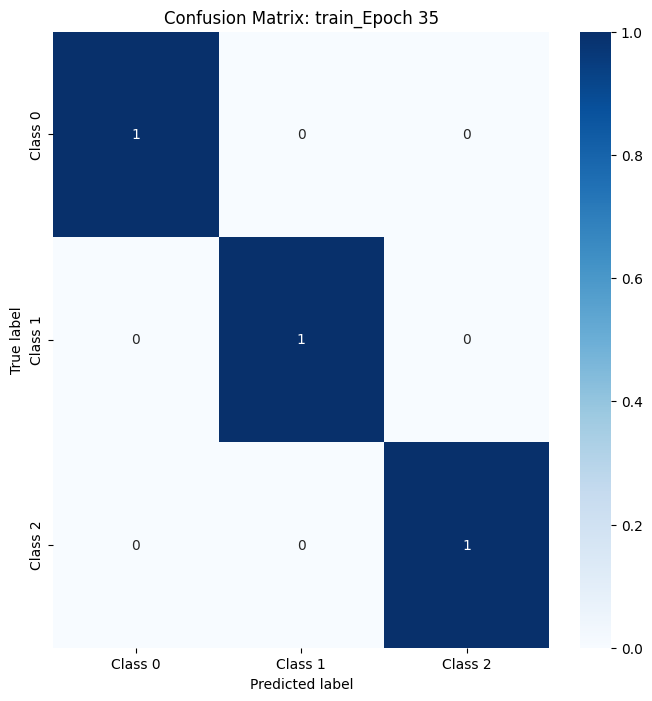

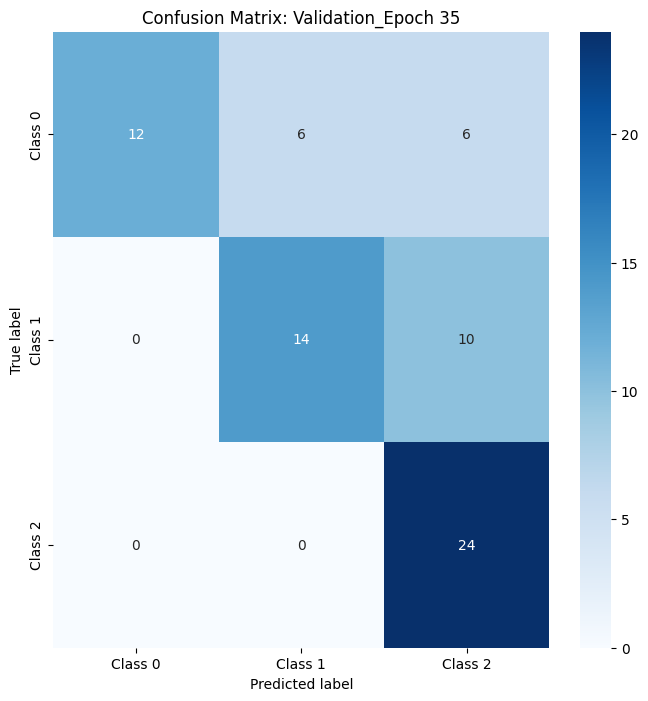

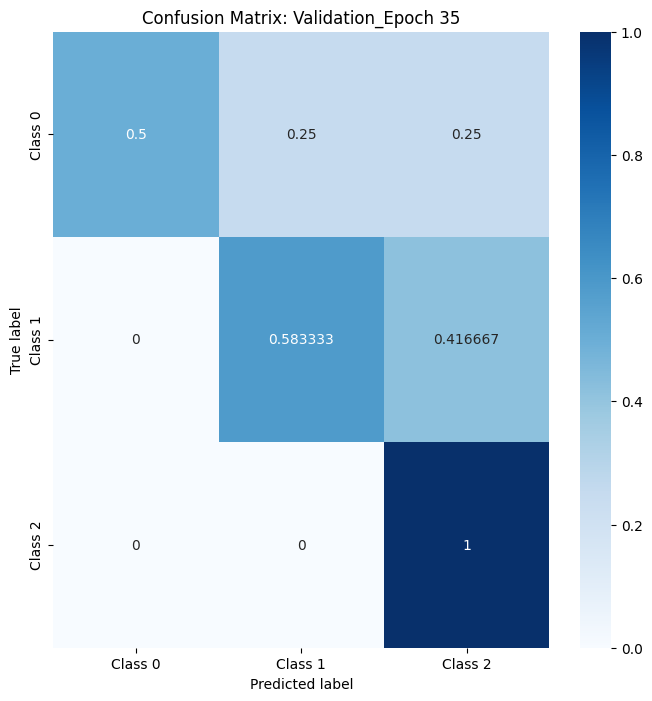

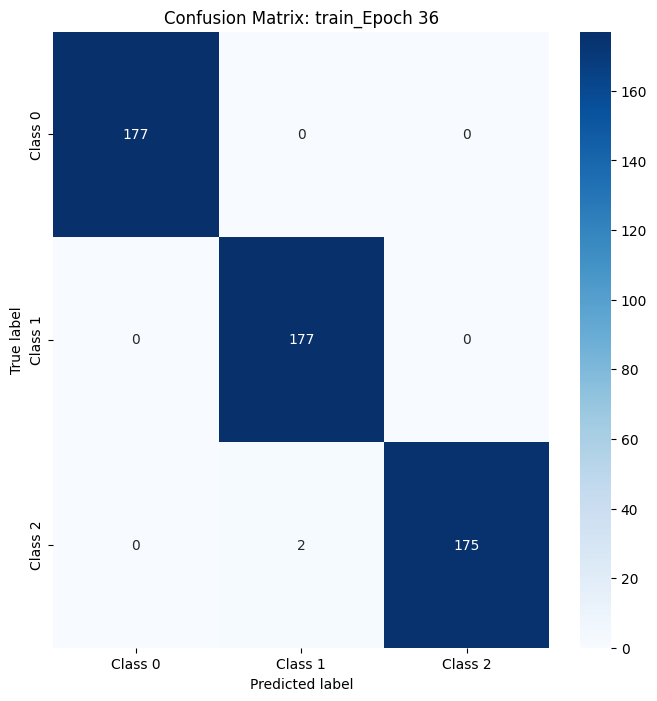

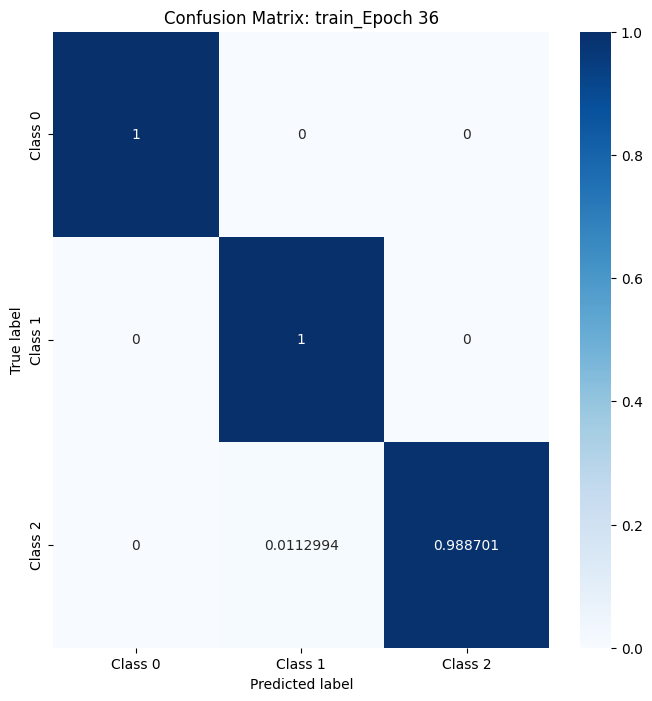

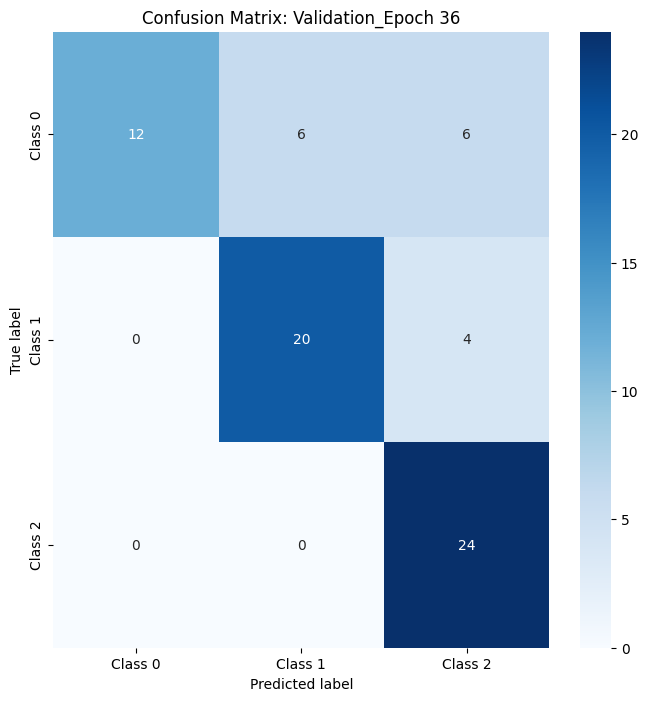

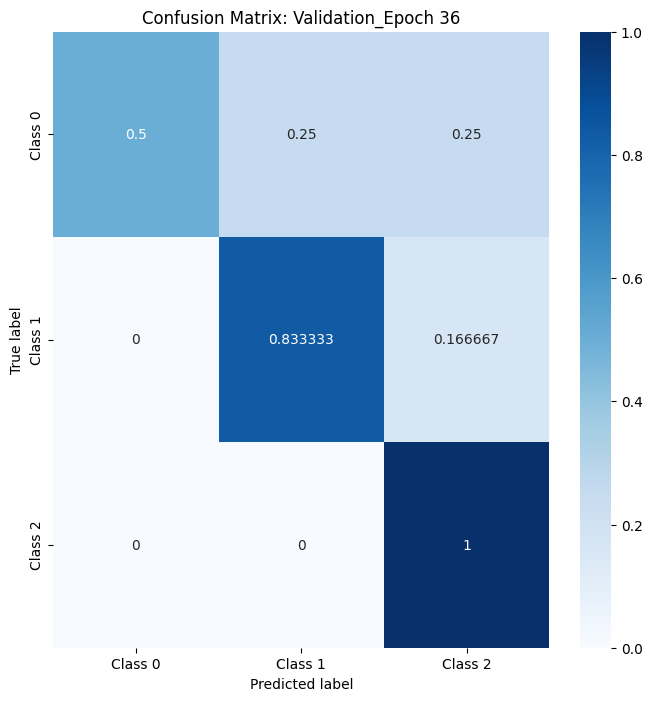

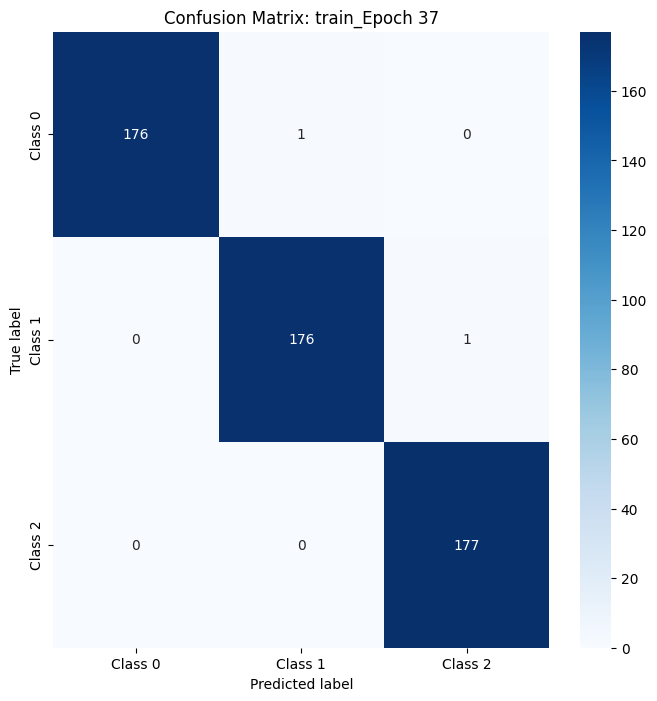

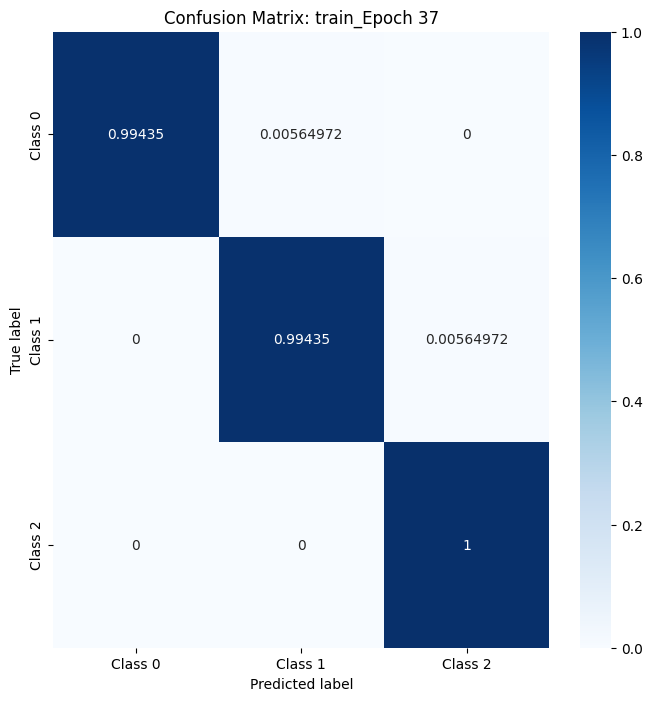

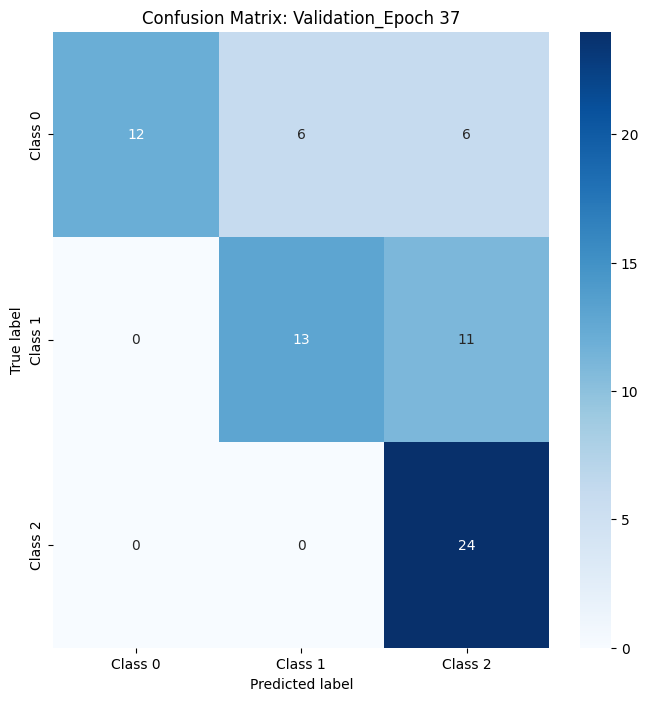

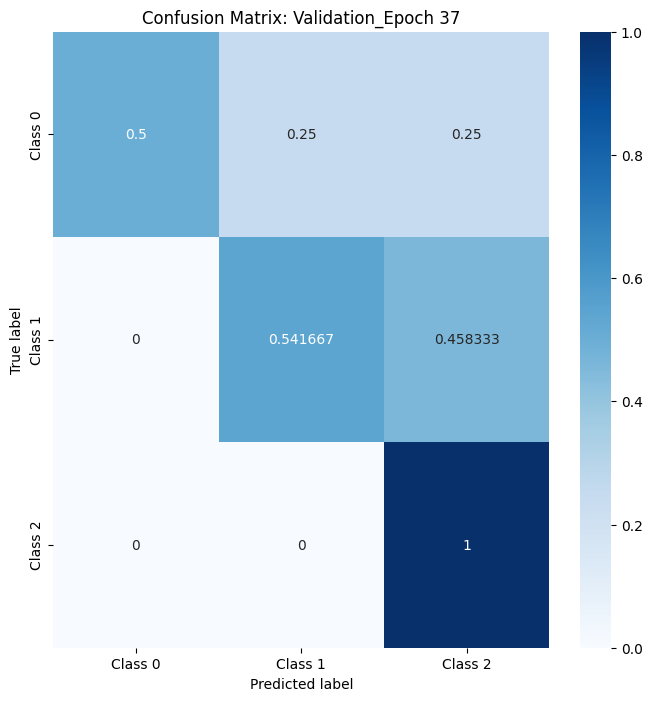

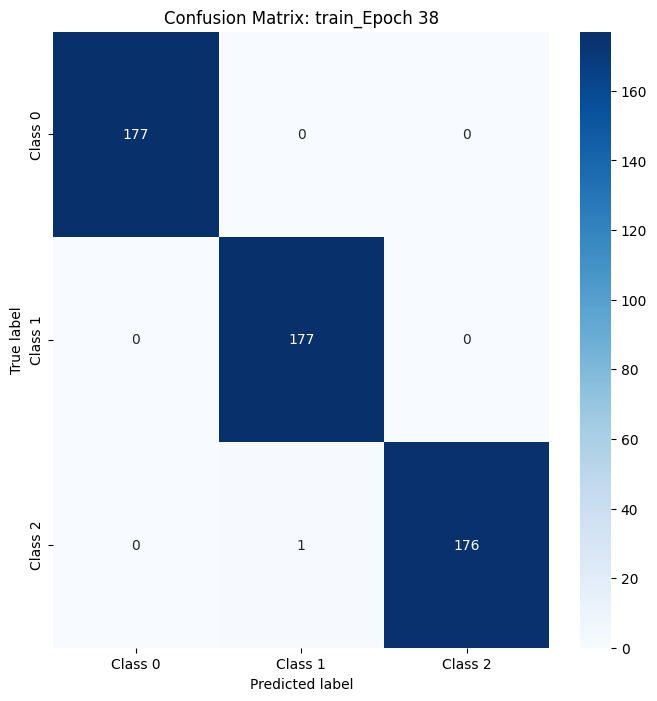

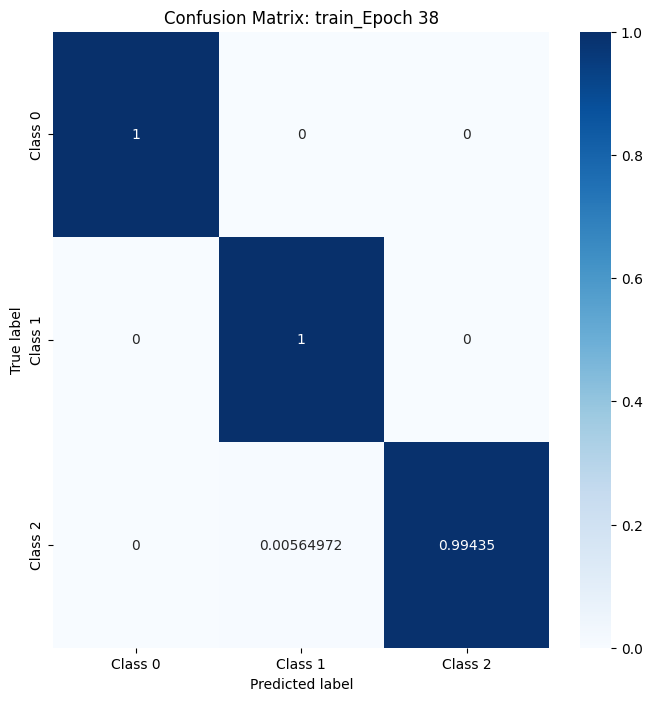

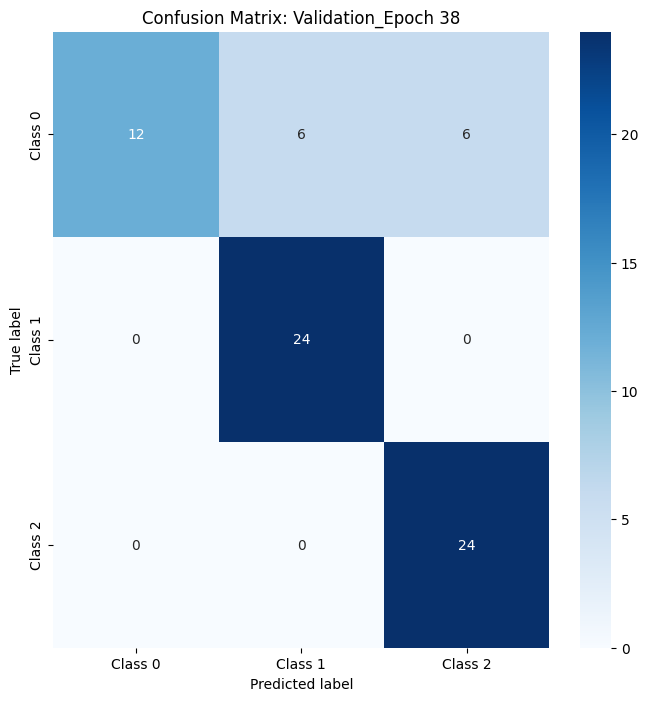

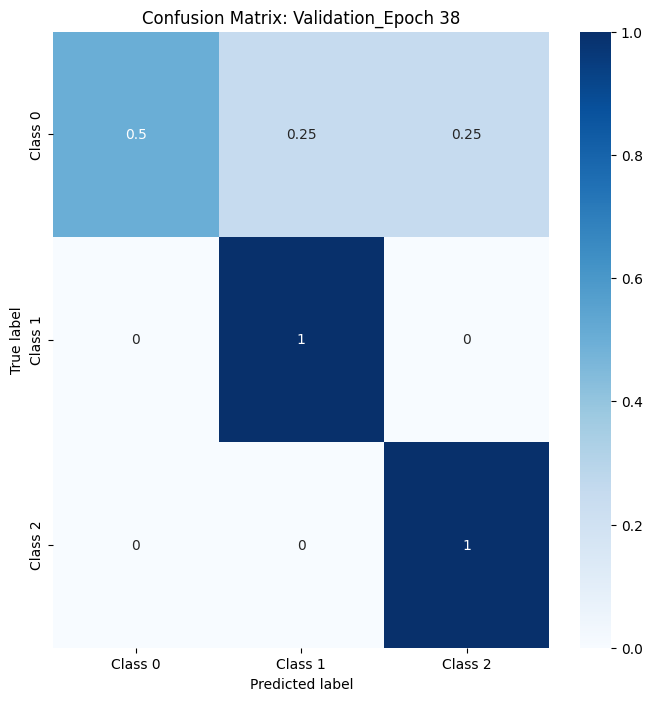

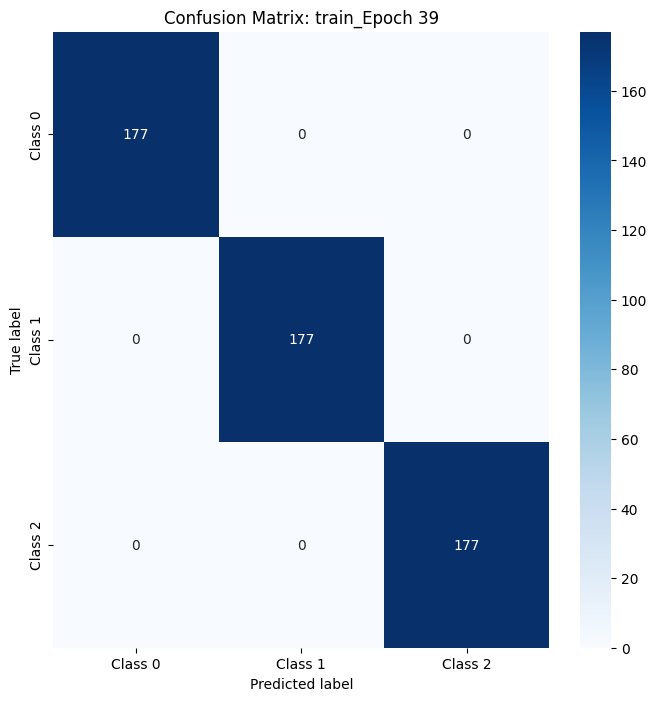

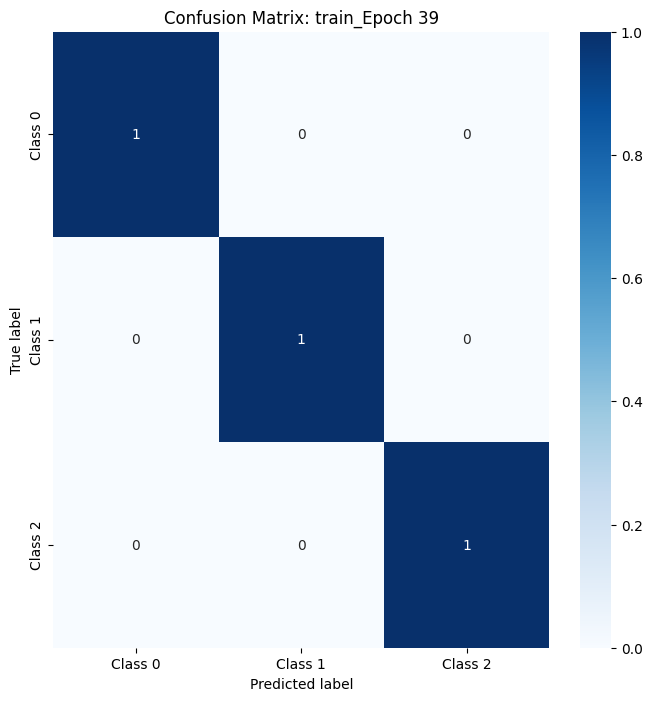

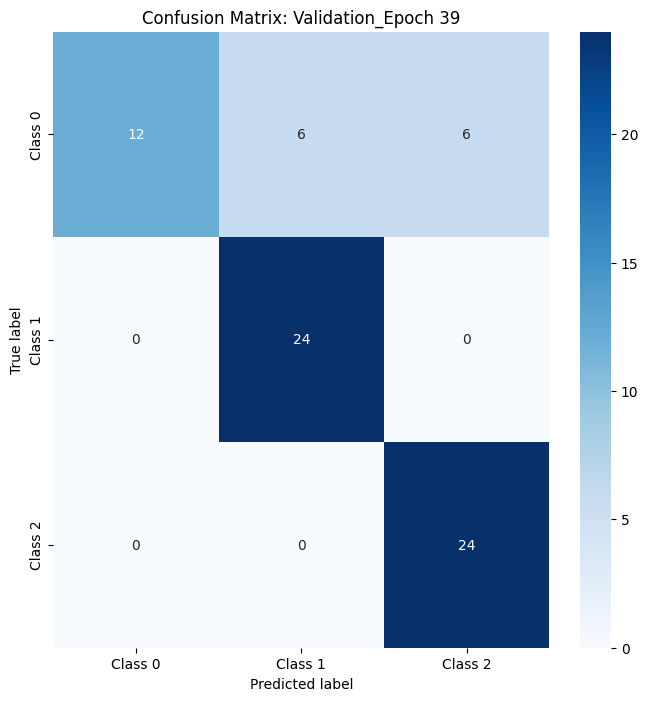

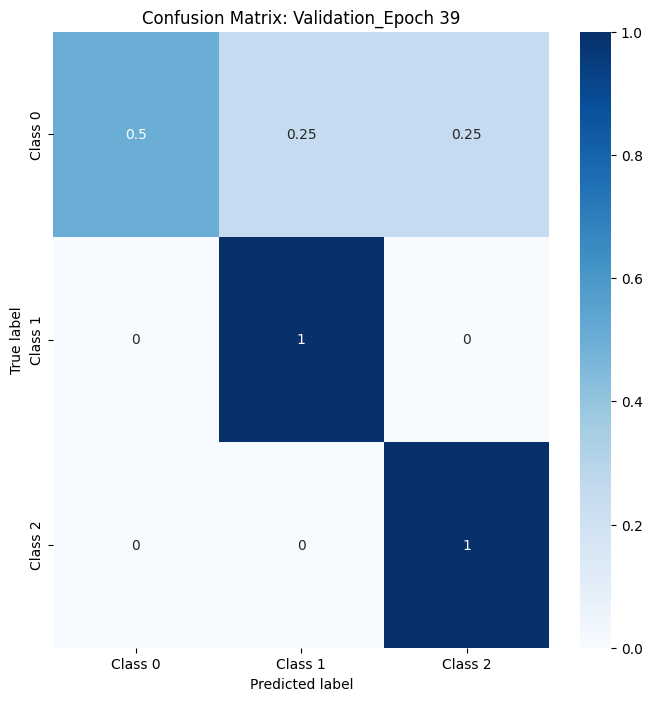

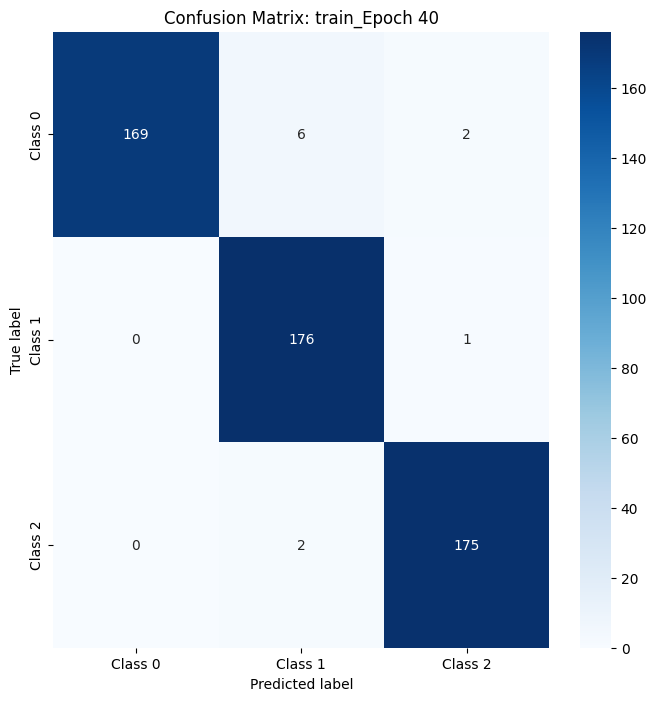

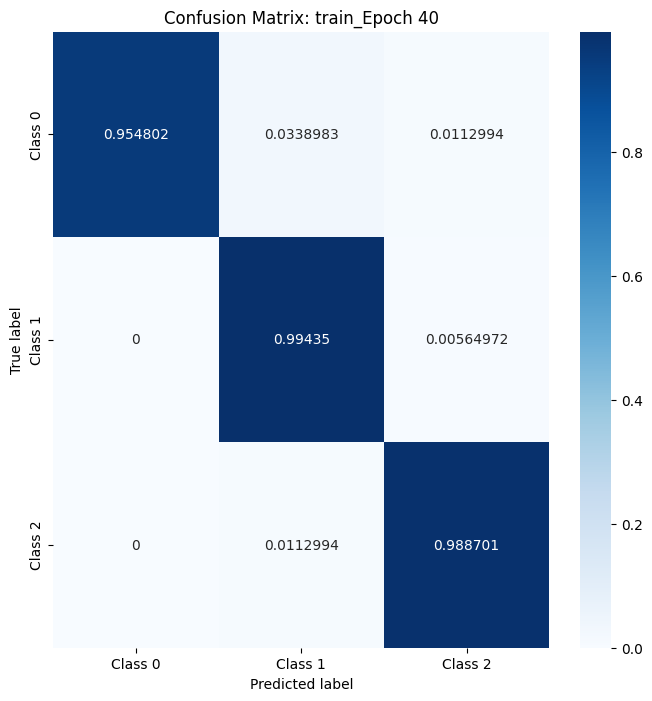

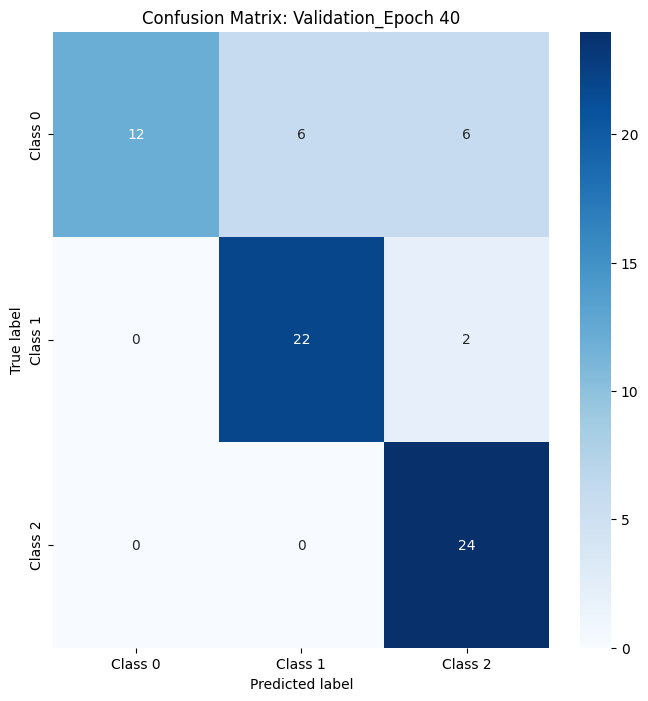

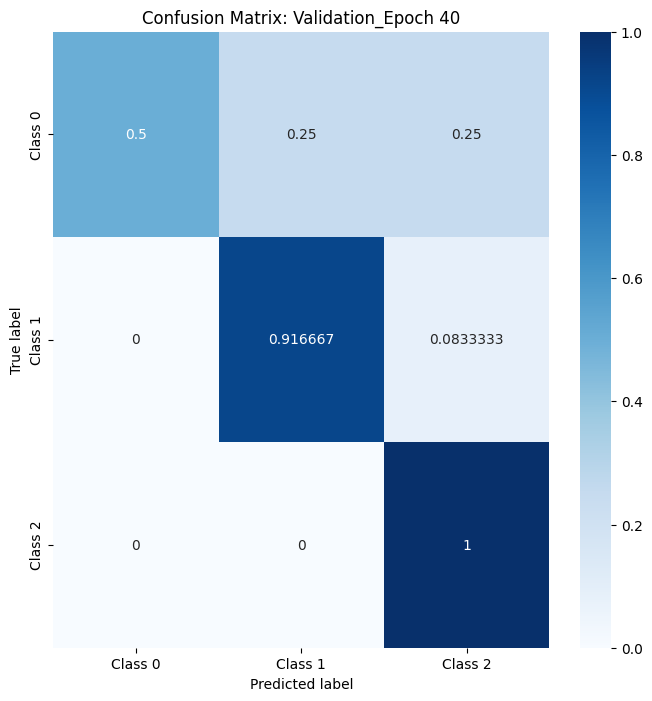

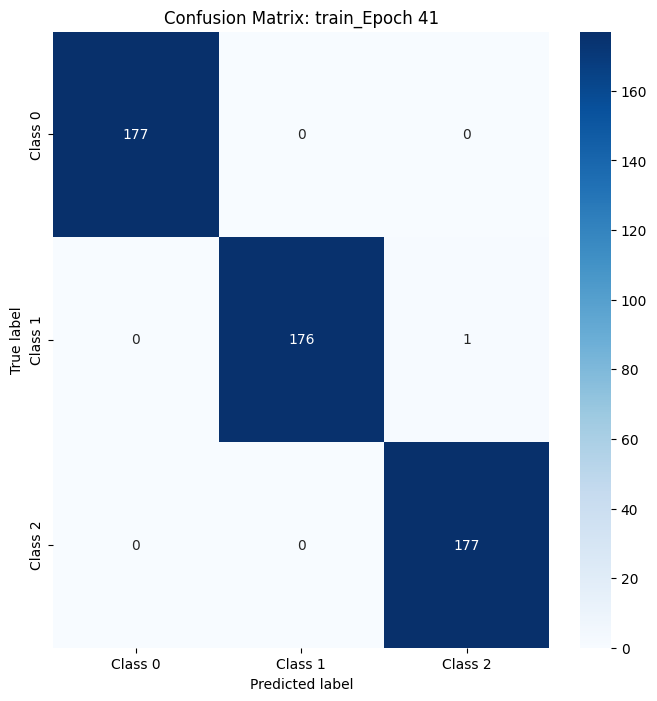

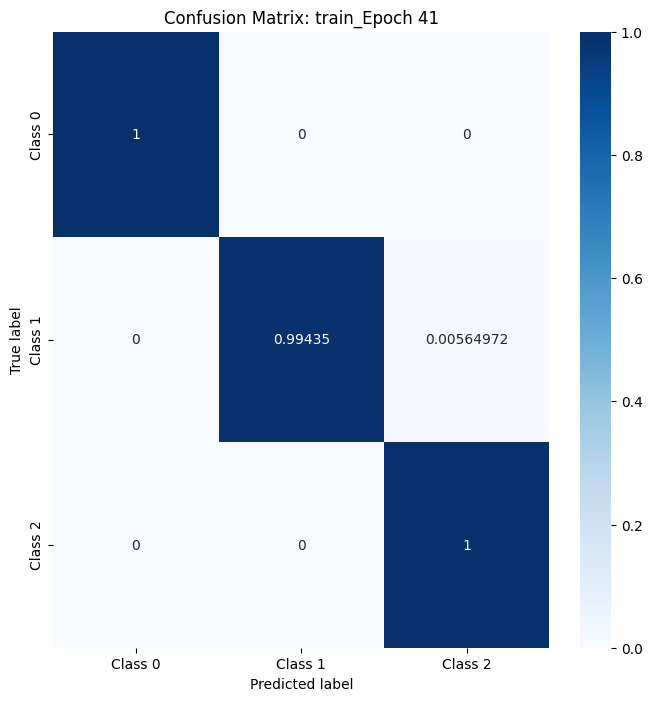

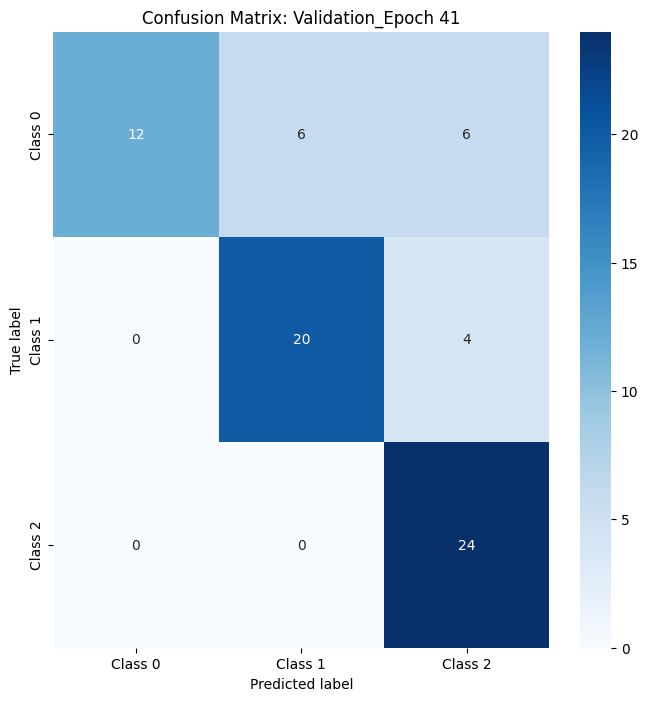

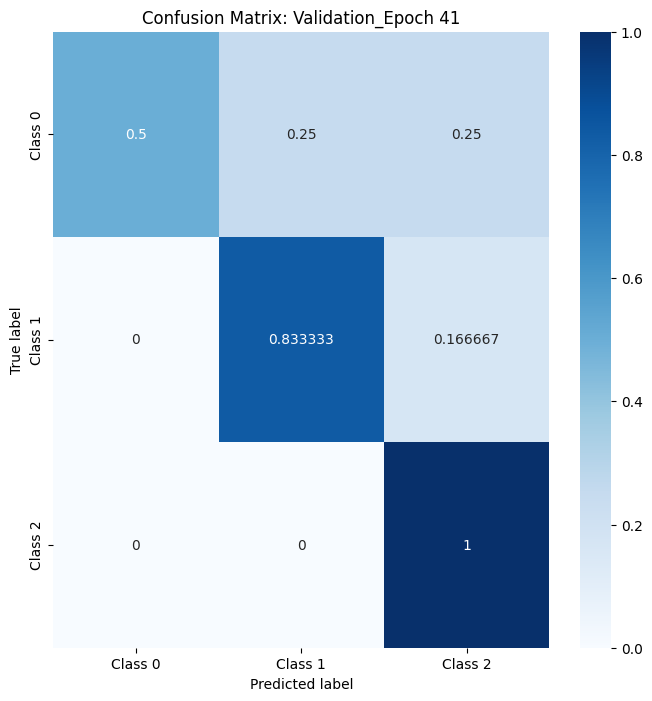

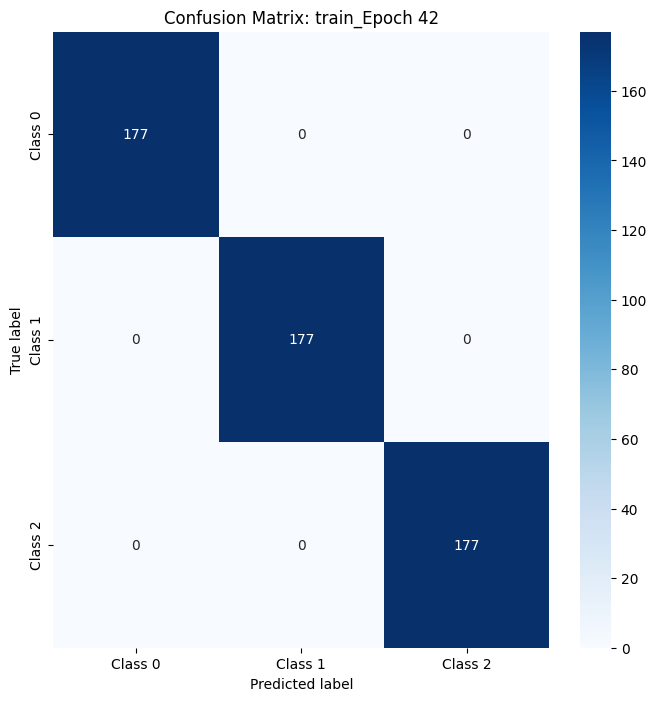

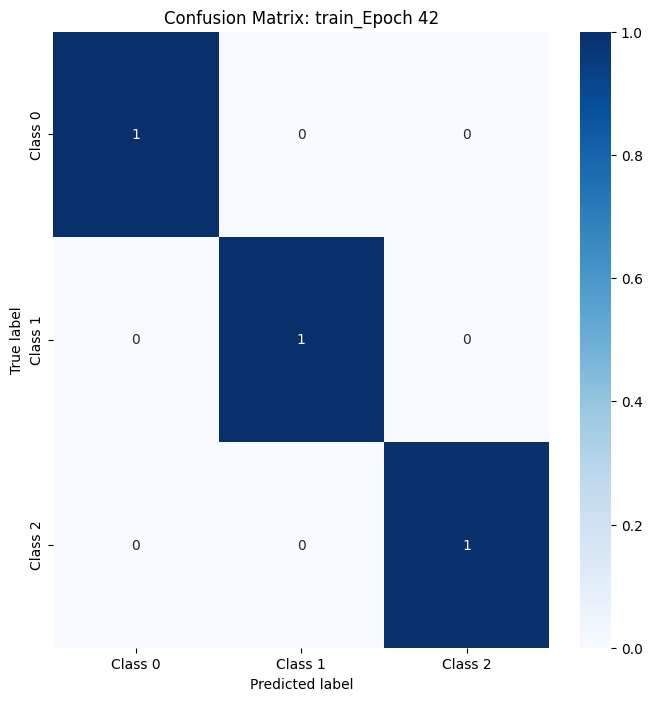

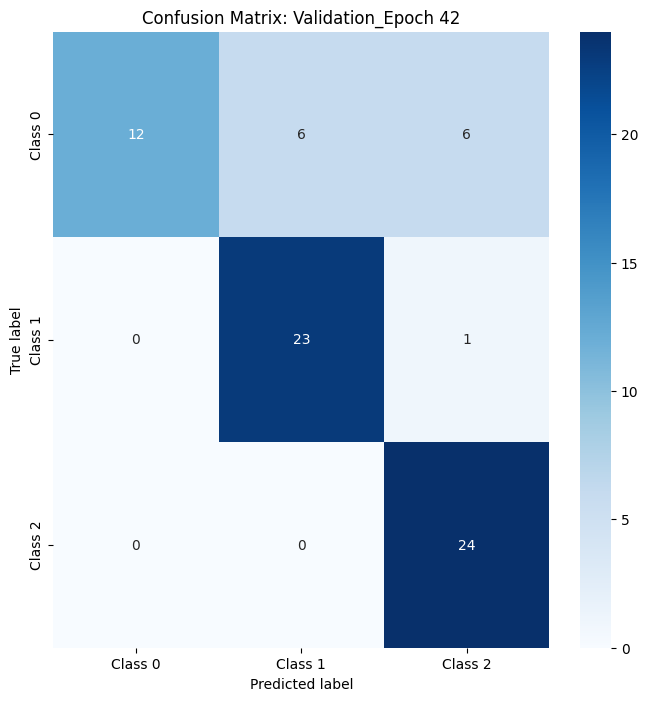

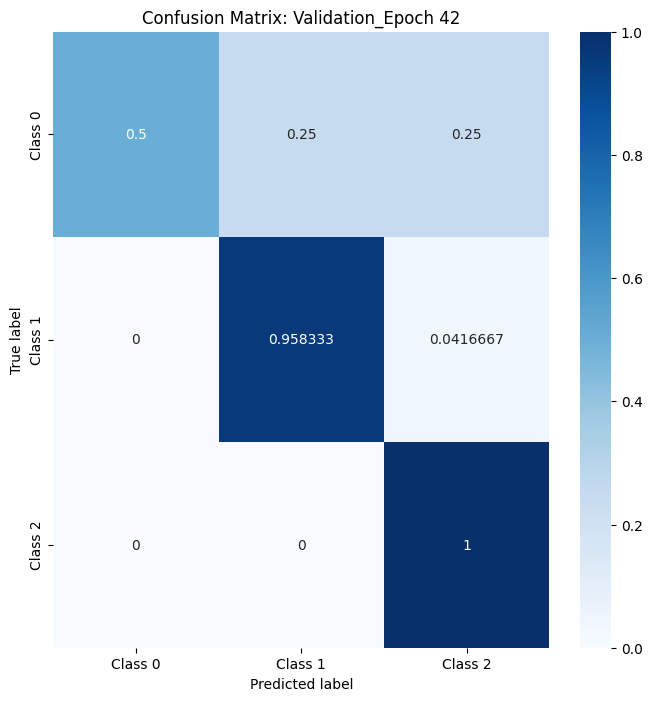

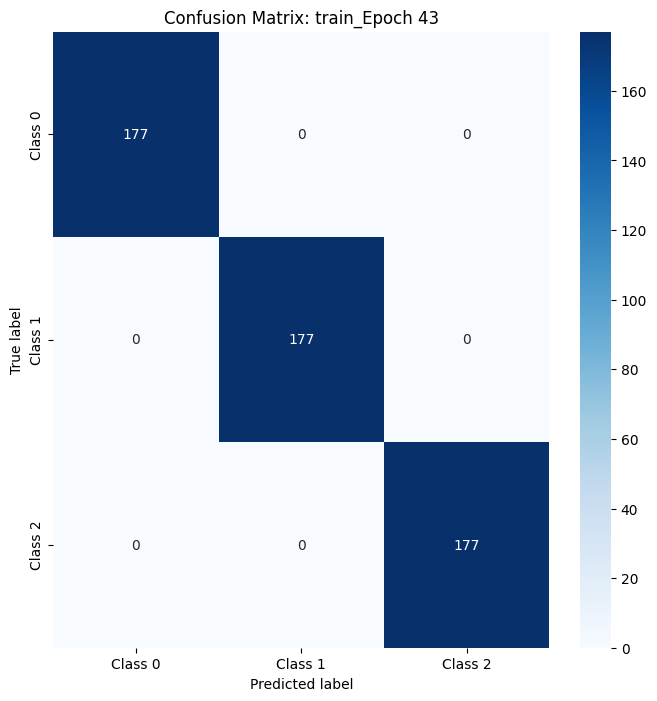

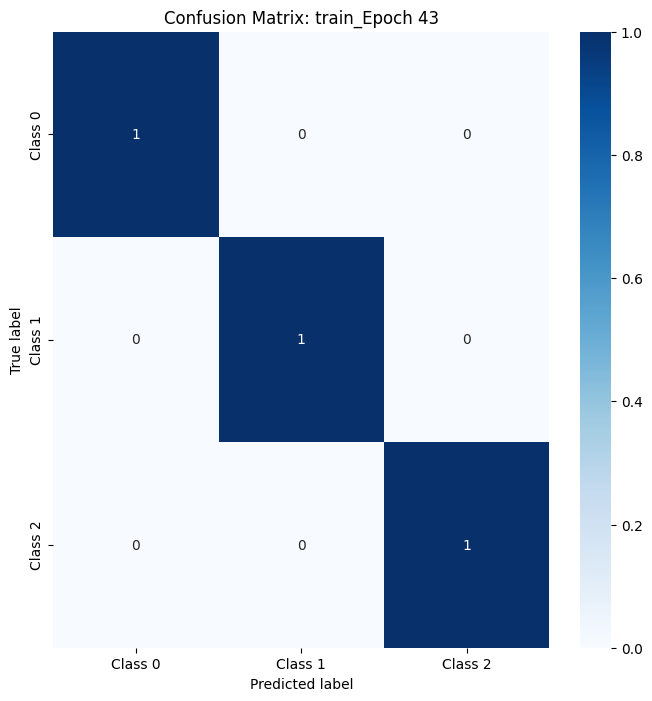

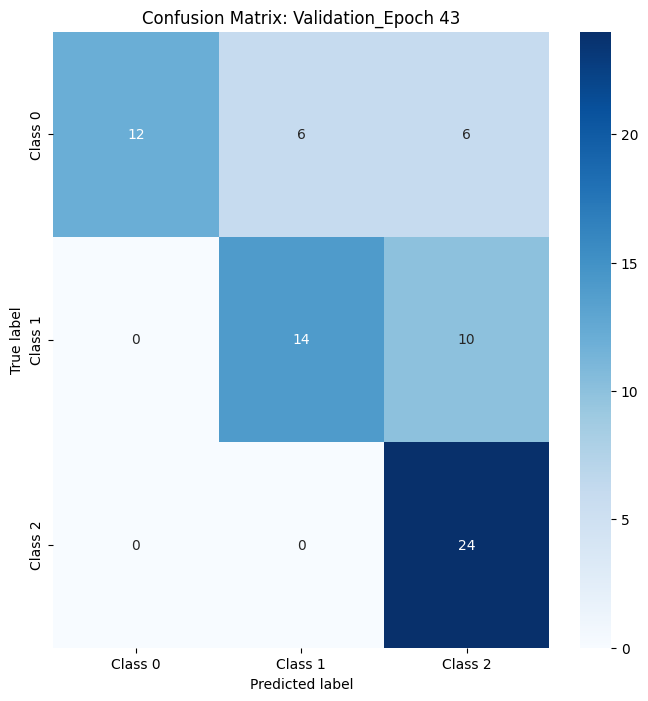

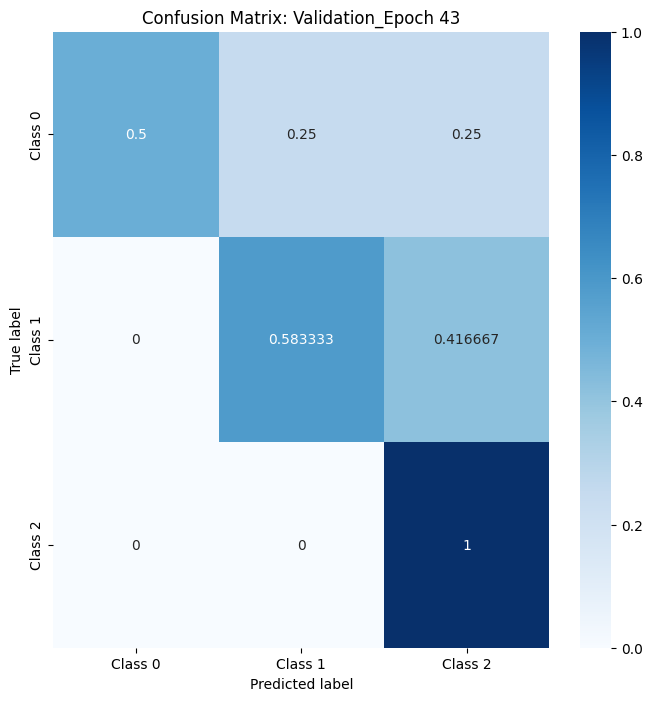

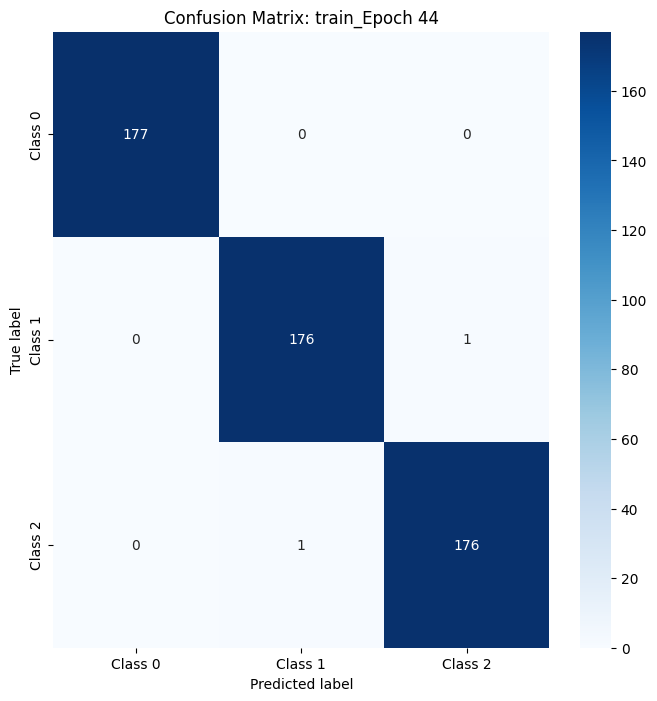

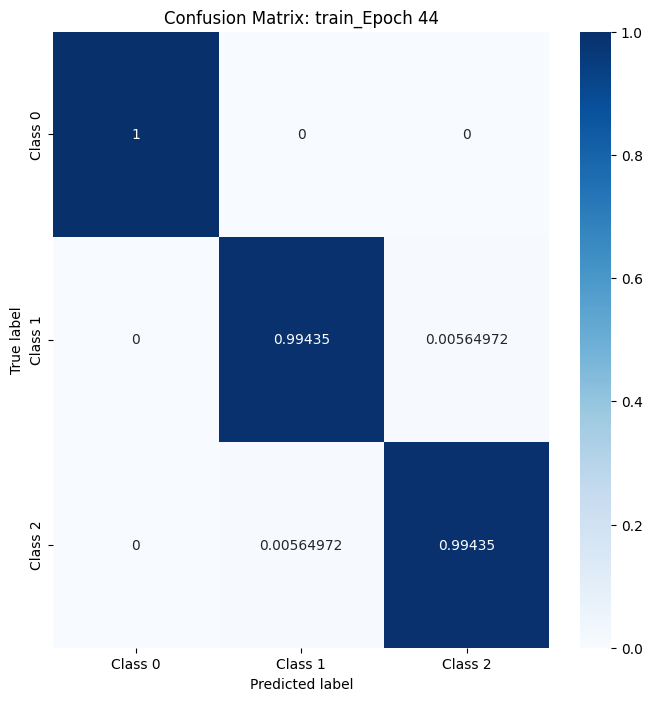

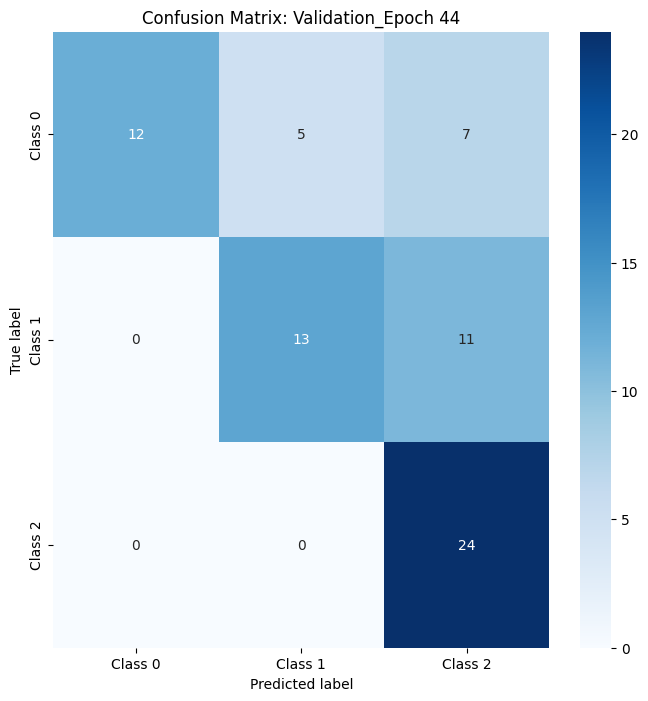

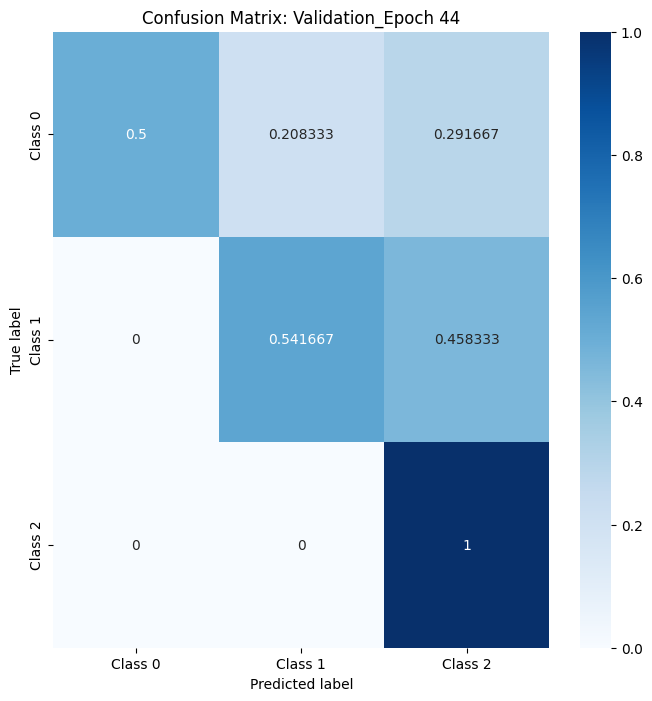

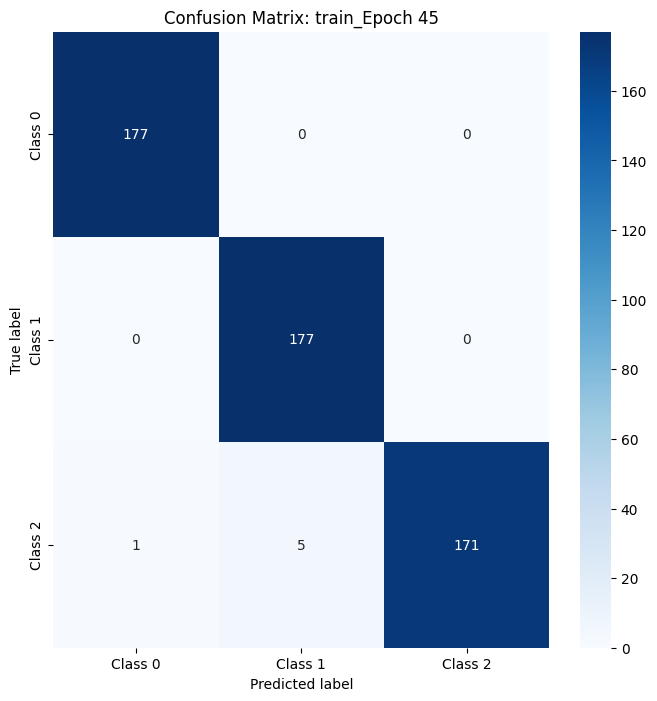

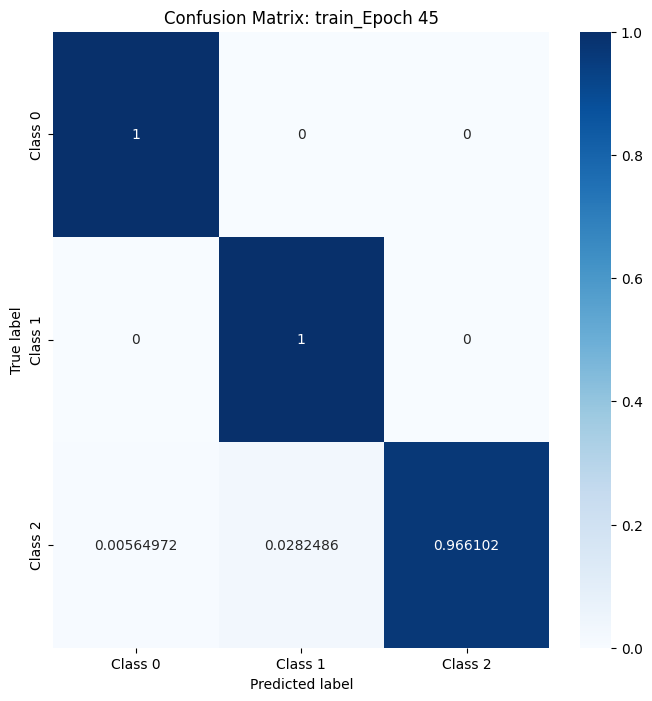

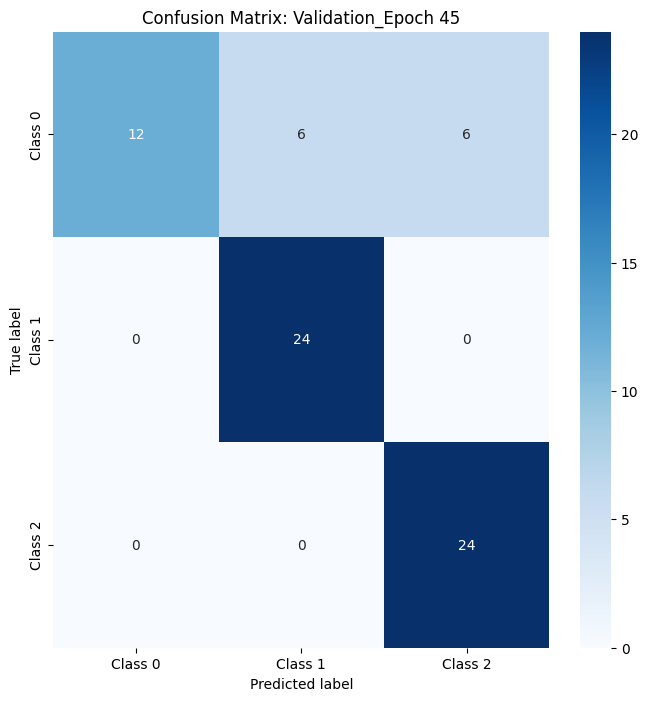

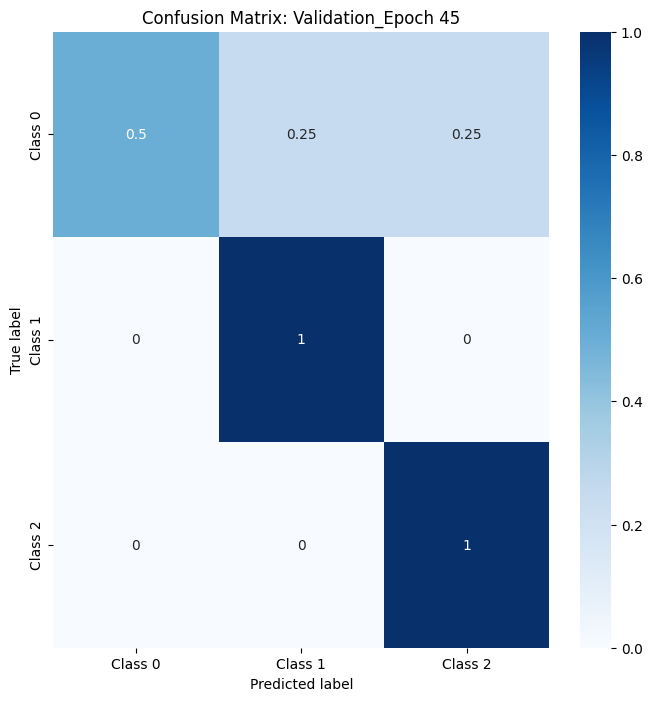

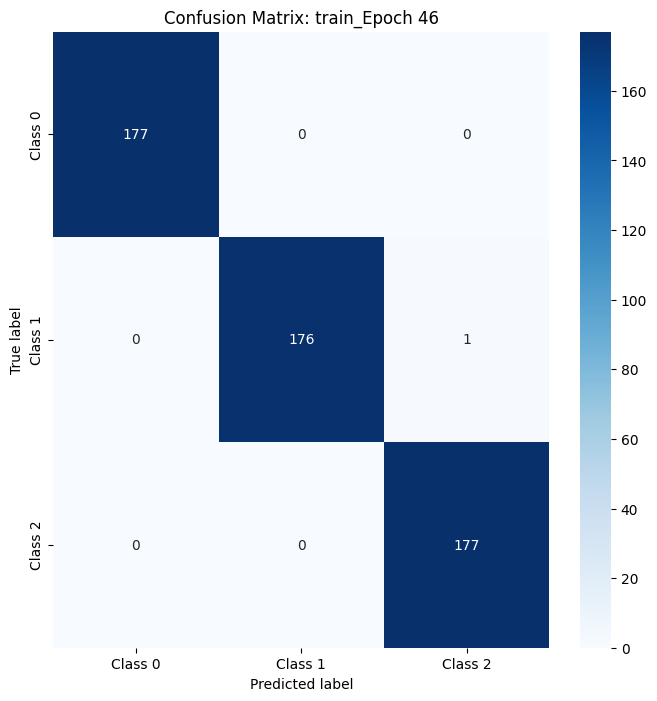

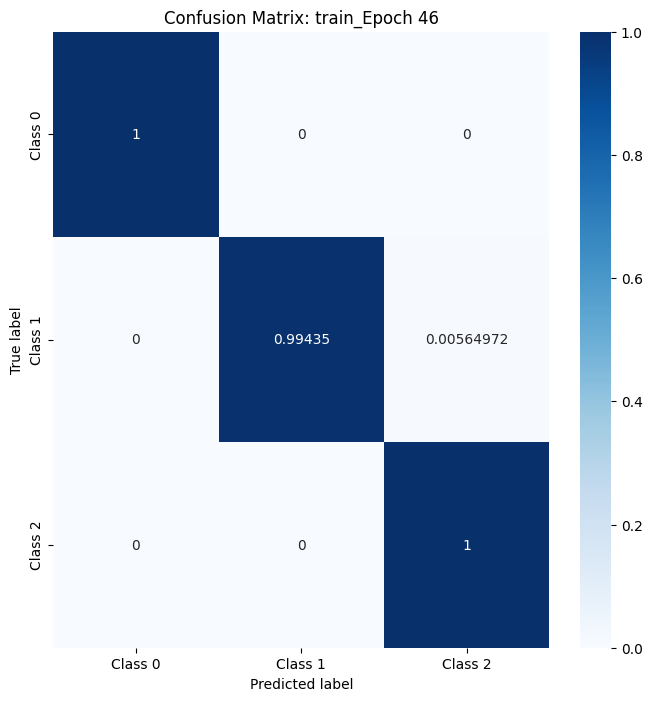

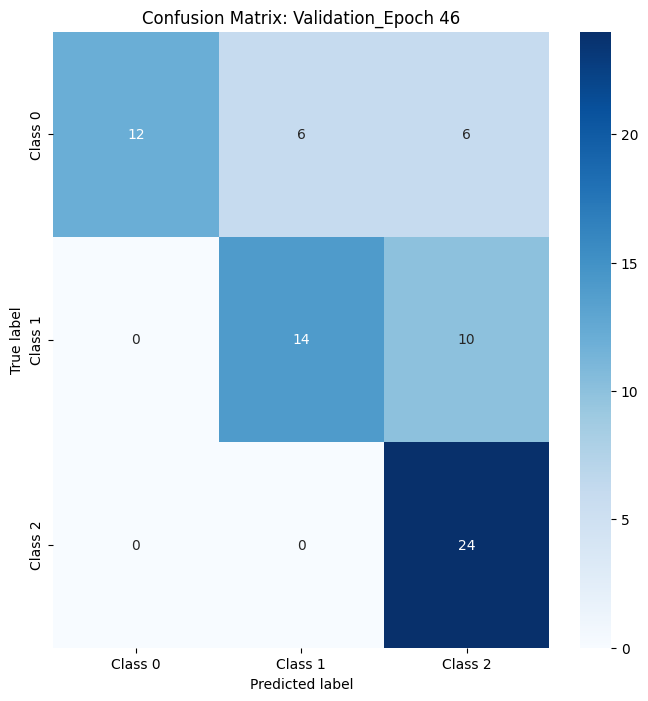

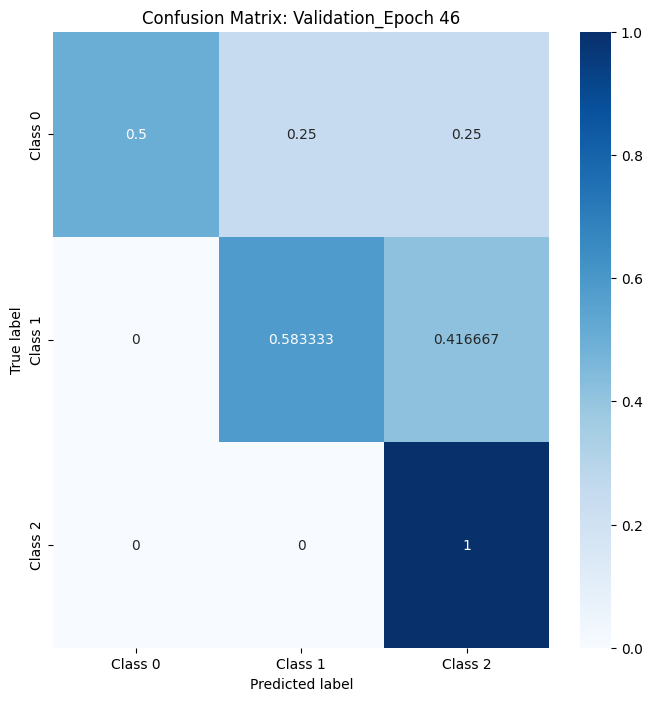

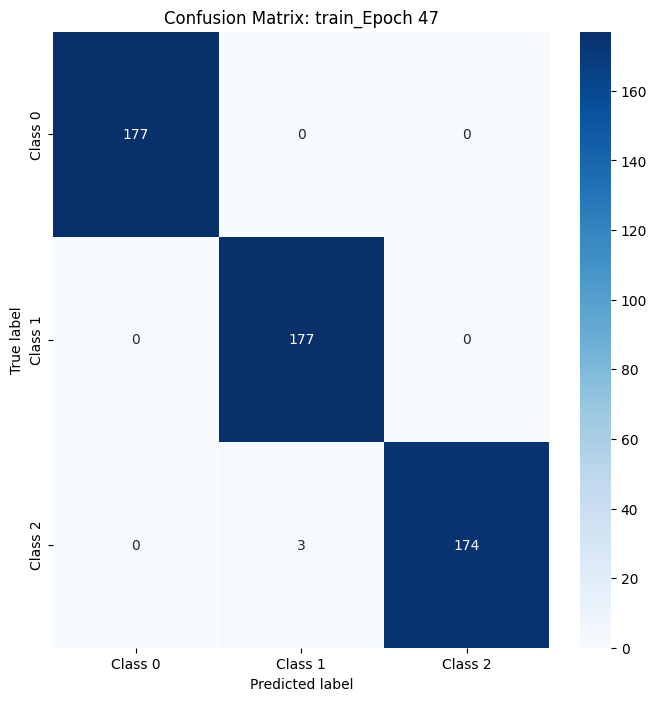

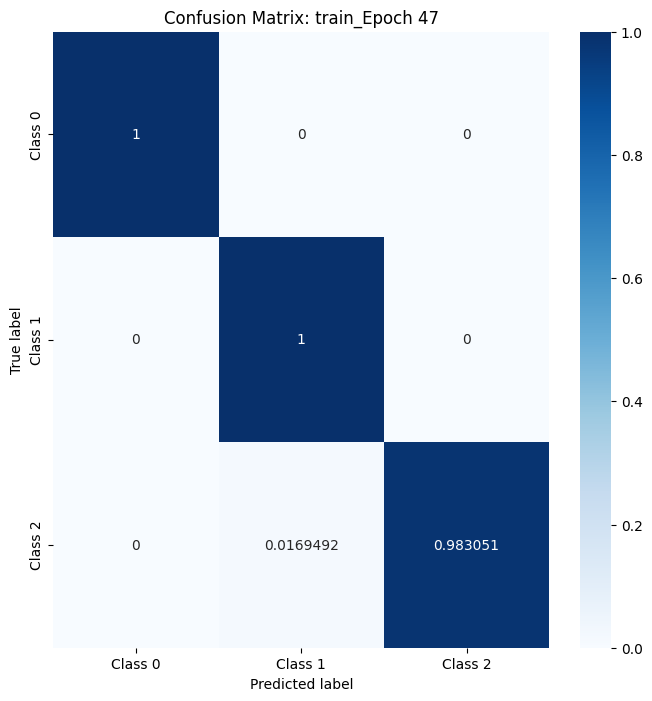

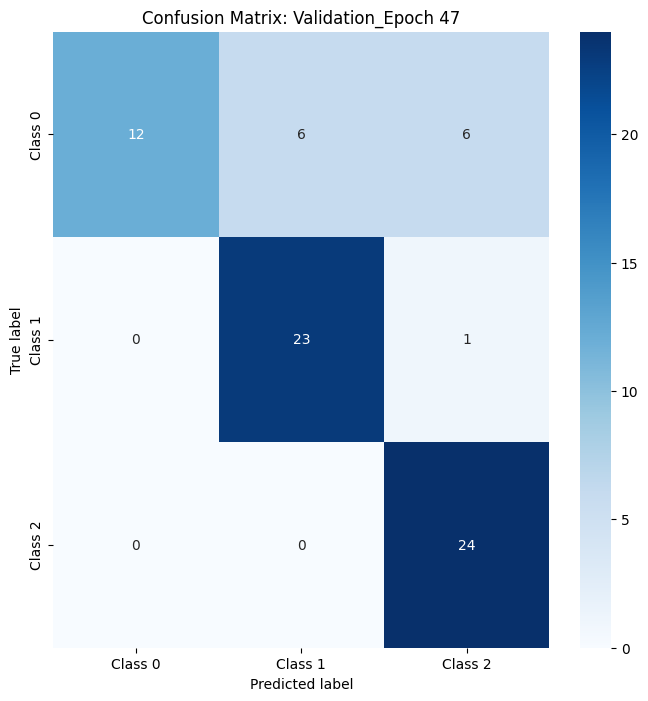

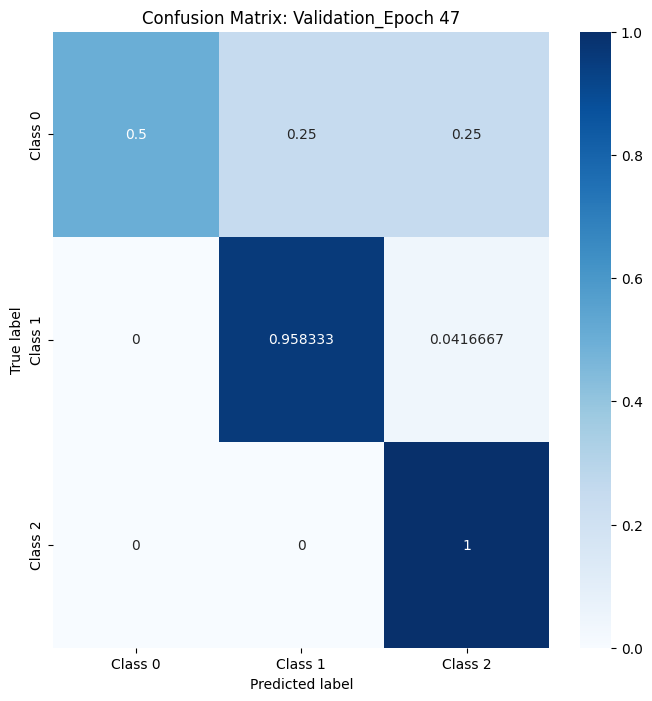

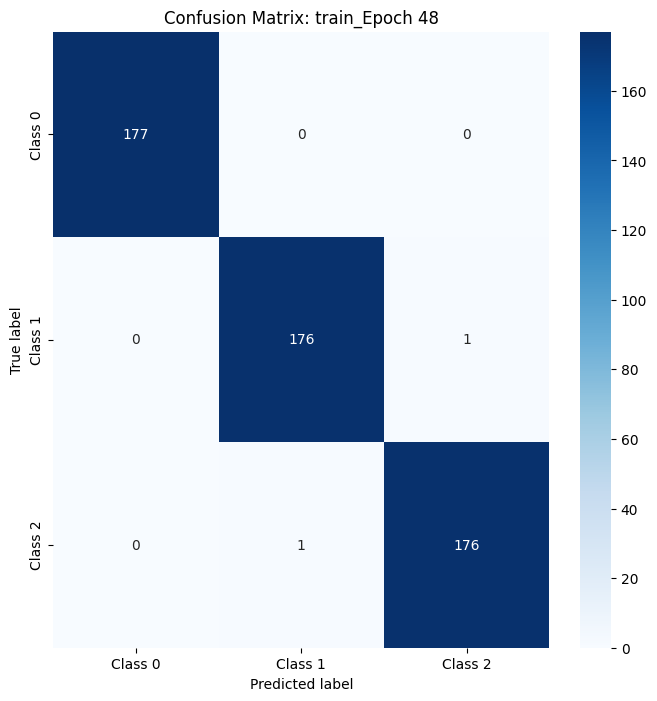

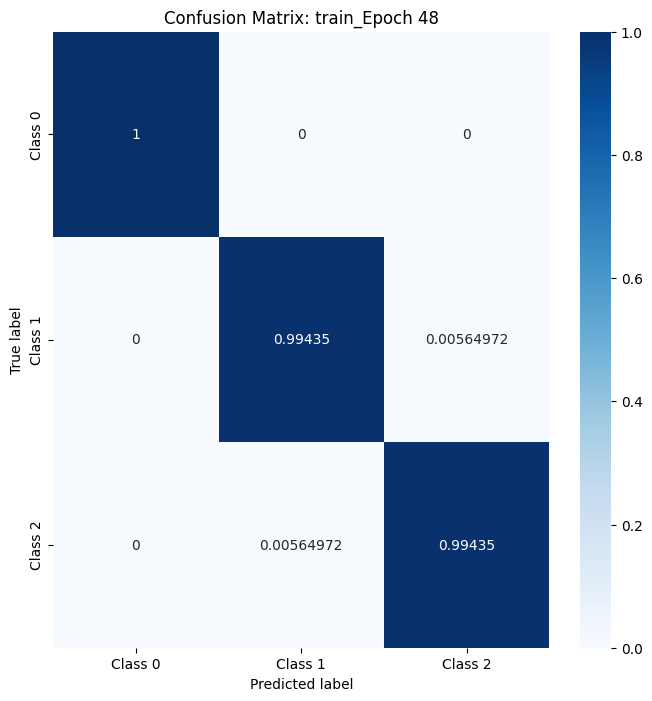

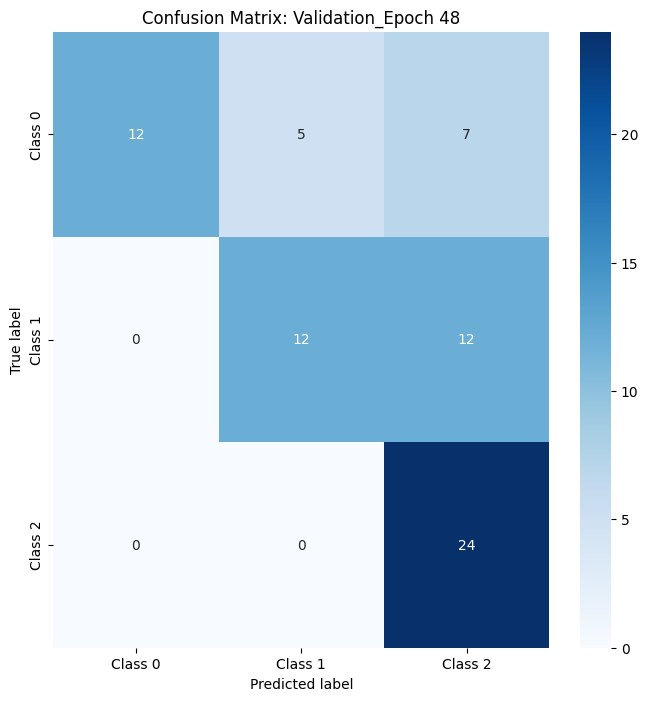

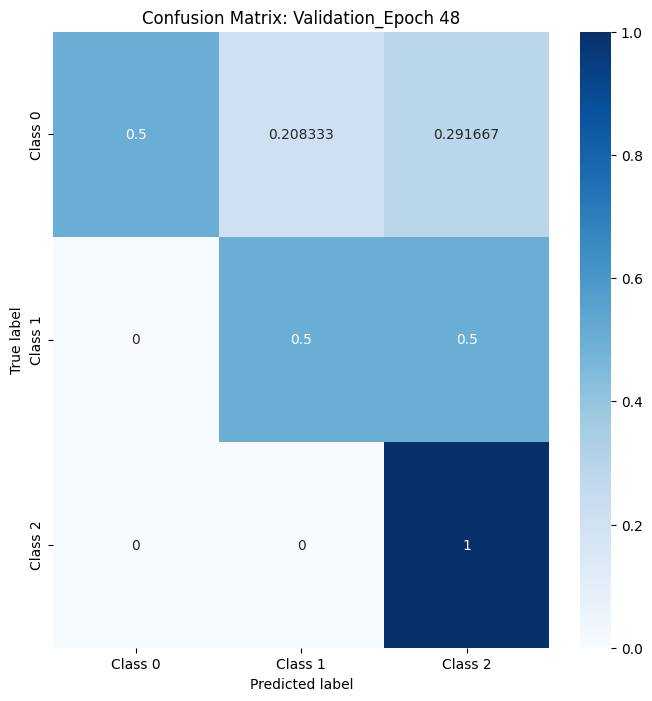

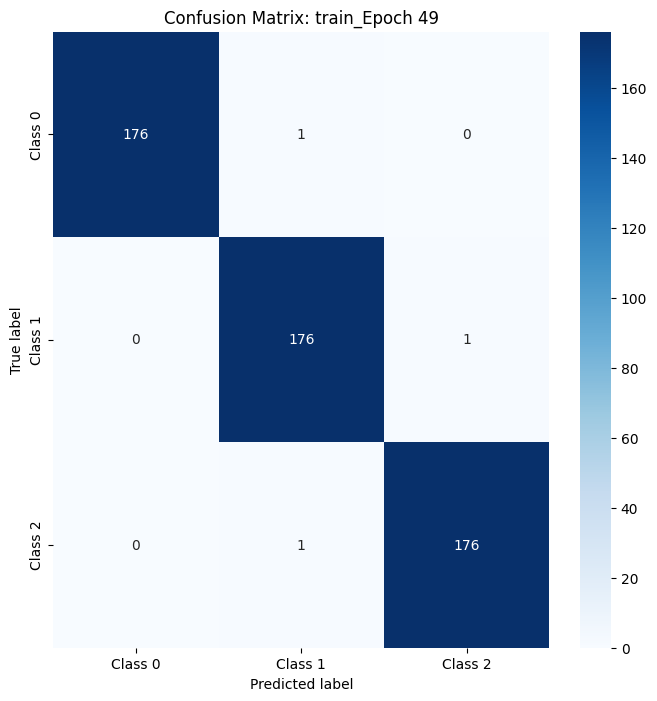

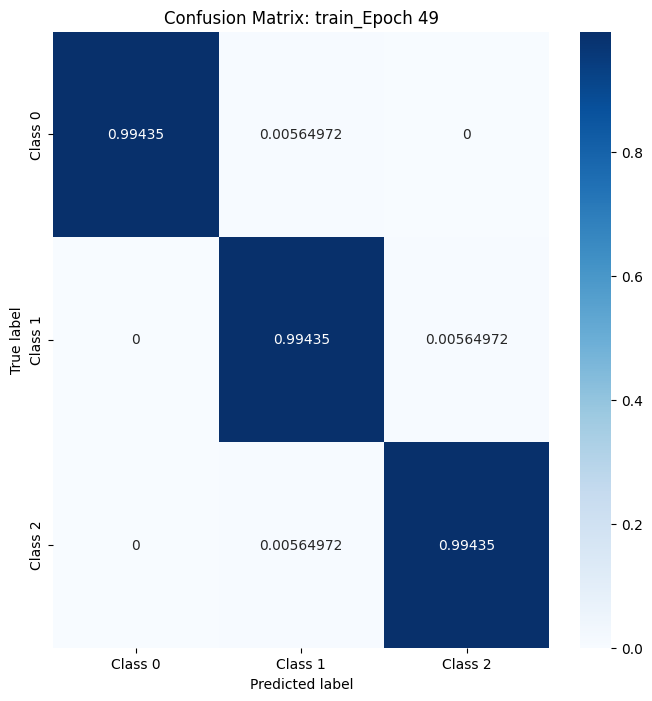

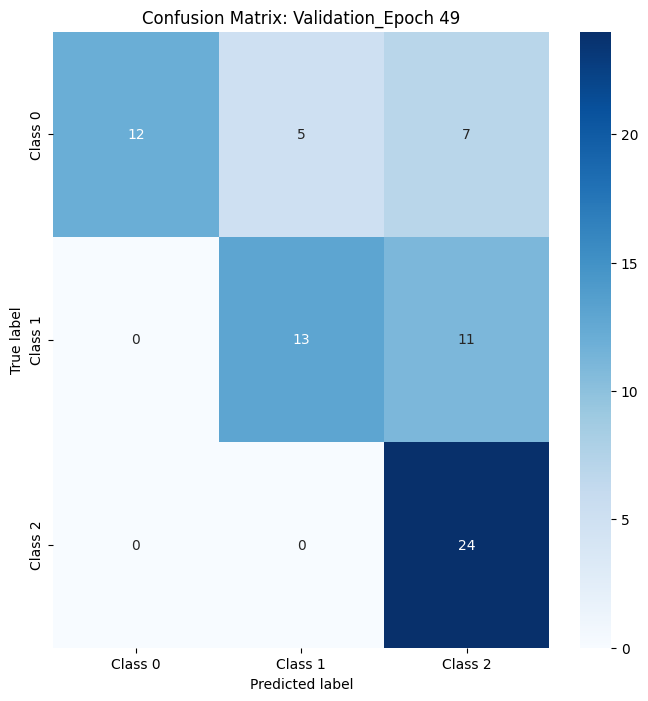

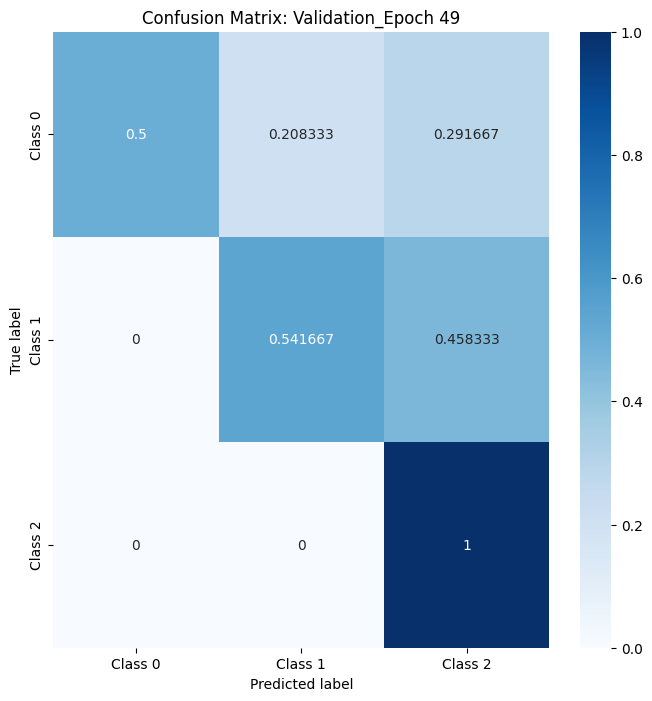

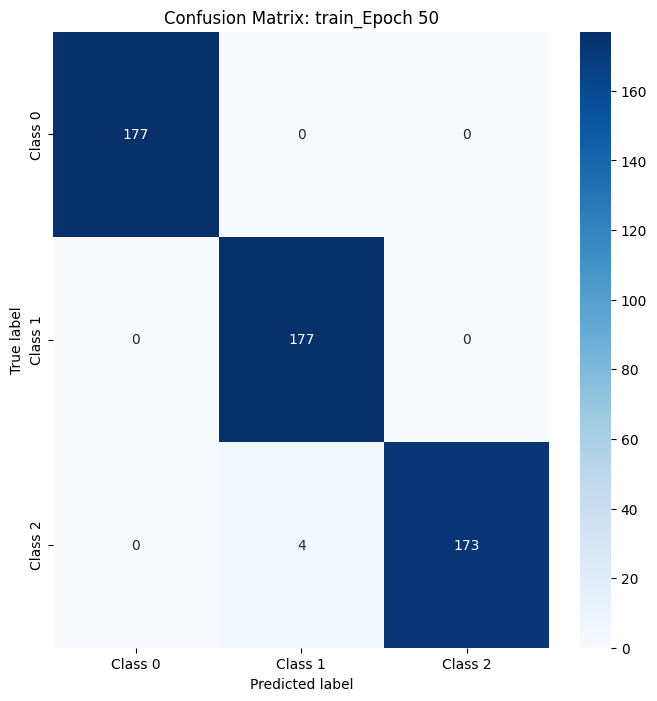

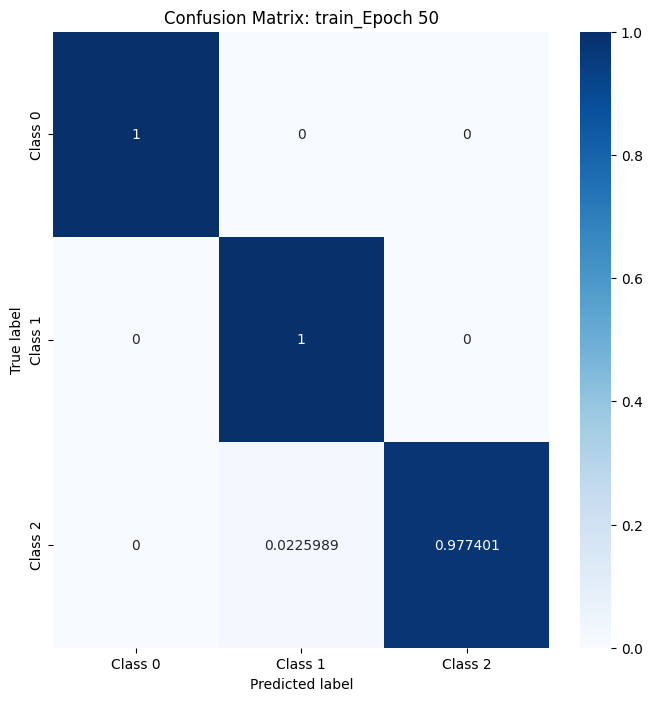

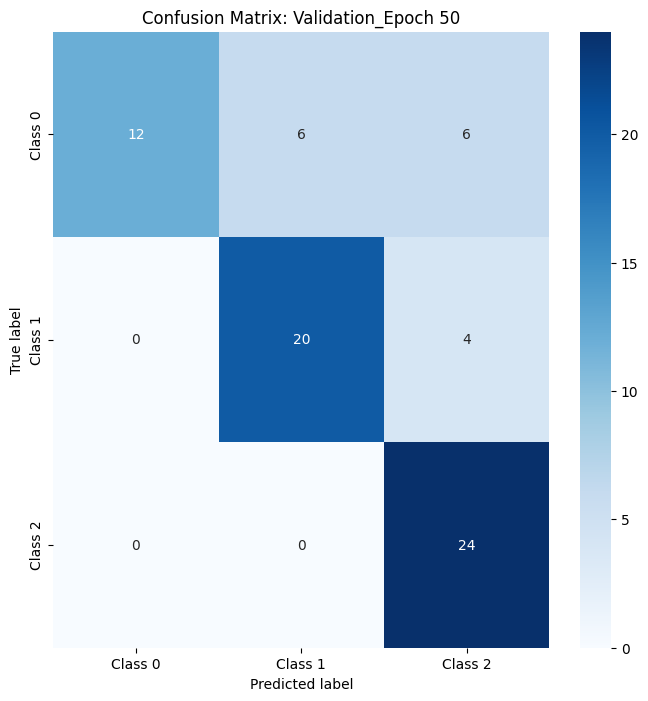

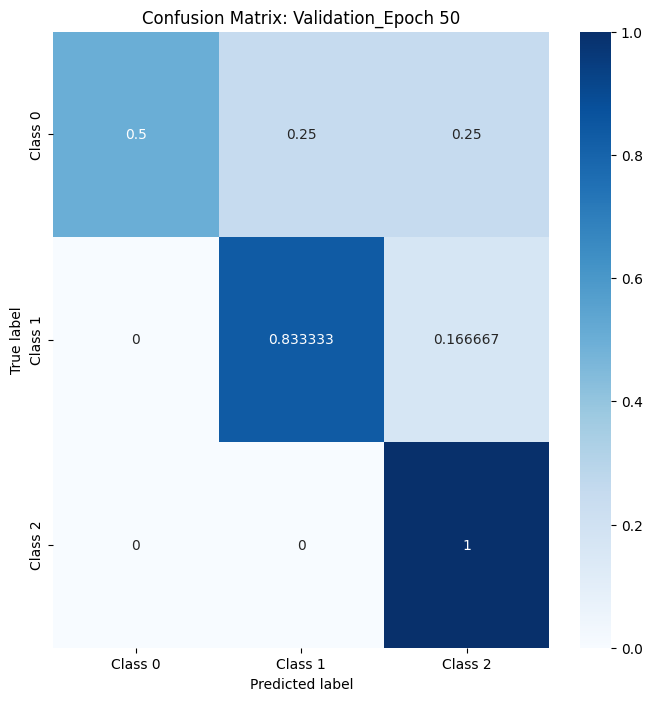

In [7]:
model = run(cfg, model, optimizer,scheduler, criterion, device, train_loader, val_loader,best_accuracy,path='weight_efficientnetb0')